In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

700it [00:00, 720.11it/s]
100%|██████████| 700/700 [00:07<00:00, 95.84it/s] 
8280it [00:00, 241576.79it/s]
7920it [00:00, 231414.71it/s]
720it [00:00, 728.66it/s]
100%|██████████| 720/720 [00:07<00:00, 91.92it/s] 
8280it [00:00, 251592.61it/s]
720it [00:00, 746.30it/s]
100%|██████████| 720/720 [00:07<00:00, 93.04it/s] 
8280it [00:00, 235670.23it/s]
700it [00:00, 859.63it/s]
100%|██████████| 700/700 [00:07<00:00, 99.47it/s] 
8280it [00:00, 248818.46it/s]
509it [00:00, 1184.51it/s]
100%|██████████| 509/509 [00:02<00:00, 195.18it/s]
3664it [00:00, 245658.91it/s]
700it [00:00, 867.20it/s]
100%|██████████| 700/700 [00:06<00:00, 100.19it/s]
8280it [00:00, 78322.18it/s]
700it [00:00, 858.45it/s]
100%|██████████| 700/700 [00:07<00:00, 99.76it/s] 
8280it [00:00, 249322.20it/s]
710it [00:01, 410.02it/s]
100%|██████████| 710/710 [00:07<00:00, 97.39it/s] 
8280it [00:00, 253256.69it/s]
710it [00:01, 412.12it/s]
100%|██████████| 710/710 [00:07<00:00, 97.40it/s] 
8280it [00:00, 216841.10it/s]
710it [

In [8]:
len(data_train), len(data_val), len(data_test)

(8280, 7920, 11)

In [ ]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [7]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [8]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [9]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [10]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [ ]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.08052


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022031
Epoch 1...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.020752


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.017842
Epoch 2...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.019549


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.016179
Epoch 3...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.019116


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.015507
Epoch 4...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.019008


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.015339
Epoch 5...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.018625


100%|██████████| 248/248 [00:19<00:00, 12.69it/s]


Mean val loss: 0.014826


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 6...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.018564


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.016083
EarlyStopping counter: 1 out of 5
Epoch 7...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.018153


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.014457
Epoch 8...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.018274


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.014106
Epoch 9...


 88%|████████▊ | 227/259 [00:47<00:06,  4.86it/s]

## Dump experiment results

In [11]:
import pickle
import json

In [12]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [13]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [14]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [15]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [29]:
from itertools import chain

In [30]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [31]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

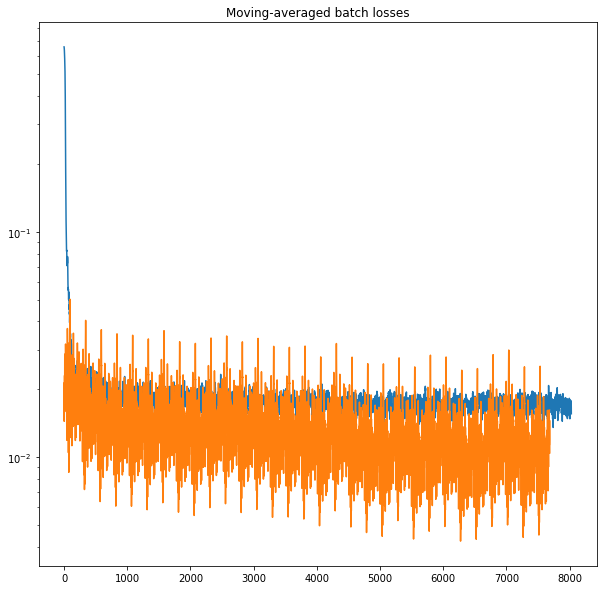

In [32]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')
plt.yscale('log')
# plt.ylim([1e-2, 1])
plt.show()

In [33]:
mean_train_loss = [np.mean(item) for item in results['val_losses']]
mean_val_loss = [np.mean(item) for item in results['train_losses']]

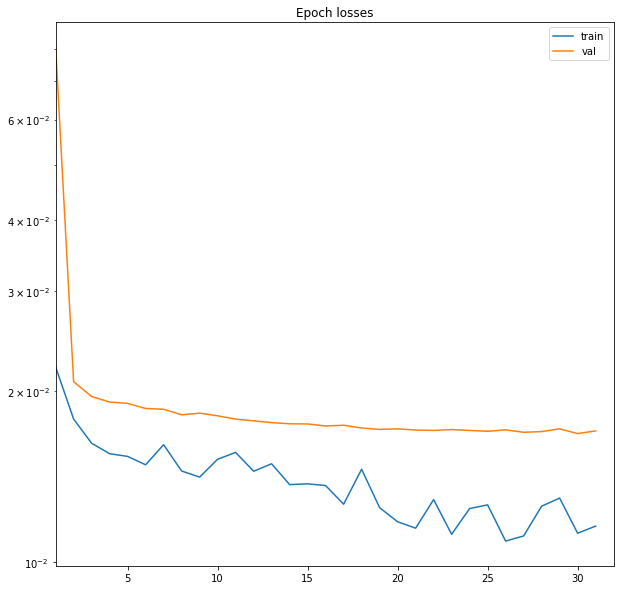

In [34]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [35]:
import os

In [36]:
import torch

In [37]:
from visualization_utils import output_to_binary, plot_sample

In [38]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

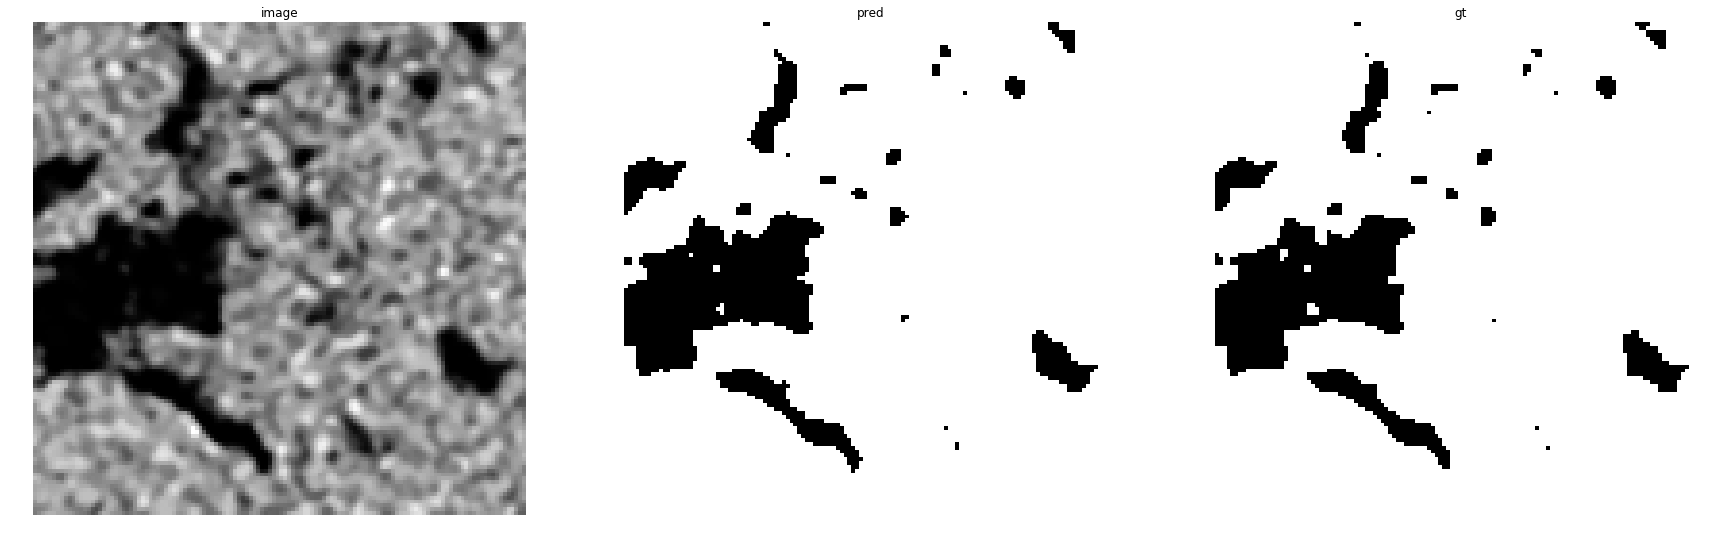

accuracy    : 0.994384765625
precision   : 0.9990900818926297
recall      : 0.994495924197032
f1          : 0.9967877094972067
pr_auc      : 0.9999789819072996
iou         : 0.9935959905332034


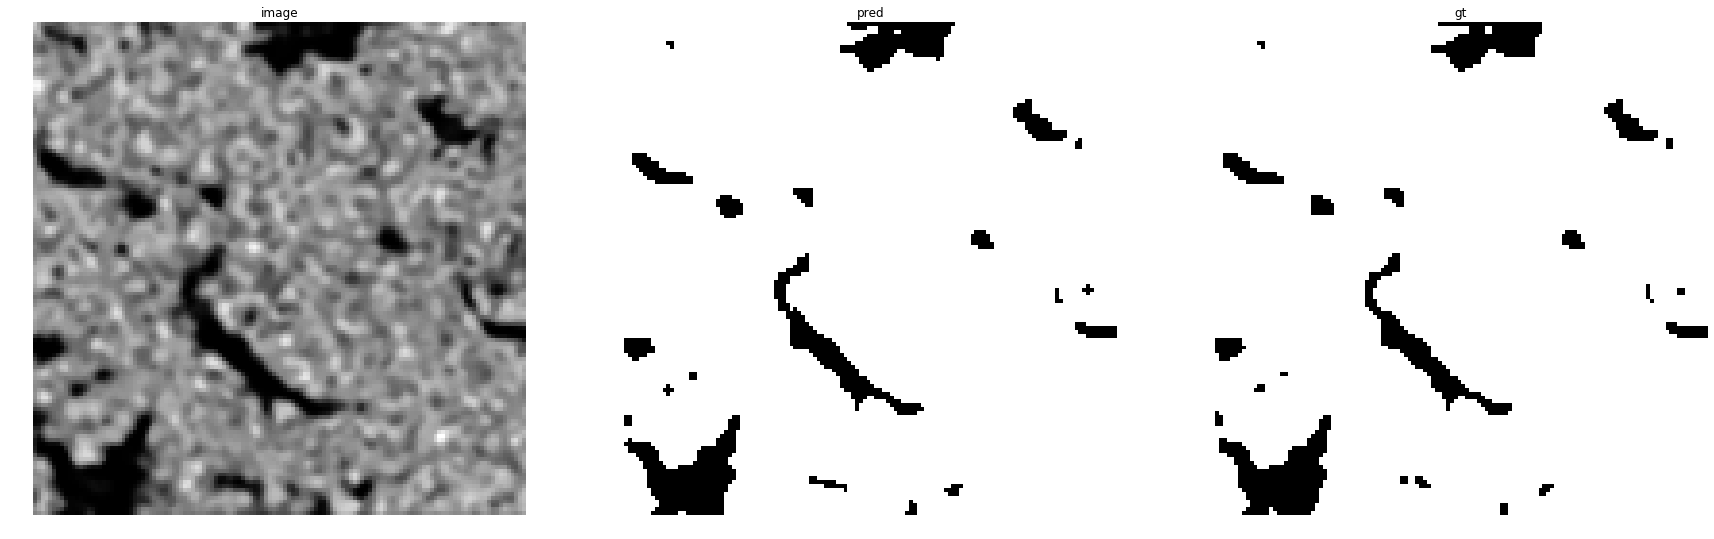

accuracy    : 0.99560546875
precision   : 0.9986169652265543
recall      : 0.9966478243722887
f1          : 0.9976314231199422
pr_auc      : 0.999986167053448
iou         : 0.995274040039383


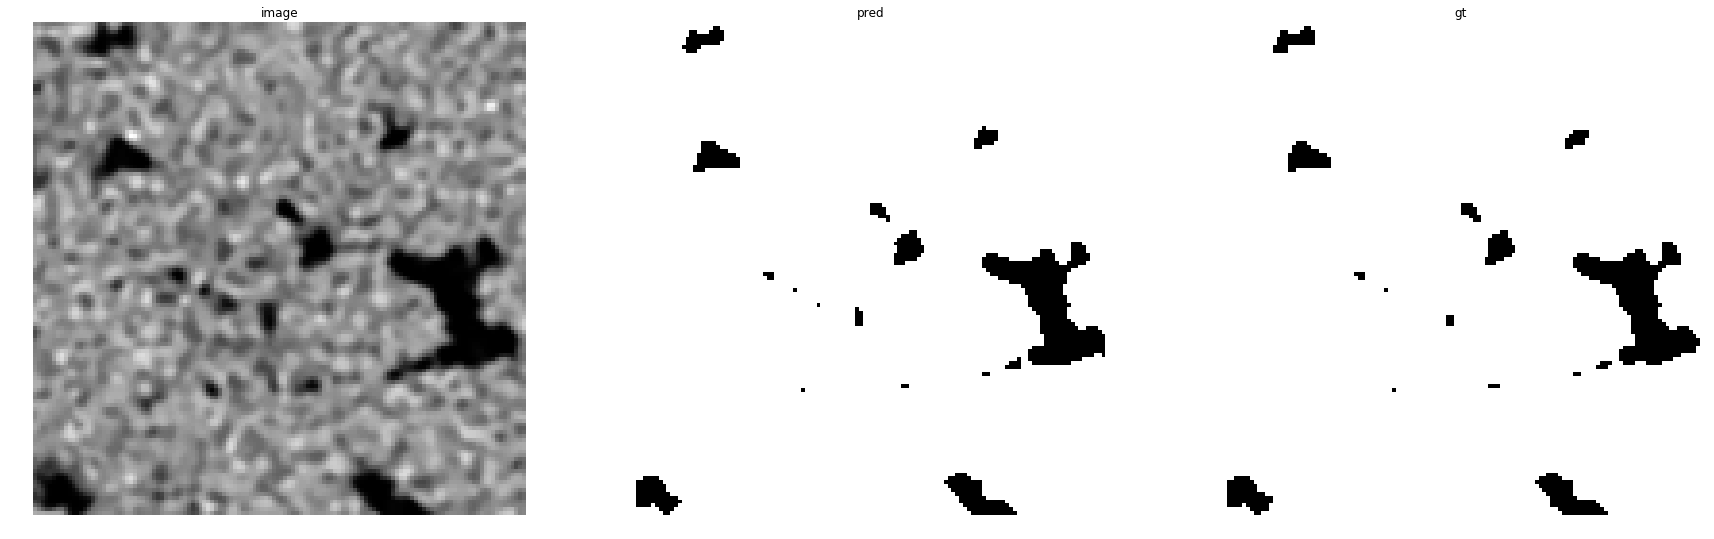

accuracy    : 0.997802734375
precision   : 0.9992286430545735
recall      : 0.9984584751750273
f1          : 0.998843410653473
pr_auc      : 0.9999964770657912
iou         : 0.997689493614017


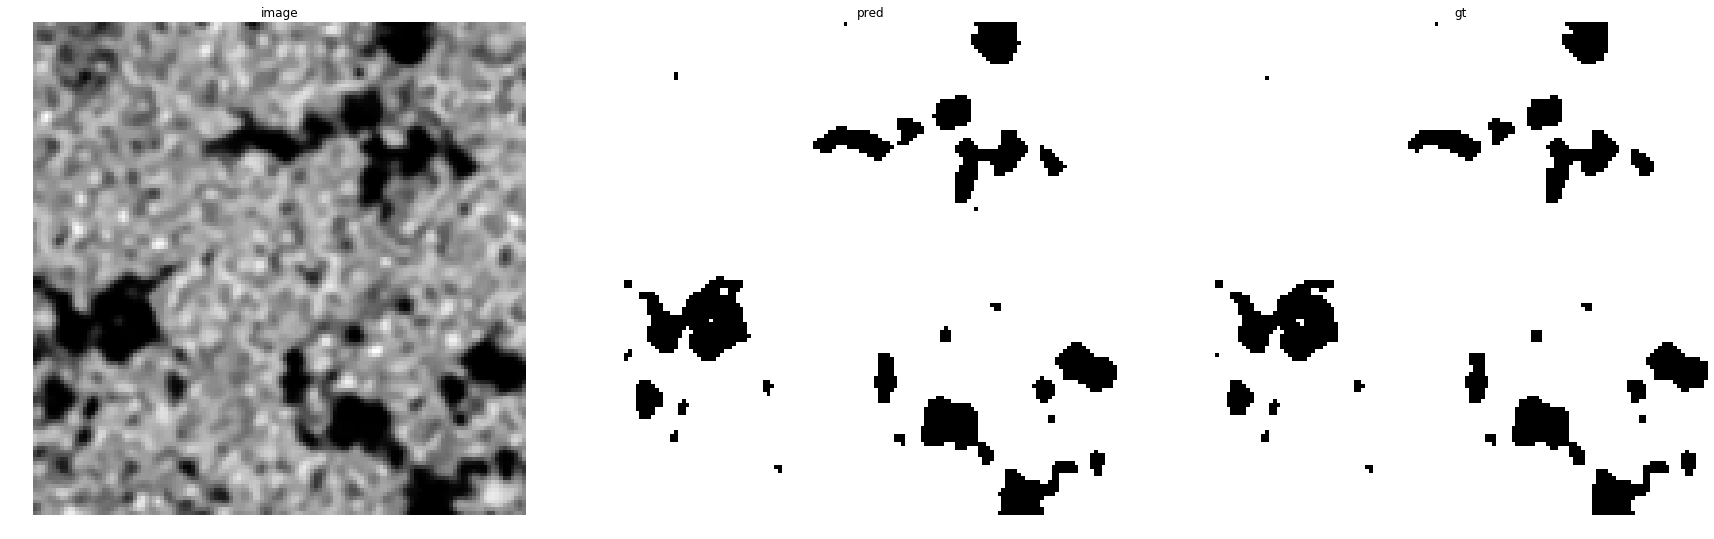

accuracy    : 0.99456787109375
precision   : 0.9989896268355113
recall      : 0.9950352230795035
f1          : 0.9970085039158348
pr_auc      : 0.9999774068721233
iou         : 0.9940348525469169


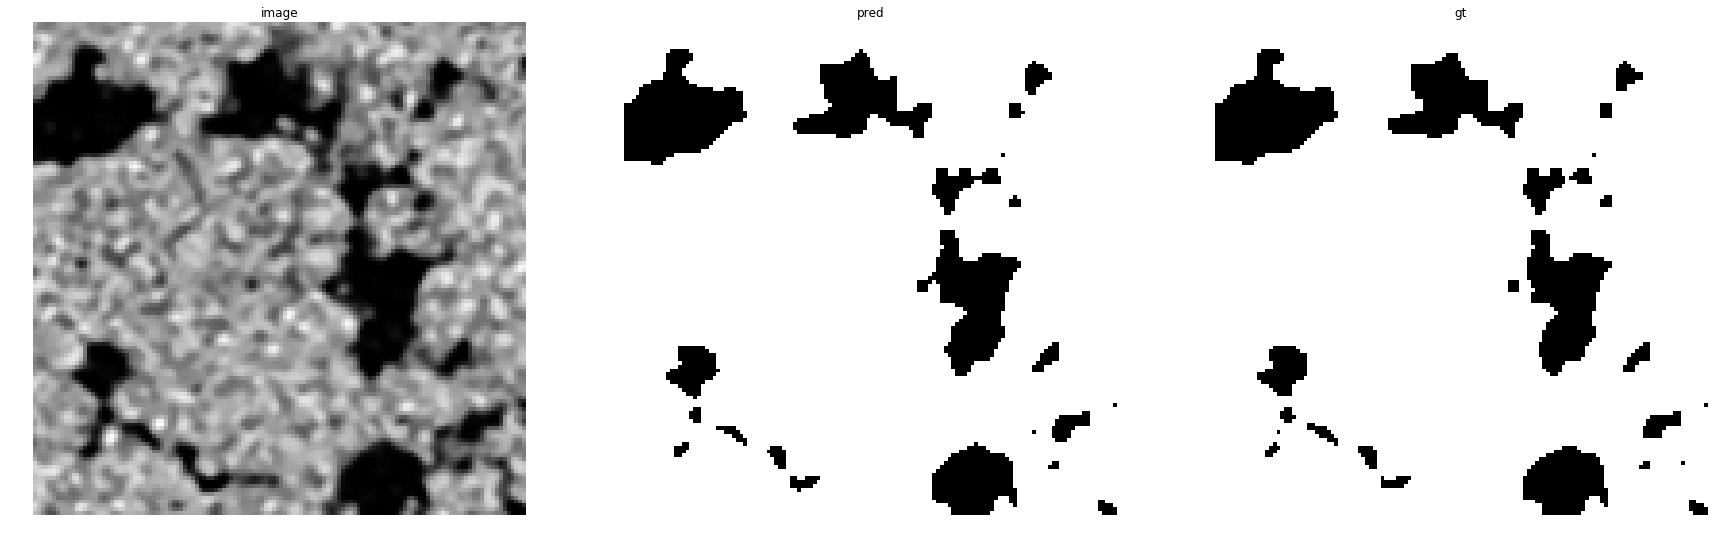

accuracy    : 0.9954833984375
precision   : 0.9990850225225225
recall      : 0.9957210998877666
f1          : 0.9974002248454188
pr_auc      : 0.9999818079344315
iou         : 0.994813932300792


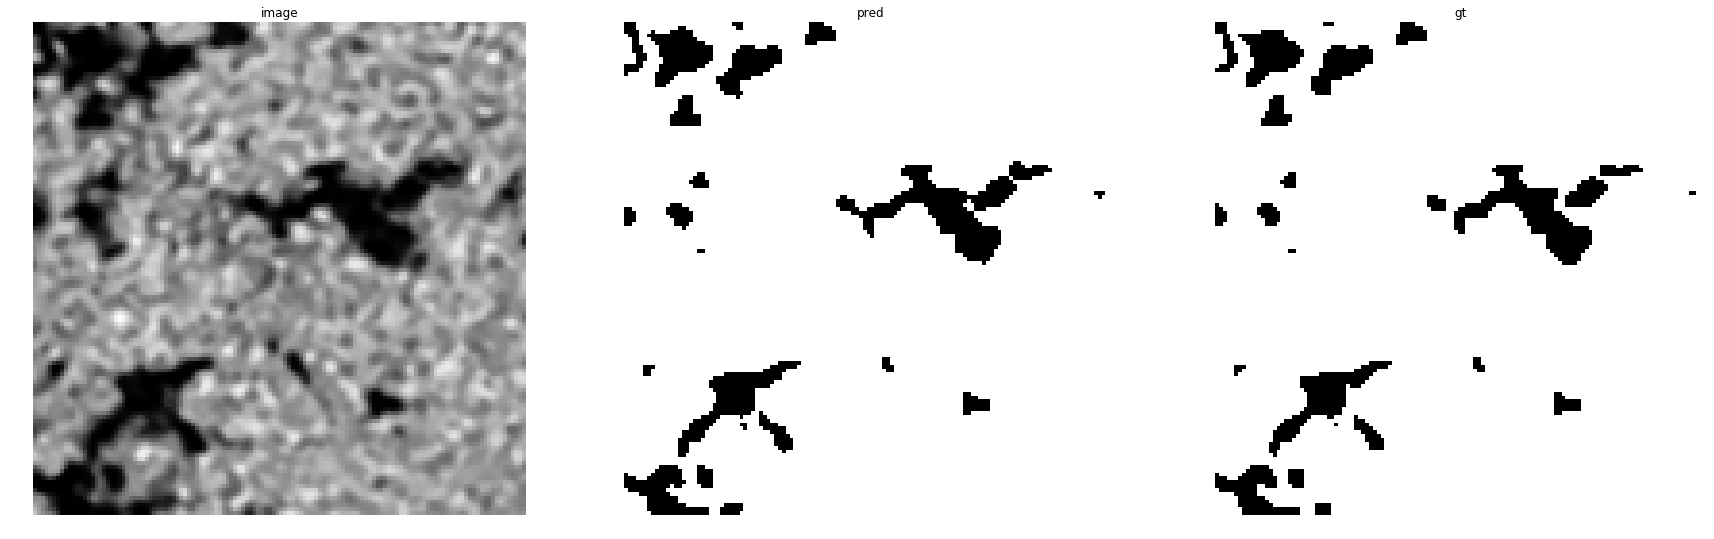

accuracy    : 0.993408203125
precision   : 0.9988002399520096
recall      : 0.9940298507462687
f1          : 0.9964093357271095
pr_auc      : 0.999973674643981
iou         : 0.9928443649373881


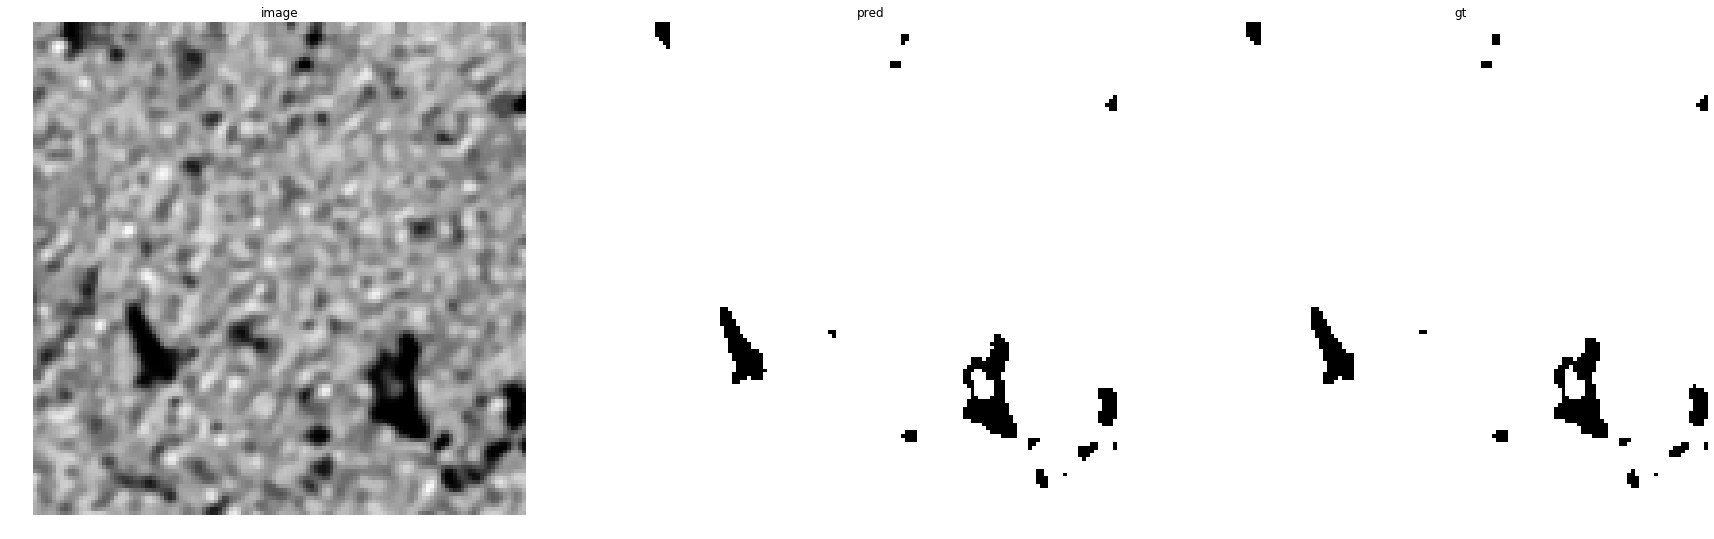

accuracy    : 0.99835205078125
precision   : 0.9995610459647583
recall      : 0.9987468671679198
f1          : 0.9991537907042343
pr_auc      : 0.9999979992667908
iou         : 0.998309012337947


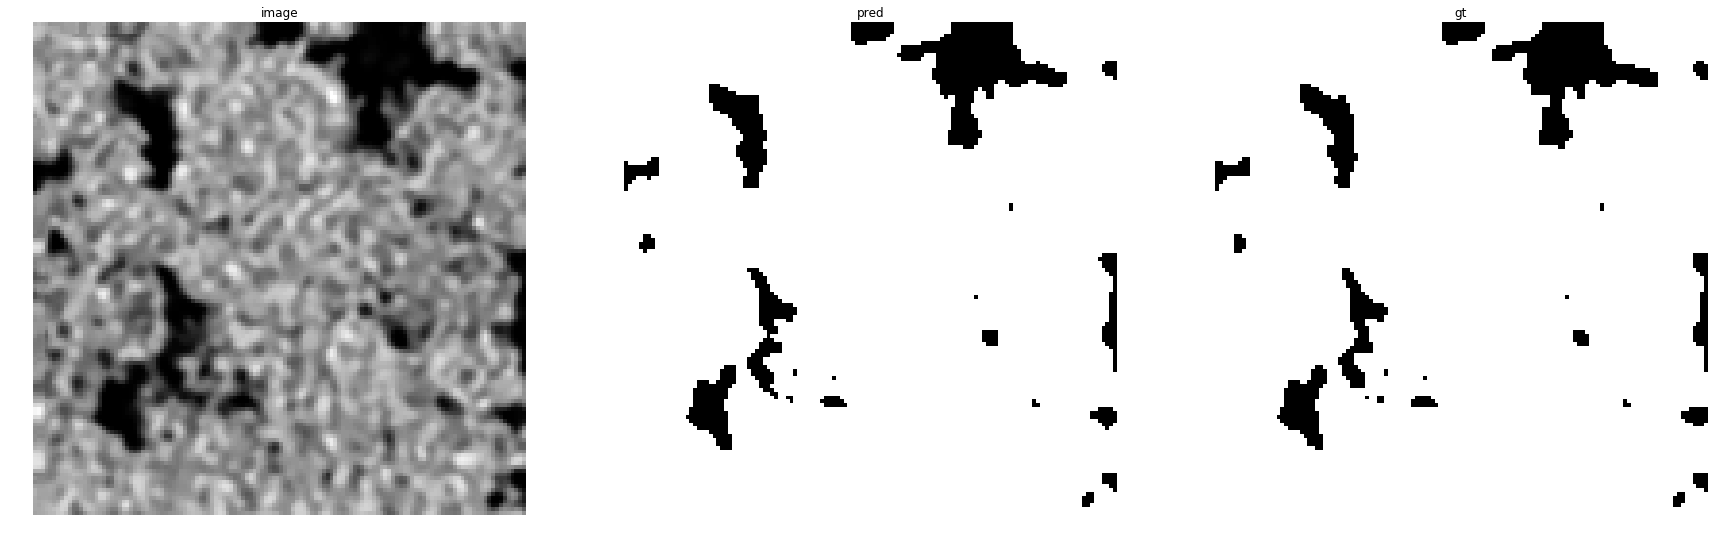

accuracy    : 0.9962158203125
precision   : 0.9990026595744681
recall      : 0.996881634819533
f1          : 0.997941020191286
pr_auc      : 0.9999862147759355
iou         : 0.9958905017564791


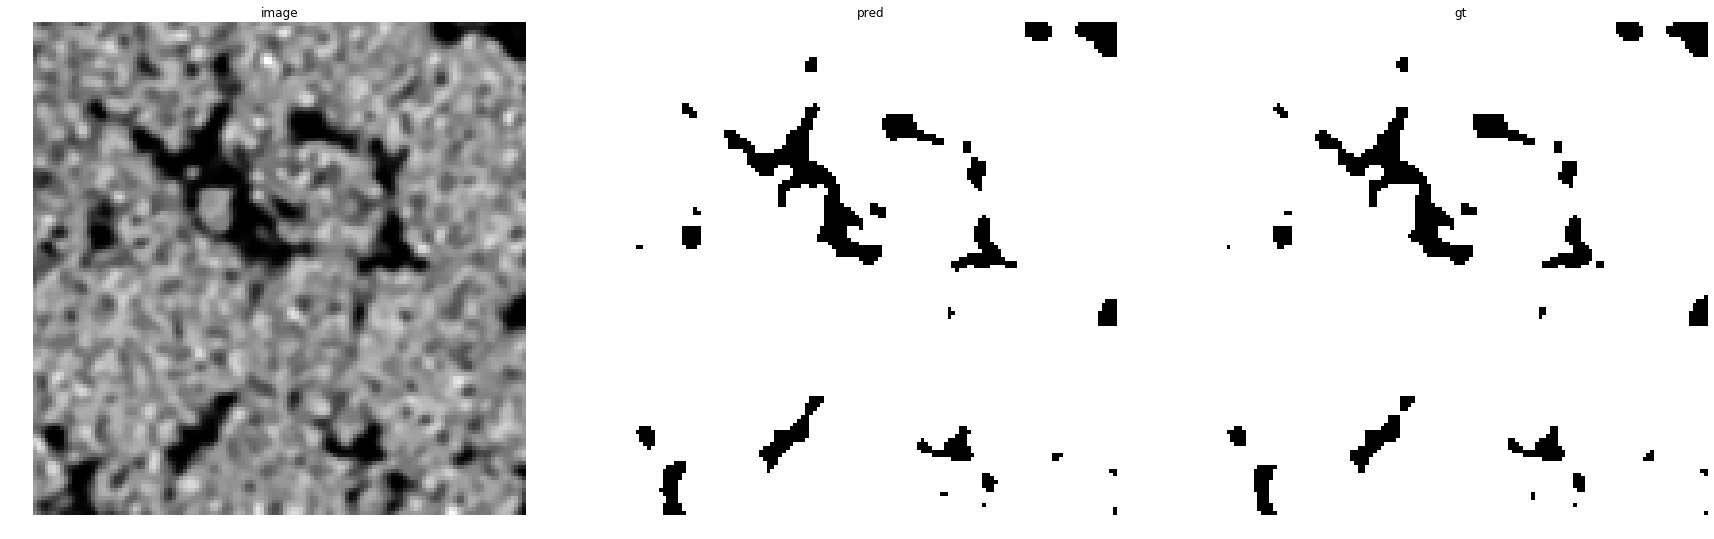

accuracy    : 0.99505615234375
precision   : 0.9988920750782064
recall      : 0.9958417256838412
f1          : 0.9973645680819913
pr_auc      : 0.9999838673122511
iou         : 0.9947429906542056


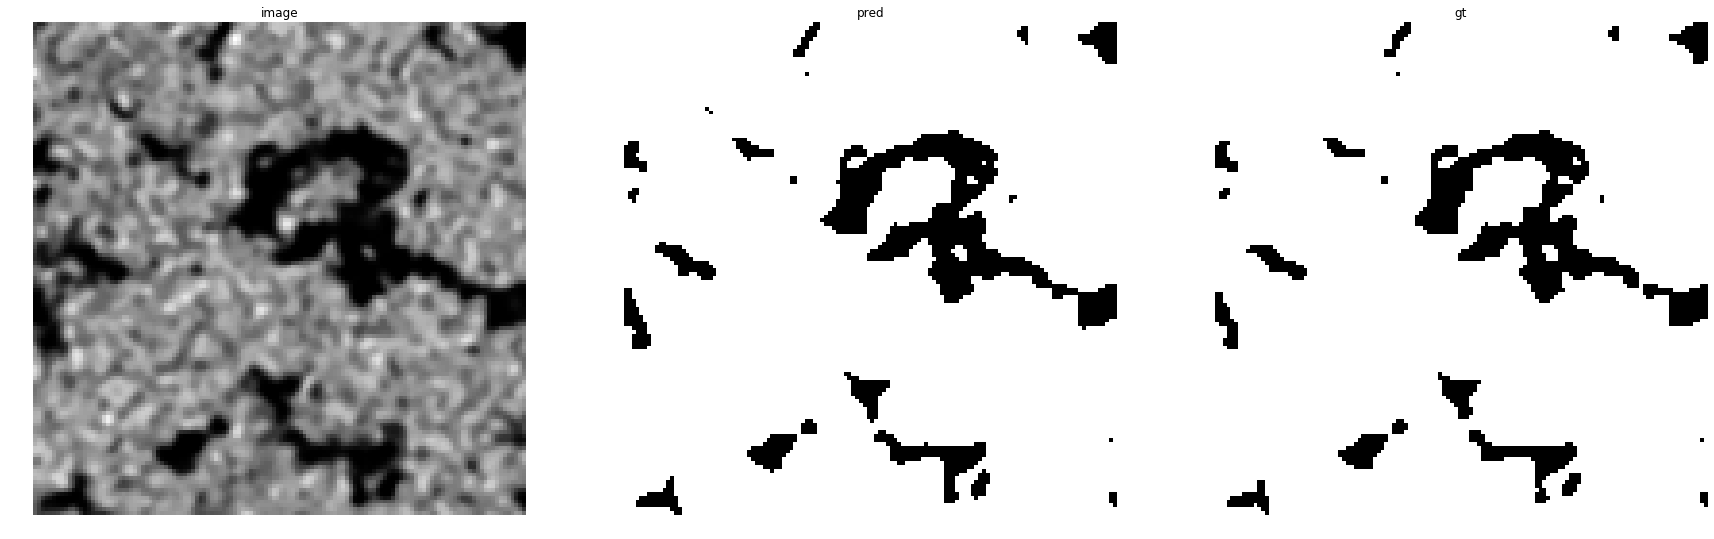

accuracy    : 0.99188232421875
precision   : 0.9991089787525702
recall      : 0.9918350683813023
f1          : 0.9954587359579334
pr_auc      : 0.999965424264793
iou         : 0.9909585316111489


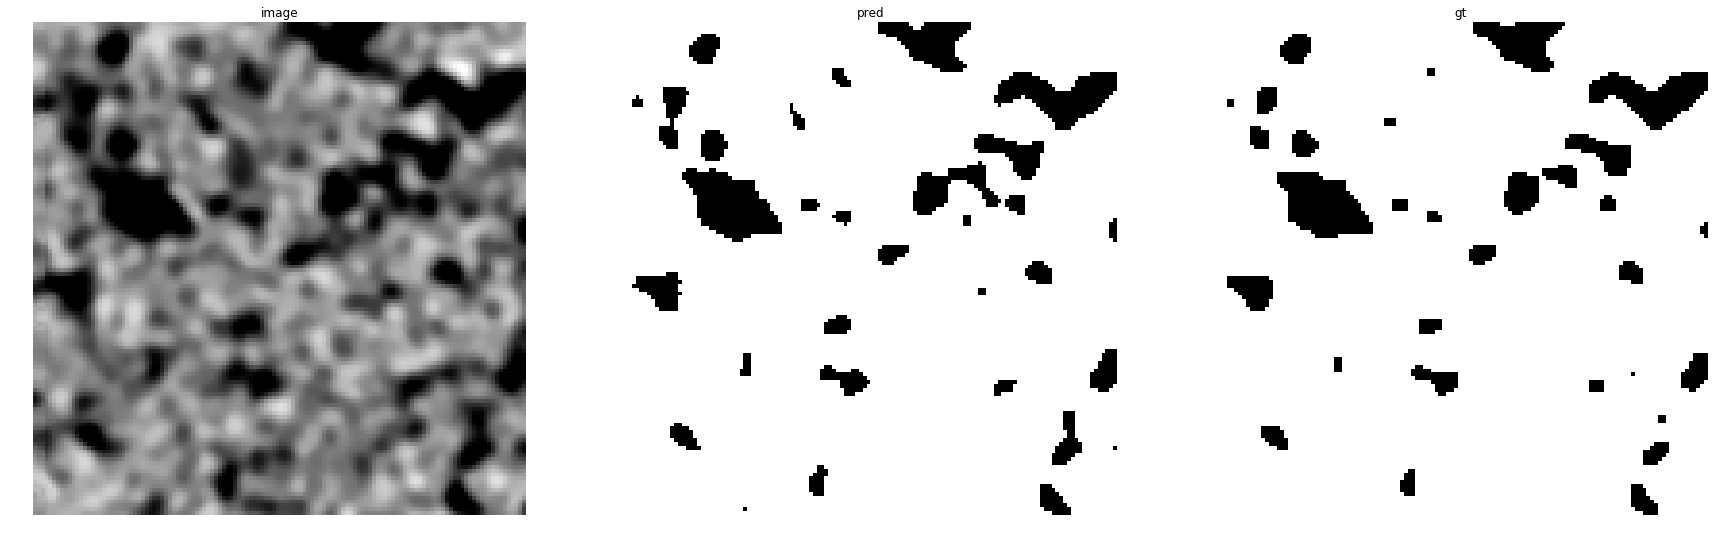

accuracy    : 0.98565673828125
precision   : 0.9984974730228111
recall      : 0.9856401267444213
f1          : 0.9920271416454622
pr_auc      : 0.9998827879170644
iou         : 0.9841804106361495


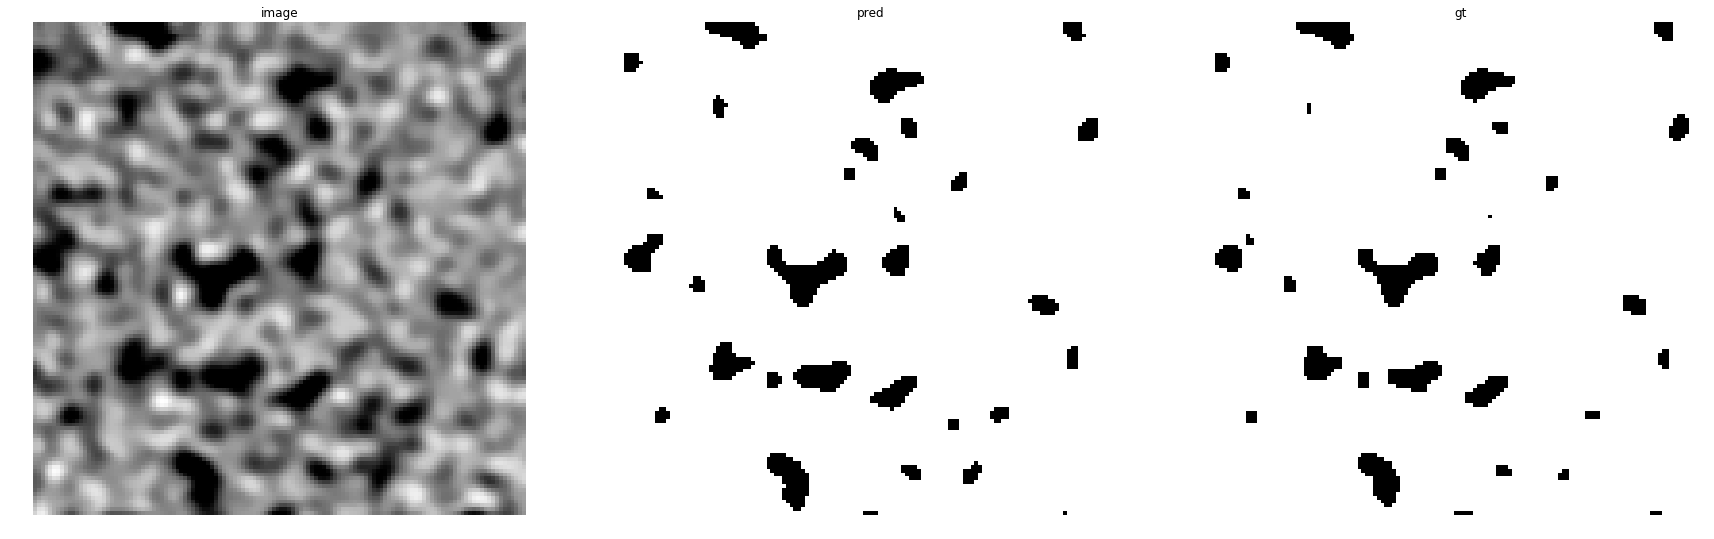

accuracy    : 0.989501953125
precision   : 0.9990222917481424
recall      : 0.9898605011624904
f1          : 0.9944202945565432
pr_auc      : 0.9999299206910675
iou         : 0.9889025098393445


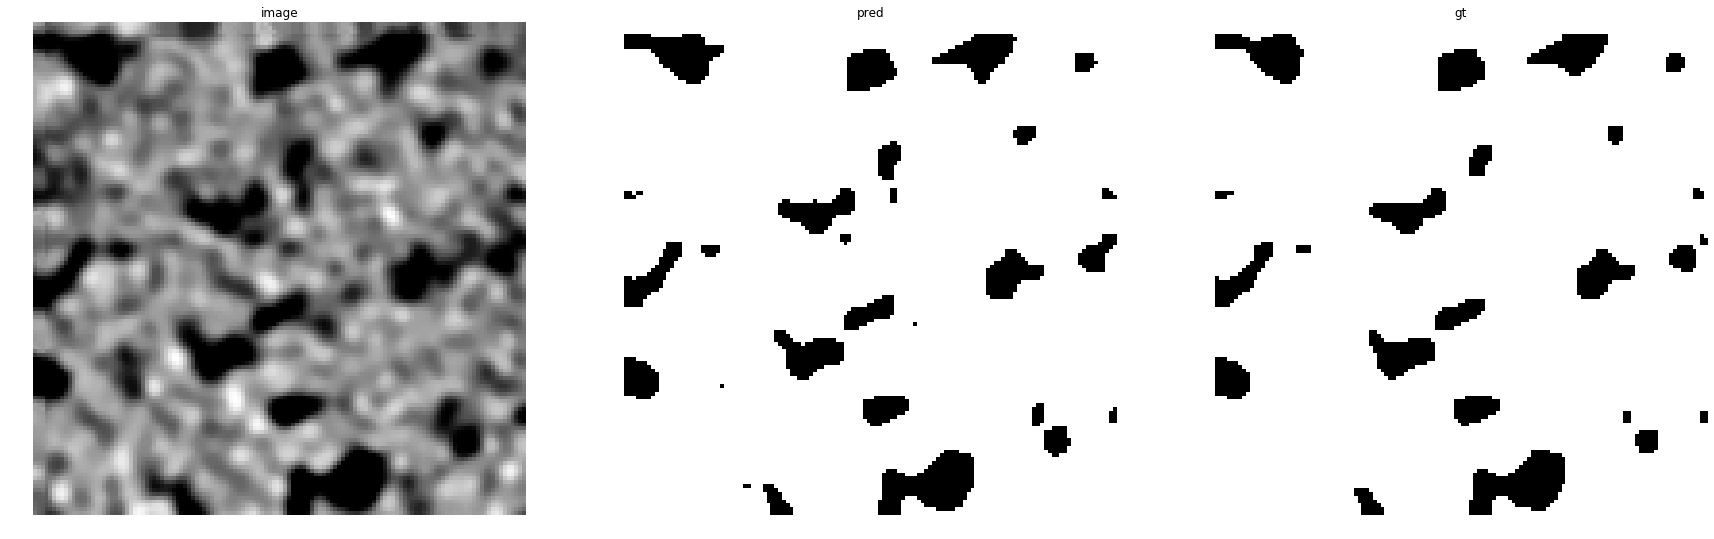

accuracy    : 0.99041748046875
precision   : 0.9989088925259137
recall      : 0.9904658868077625
f1          : 0.9946694733982955
pr_auc      : 0.9999170500378611
iou         : 0.9893954745018575


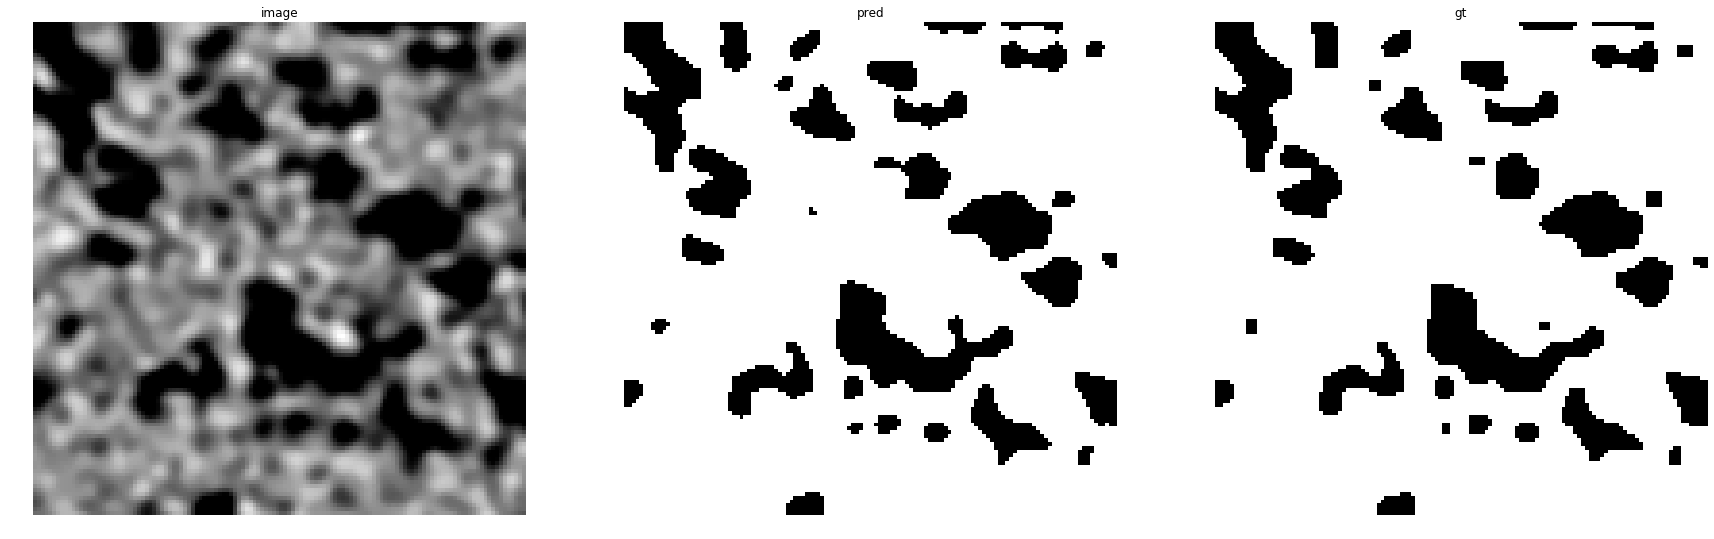

accuracy    : 0.9854736328125
precision   : 0.9965162072099364
recall      : 0.9856179775280899
f1          : 0.9910371318822023
pr_auc      : 0.9997912557934947
iou         : 0.9822335025380711


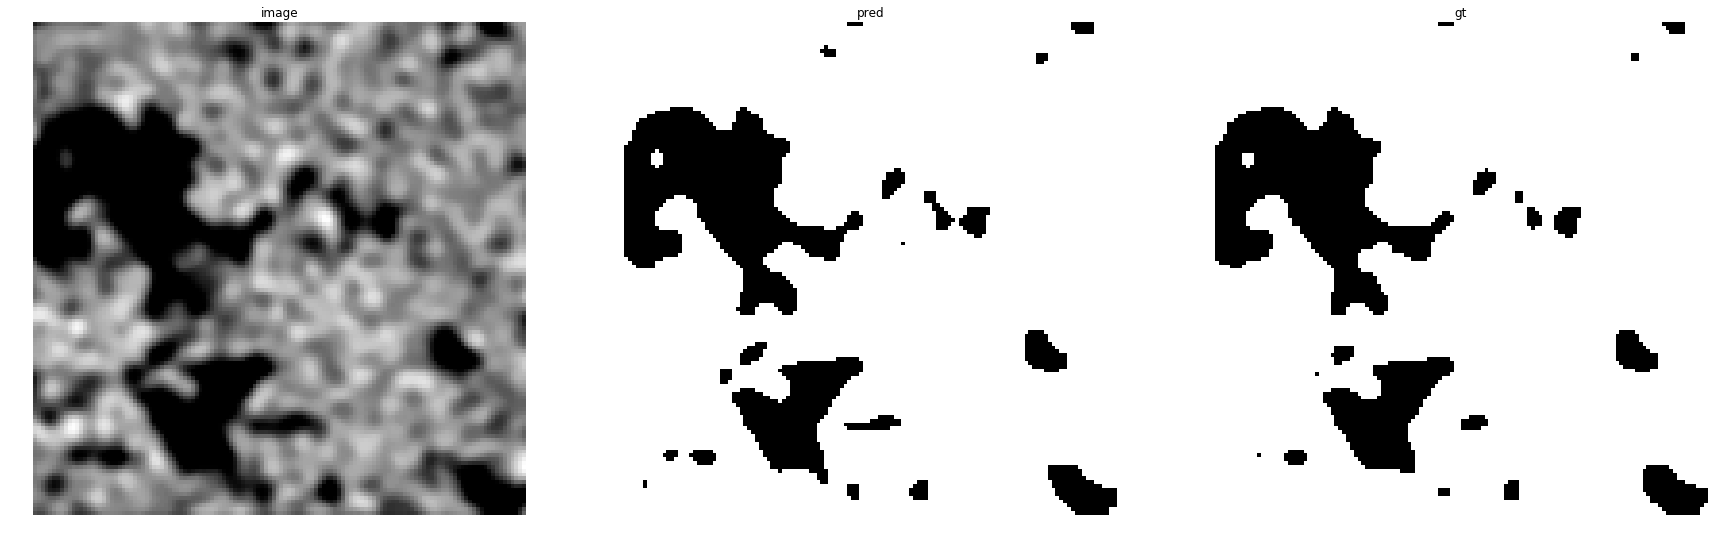

accuracy    : 0.9910888671875
precision   : 0.9979591836734694
recall      : 0.9914554670528603
f1          : 0.9946966945150744
pr_auc      : 0.9999092393709534
iou         : 0.9894493423905188


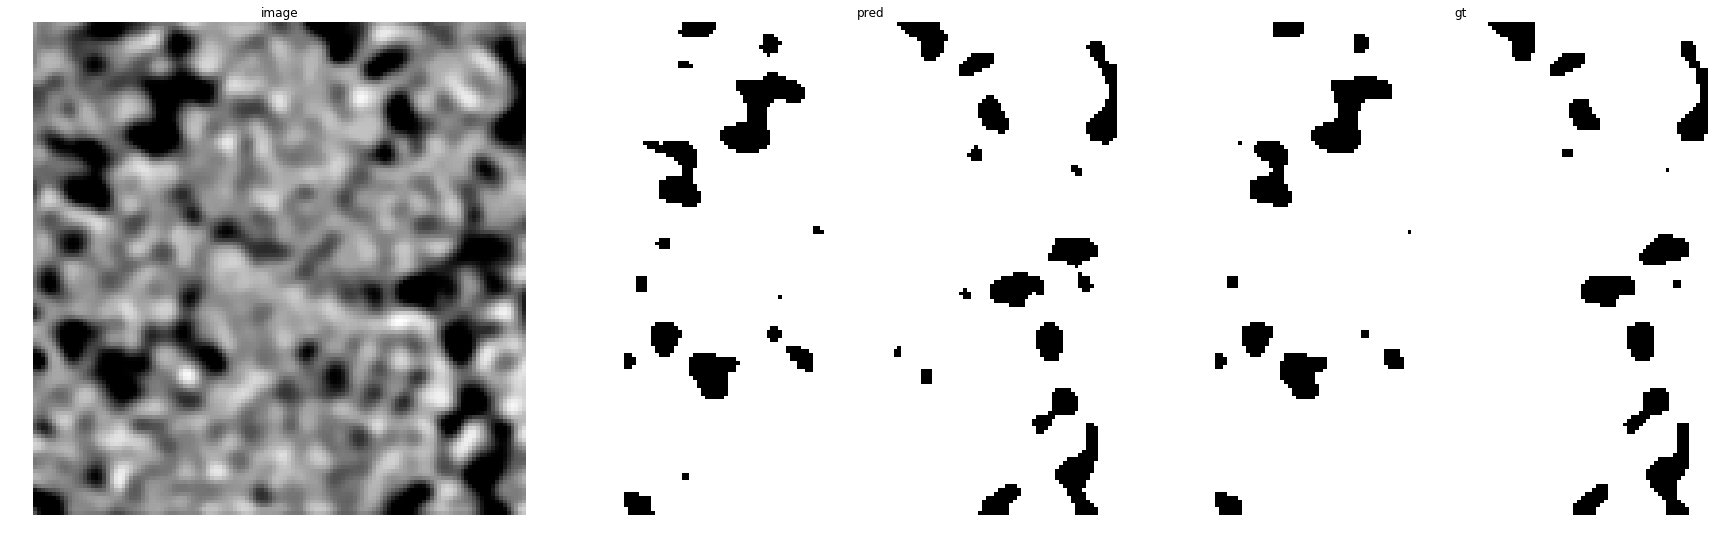

accuracy    : 0.98675537109375
precision   : 0.9972436974789916
recall      : 0.9882744836775483
f1          : 0.992738832190062
pr_auc      : 0.999869175793096
iou         : 0.9855823533320045


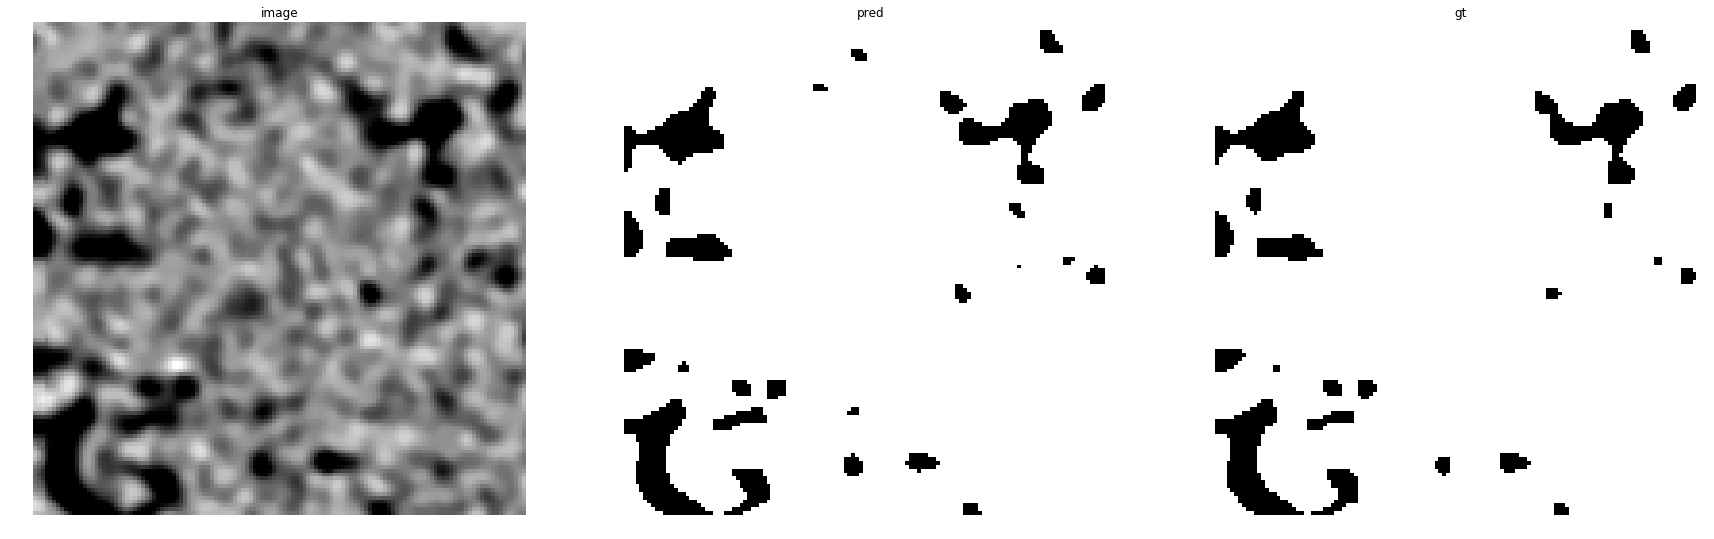

accuracy    : 0.99114990234375
precision   : 0.9980049211943872
recall      : 0.9923951858219813
f1          : 0.9951921482807786
pr_auc      : 0.9999419858085259
iou         : 0.9904303062302007


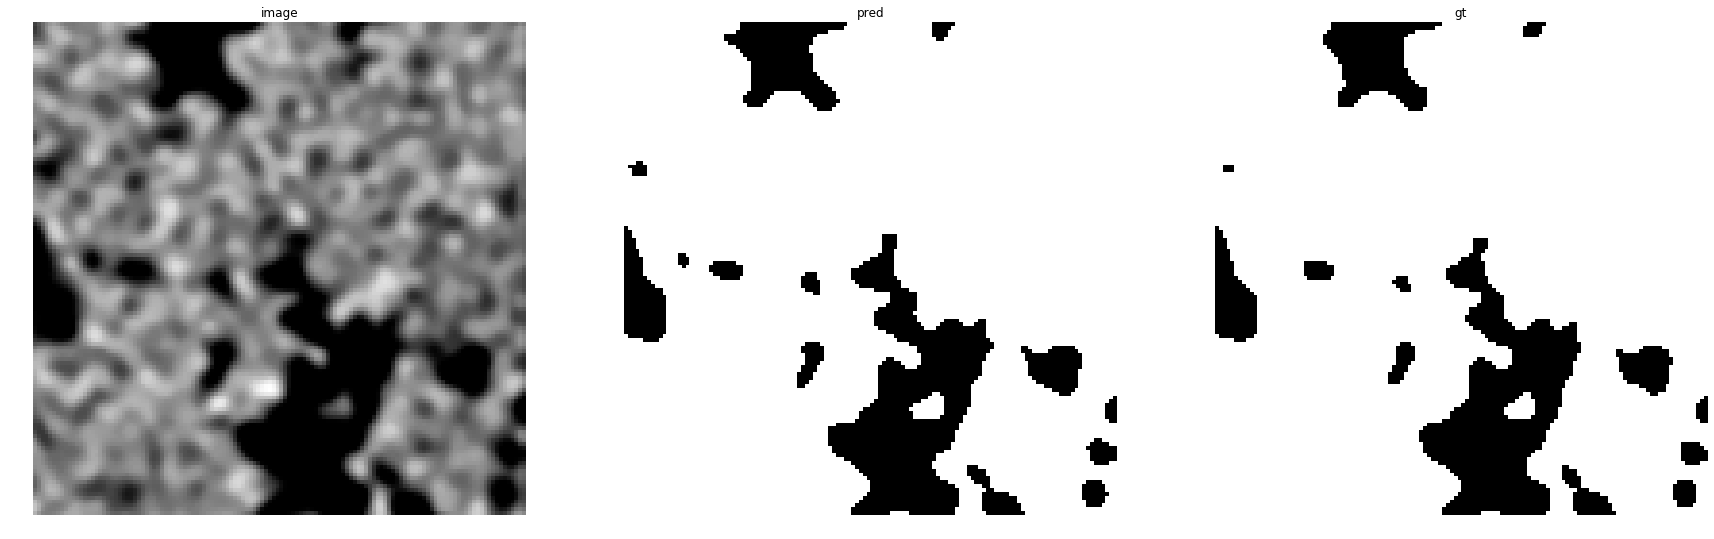

accuracy    : 0.99169921875
precision   : 0.9980553154710458
recall      : 0.9921953315194043
f1          : 0.9951166965888688
pr_auc      : 0.9999324274276299
iou         : 0.9902808547130708


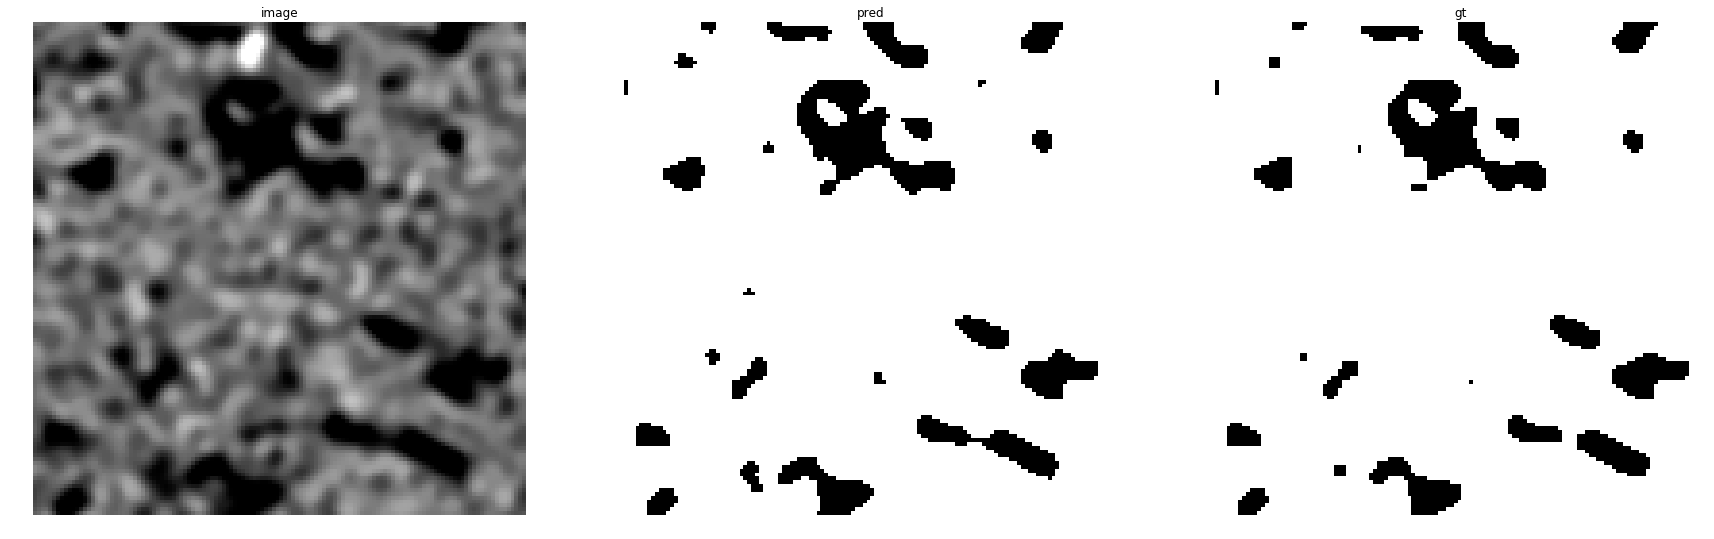

accuracy    : 0.99053955078125
precision   : 0.9987051046139167
recall      : 0.9908045977011494
f1          : 0.9947391643756576
pr_auc      : 0.9999362445736062
iou         : 0.9895333918563036


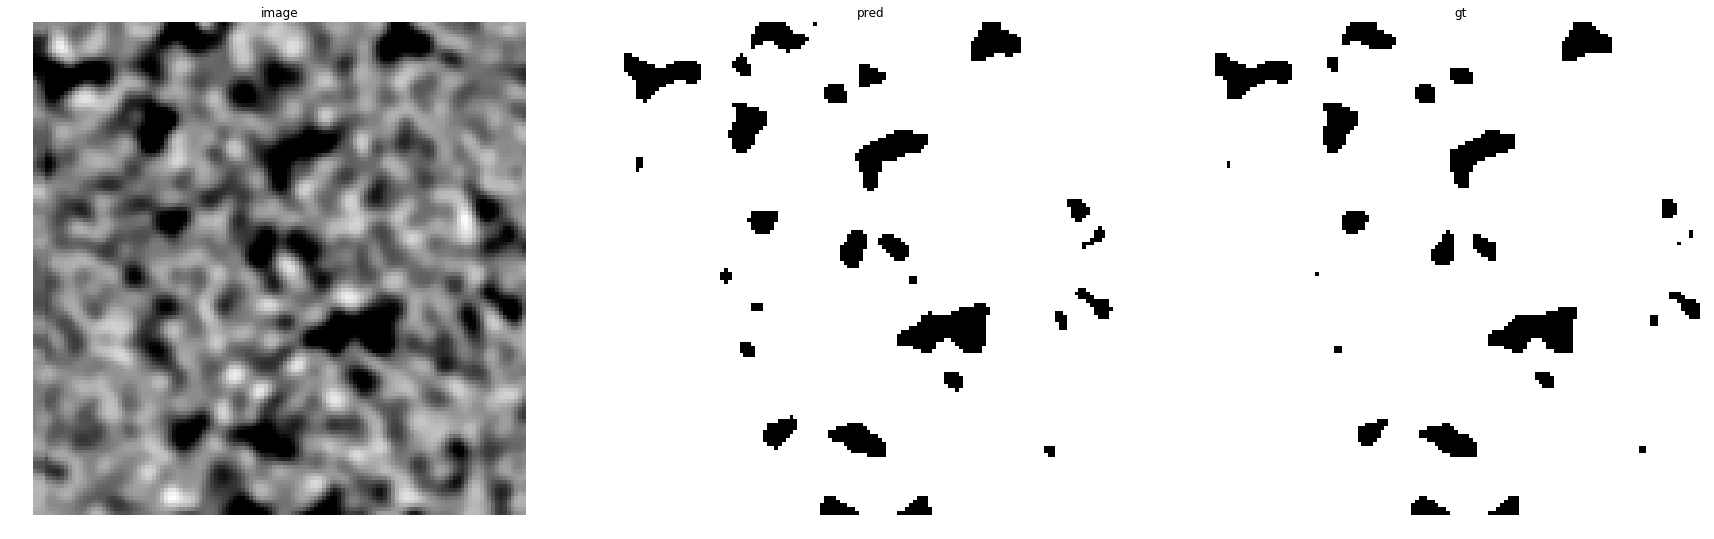

accuracy    : 0.98809814453125
precision   : 0.9992065066455068
recall      : 0.9880345233424872
f1          : 0.9935891113522044
pr_auc      : 0.9999390276694132
iou         : 0.9872598980791847


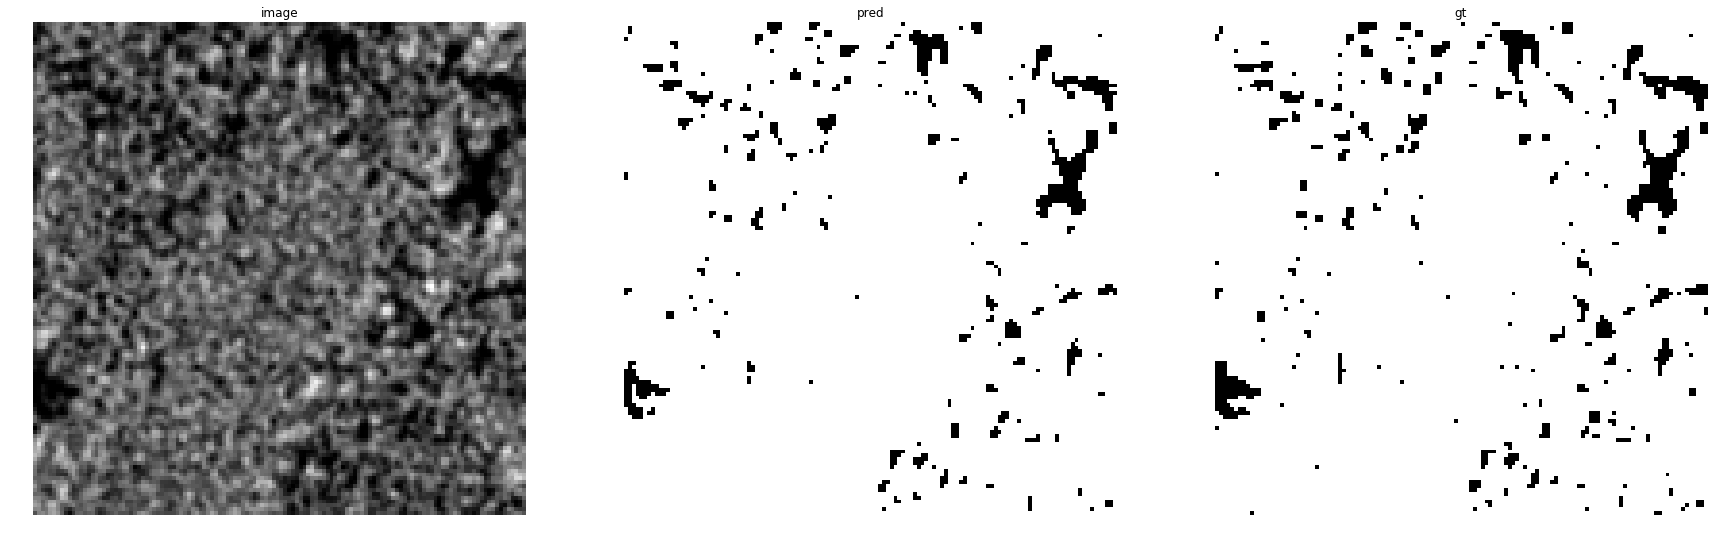

accuracy    : 0.98443603515625
precision   : 0.9849764652782256
recall      : 0.9985619035167996
f1          : 0.991722660434317
pr_auc      : 0.9998562624314716
iou         : 0.9835812246474792


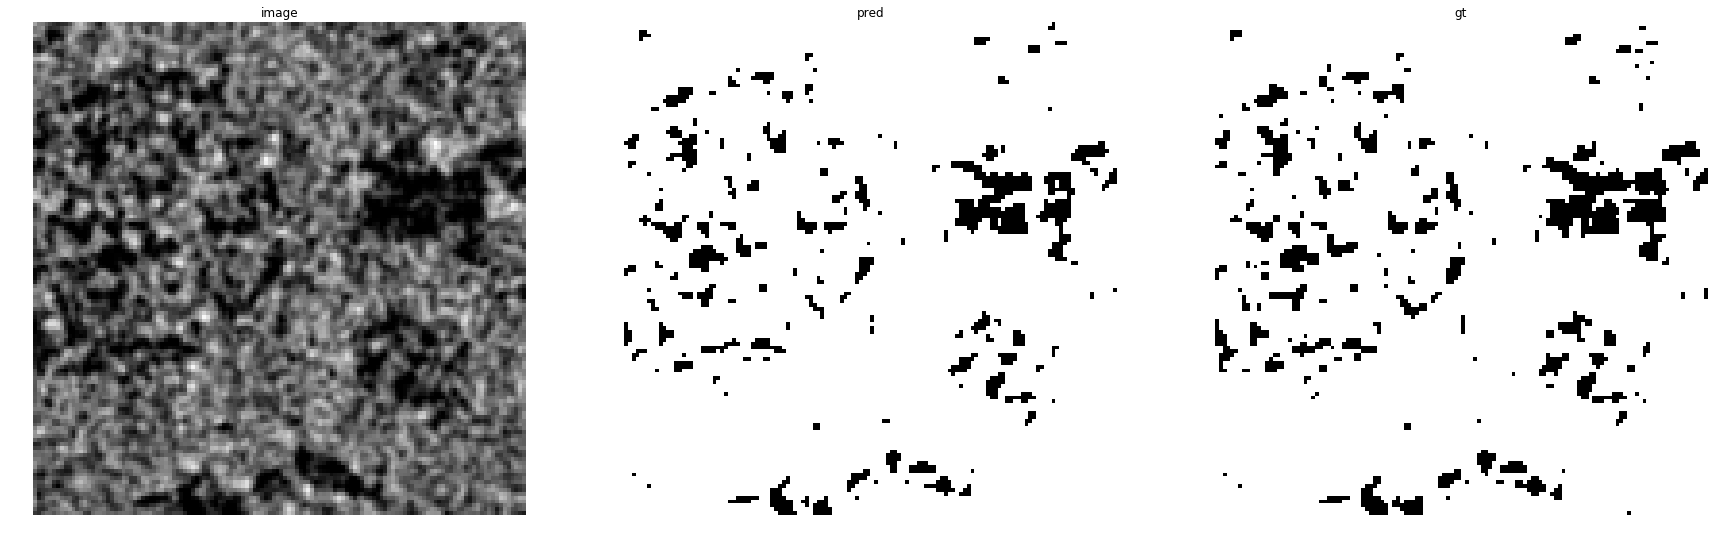

accuracy    : 0.9791259765625
precision   : 0.9785237560298685
recall      : 0.9988532883642496
f1          : 0.9885840176246745
pr_auc      : 0.9998127243440547
iou         : 0.9774257425742574


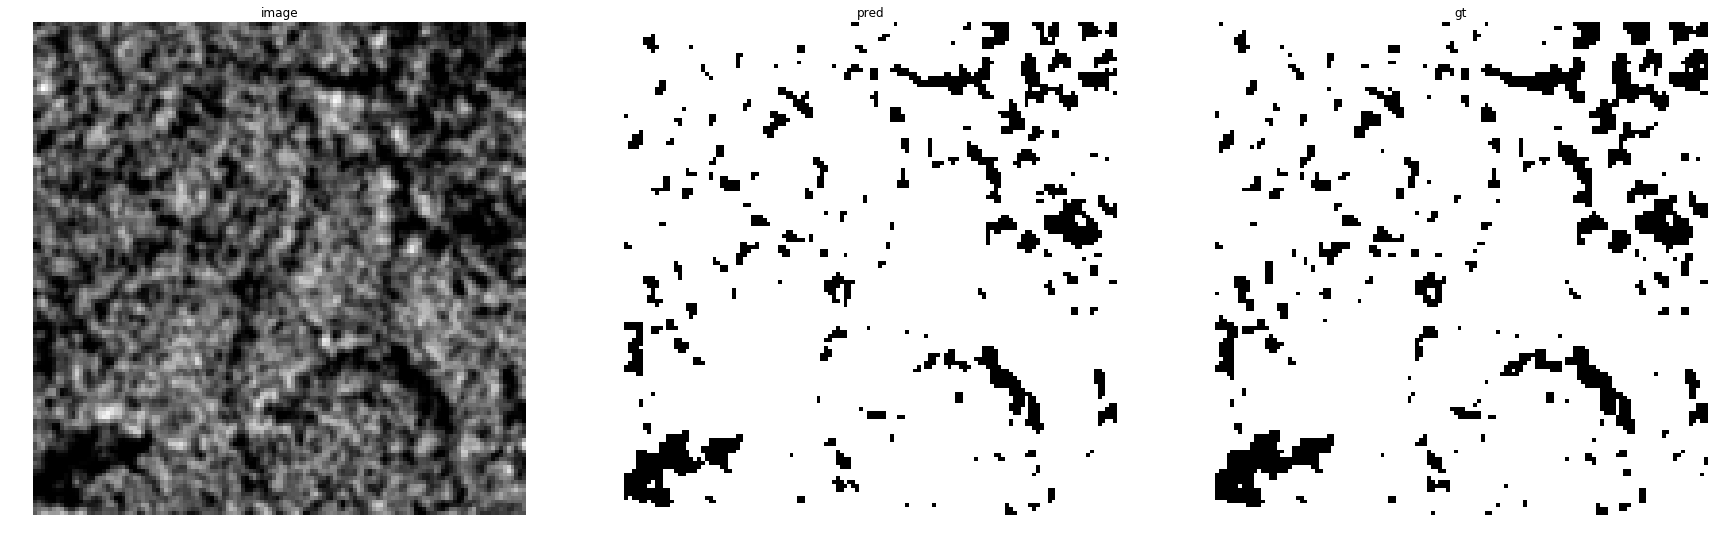

accuracy    : 0.97357177734375
precision   : 0.9716418932803617
recall      : 0.9986623486341876
f1          : 0.9849668437315557
pr_auc      : 0.9996762459627766
iou         : 0.9703789848132439


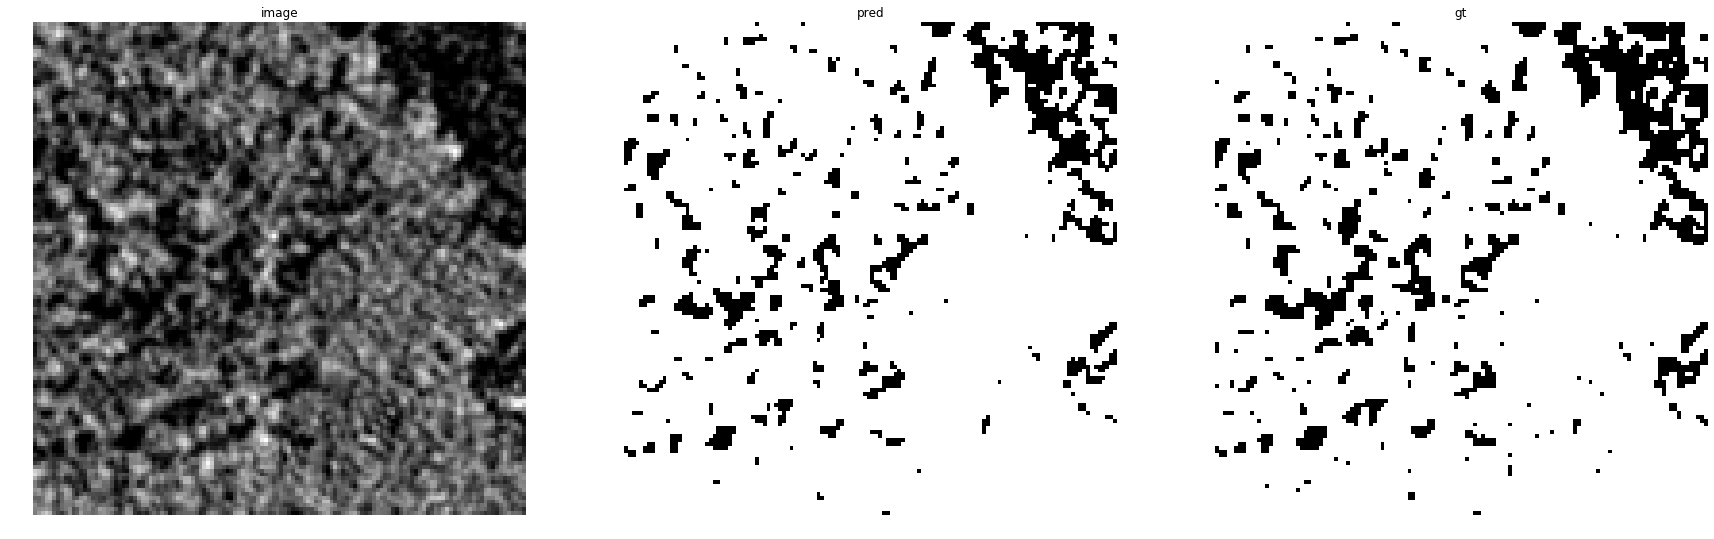

accuracy    : 0.96881103515625
precision   : 0.9667032816147192
recall      : 0.9981569433614518
f1          : 0.982178355944617
pr_auc      : 0.9995365852991066
iou         : 0.9649808114035088


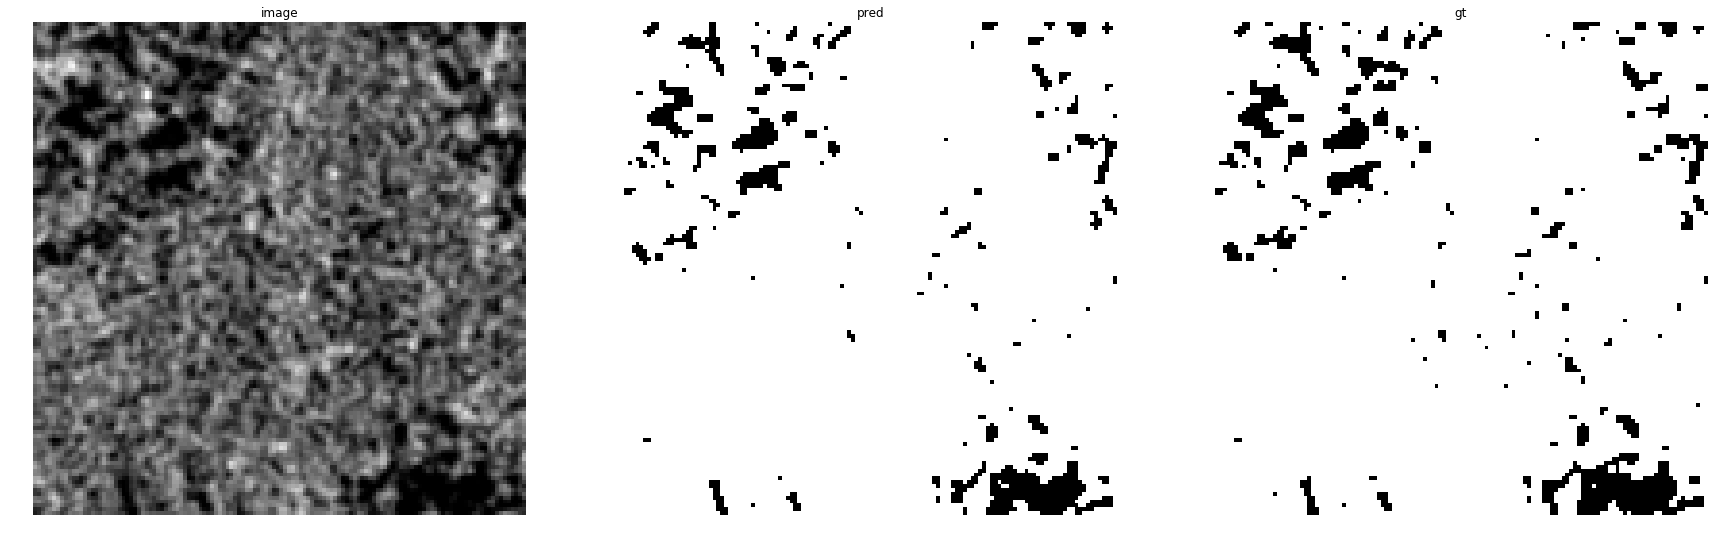

accuracy    : 0.9842529296875
precision   : 0.9836473050758765
recall      : 0.9994682972218529
f1          : 0.9914946924243423
pr_auc      : 0.9998808327725135
iou         : 0.9831328451882845


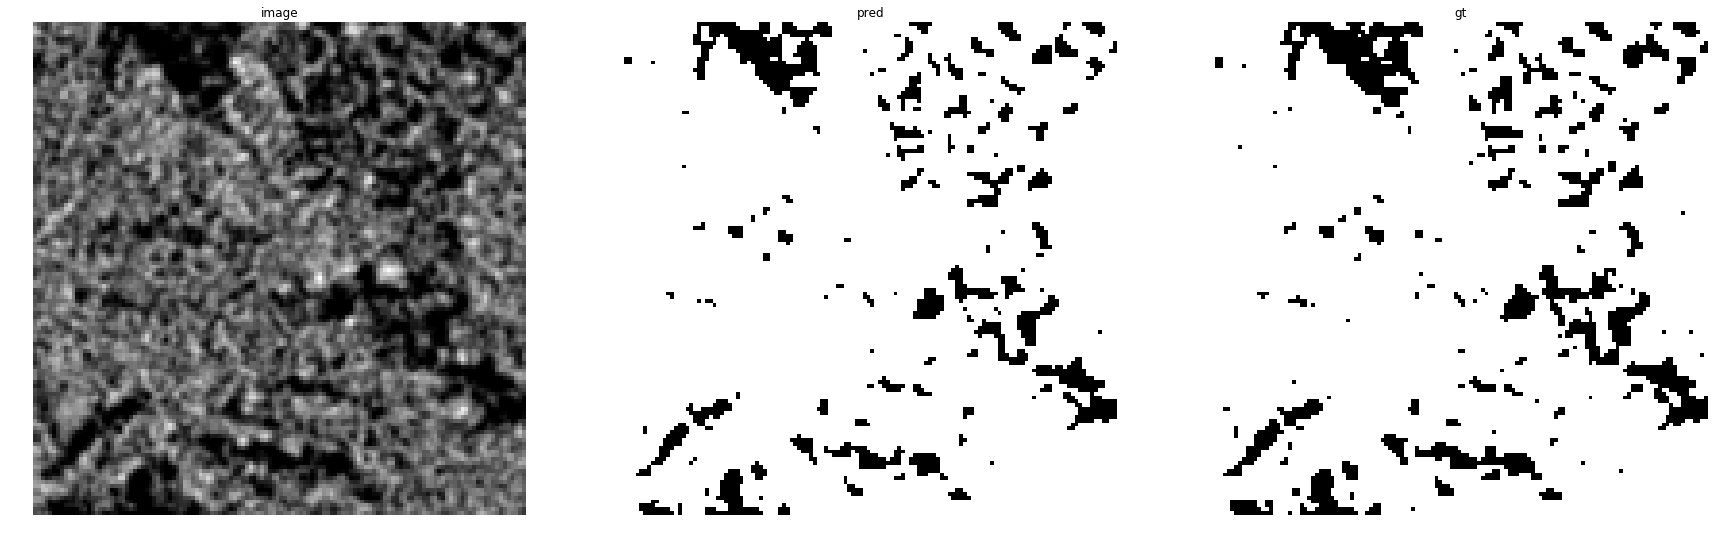

accuracy    : 0.9747314453125
precision   : 0.9728168535507985
recall      : 0.9990229604298974
f1          : 0.9857457650461369
pr_auc      : 0.9997411470590133
iou         : 0.9718921854844185


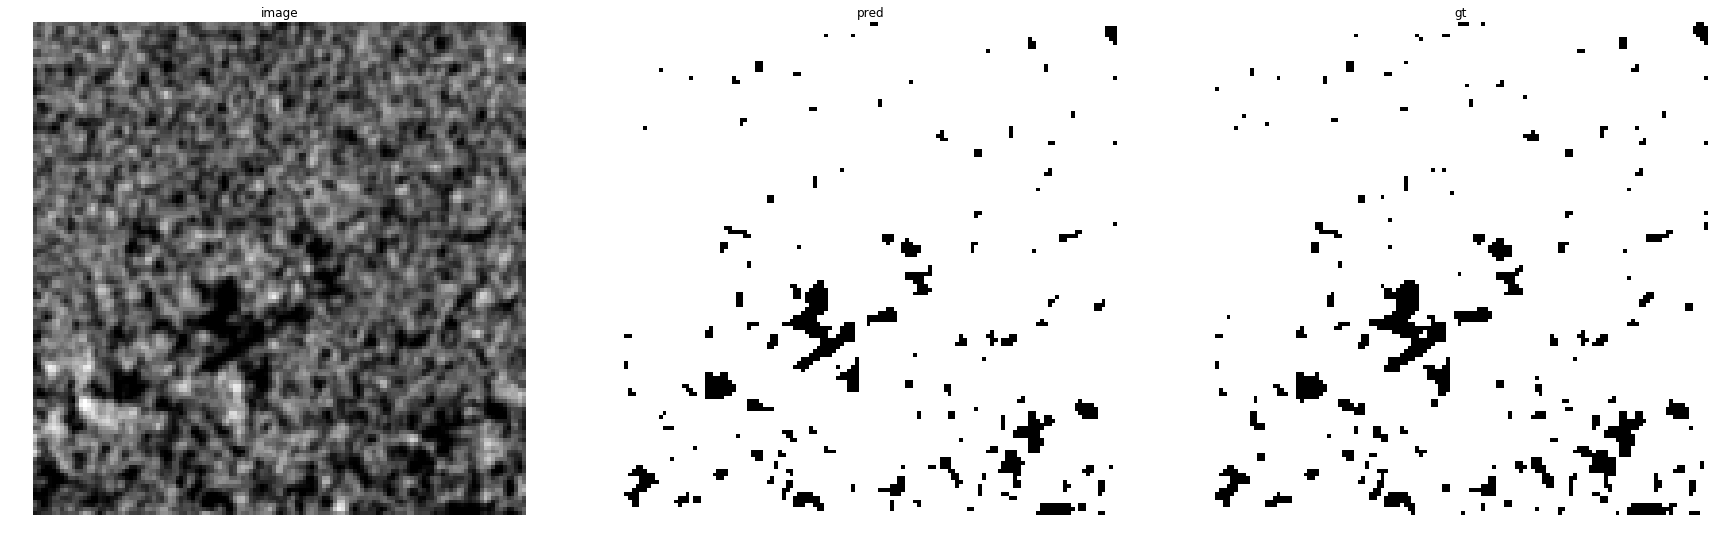

accuracy    : 0.98486328125
precision   : 0.9854754373507197
recall      : 0.9984956504676565
f1          : 0.9919428200129955
pr_auc      : 0.9998772502145499
iou         : 0.9840144385716127


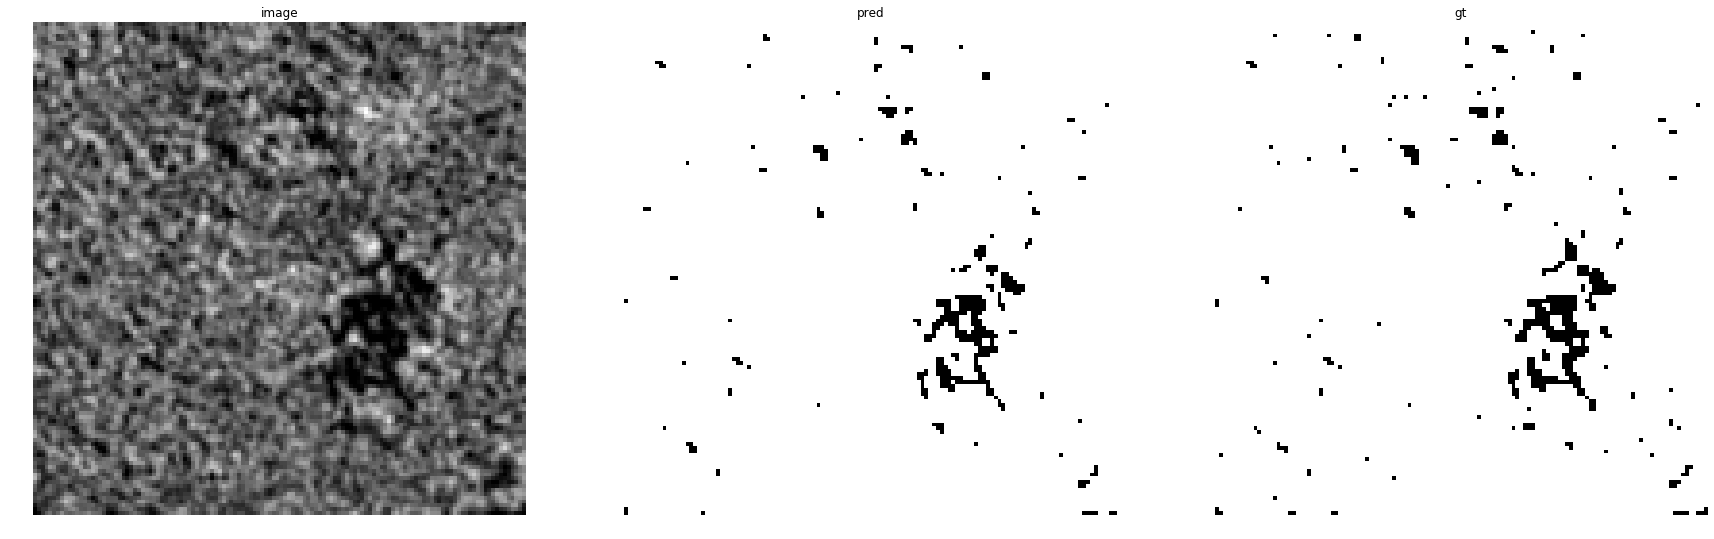

accuracy    : 0.9912109375
precision   : 0.9916118935837246
recall      : 0.9993691249763422
f1          : 0.9954753974737636
pr_auc      : 0.999963728603463
iou         : 0.990991554582421


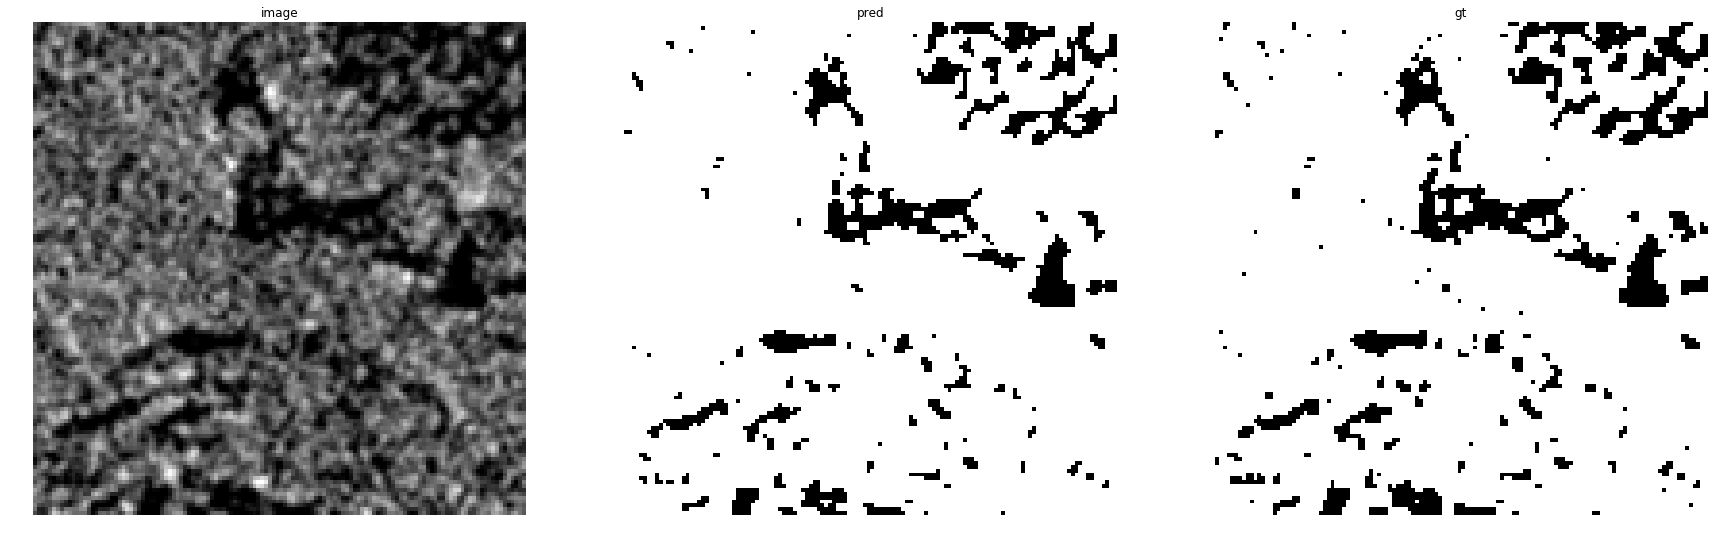

accuracy    : 0.97705078125
precision   : 0.9751467977604806
recall      : 0.9991604869175879
f1          : 0.987007601935038
pr_auc      : 0.999782540049441
iou         : 0.9743484786464729


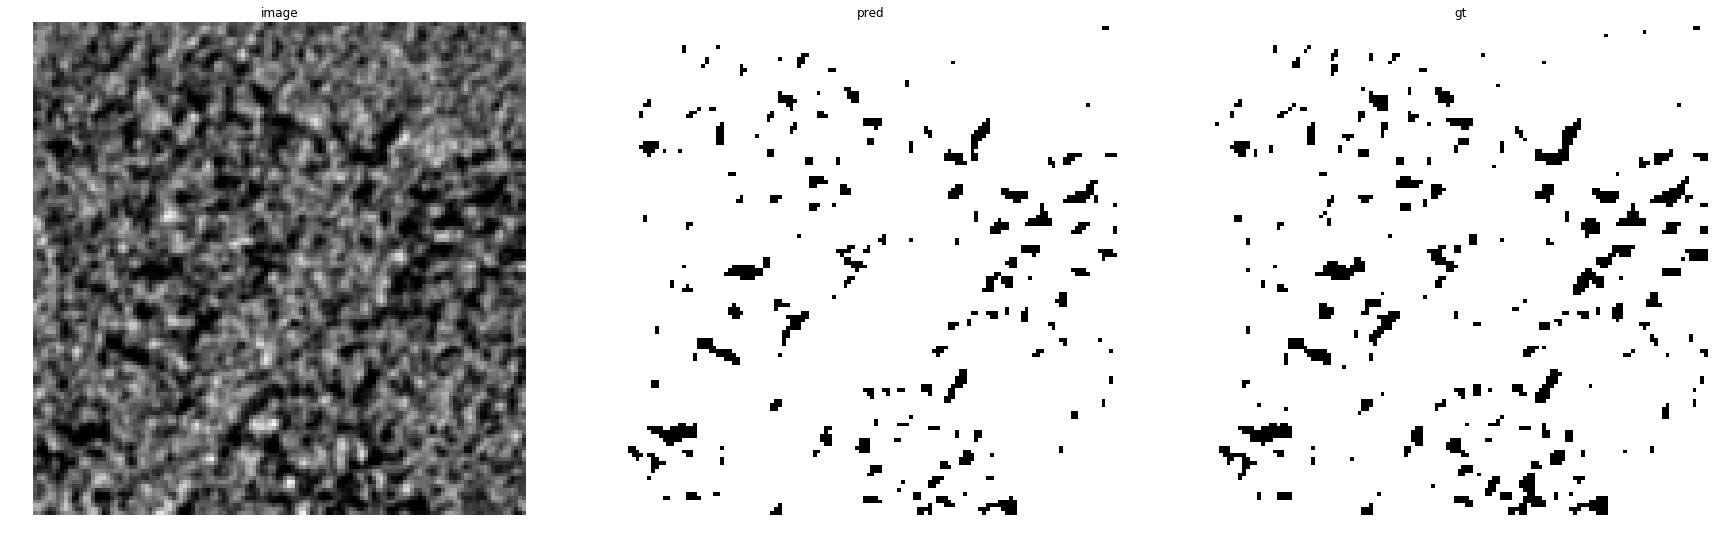

accuracy    : 0.97918701171875
precision   : 0.9793548387096774
recall      : 0.998618511940004
f1          : 0.98889286993909
pr_auc      : 0.99979897776338
iou         : 0.9780297661233168


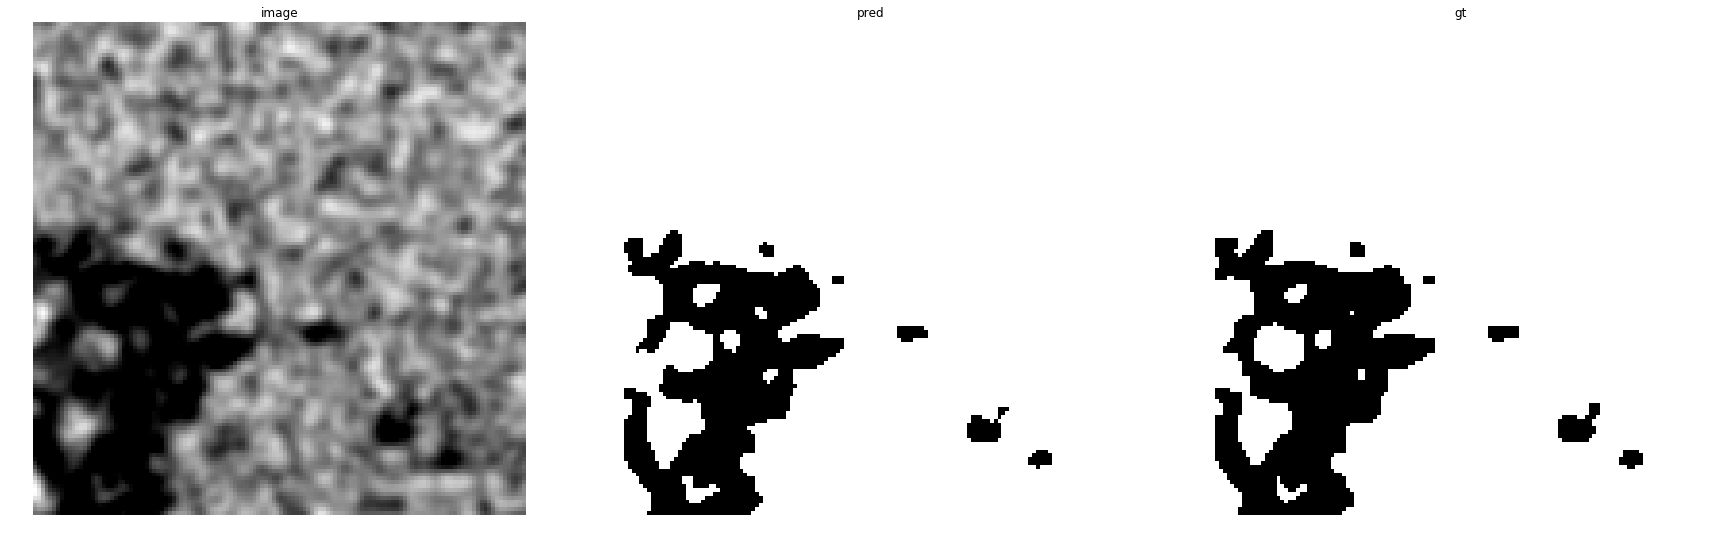

accuracy    : 0.98870849609375
precision   : 0.9871353251318102
recall      : 0.9998575904300769
f1          : 0.993455728890304
pr_auc      : 0.999941196756511
iou         : 0.986996555844521


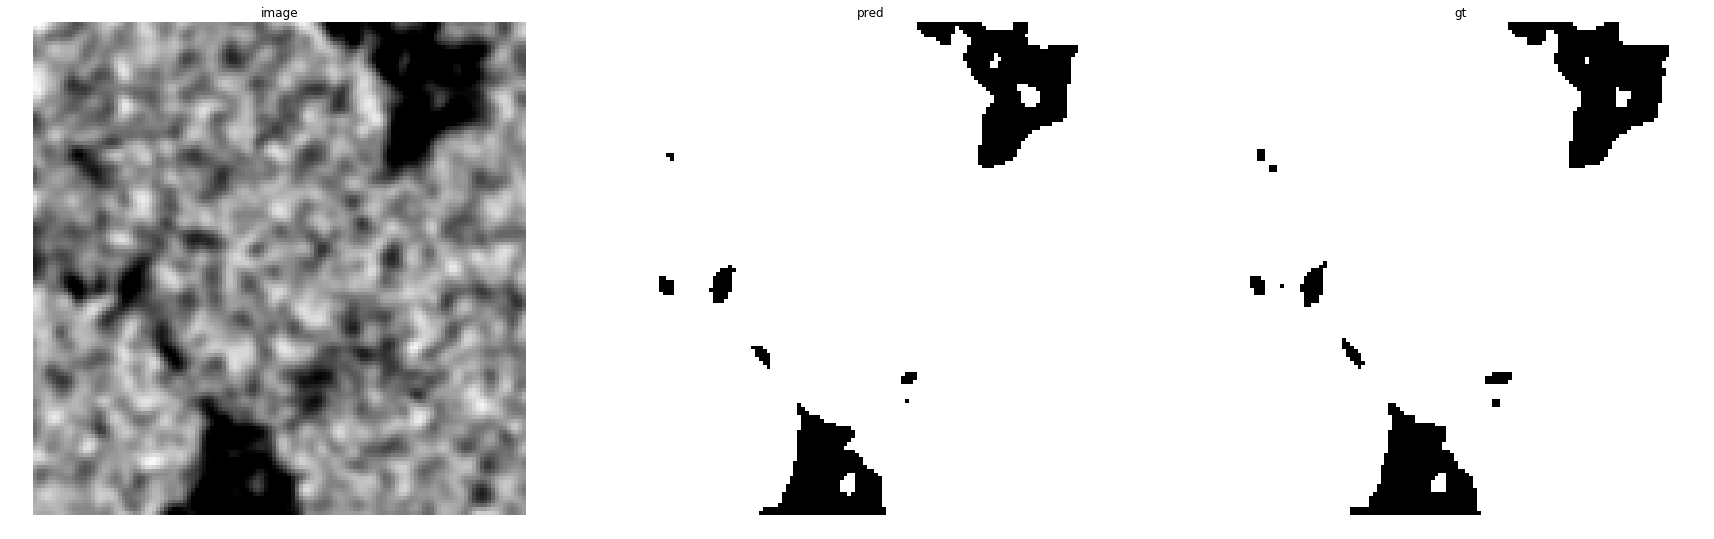

accuracy    : 0.993408203125
precision   : 0.9929861708462913
recall      : 0.9998667466186955
f1          : 0.9964145807051326
pr_auc      : 0.9999836546244638
iou         : 0.9928547800198478


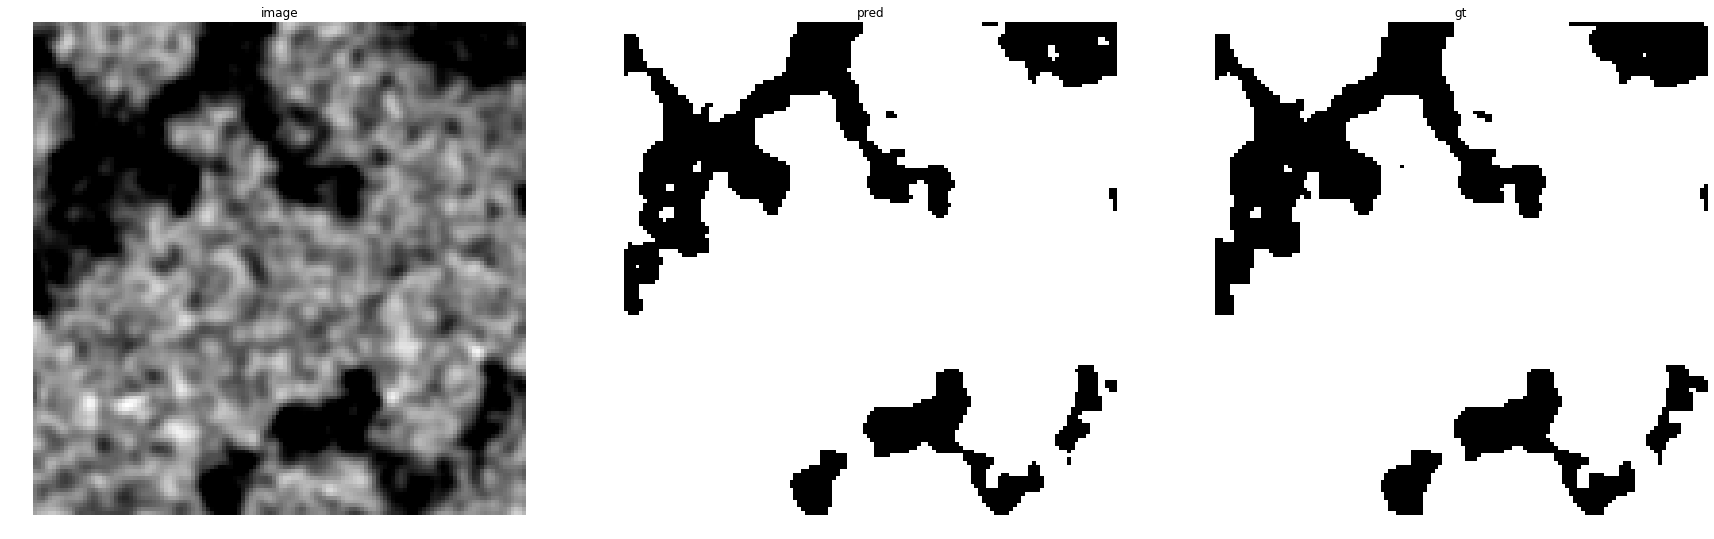

accuracy    : 0.98468017578125
precision   : 0.9815051499887226
recall      : 0.9996171516079633
f1          : 0.9904783581806457
pr_auc      : 0.9999051781147645
iou         : 0.9811363294754246


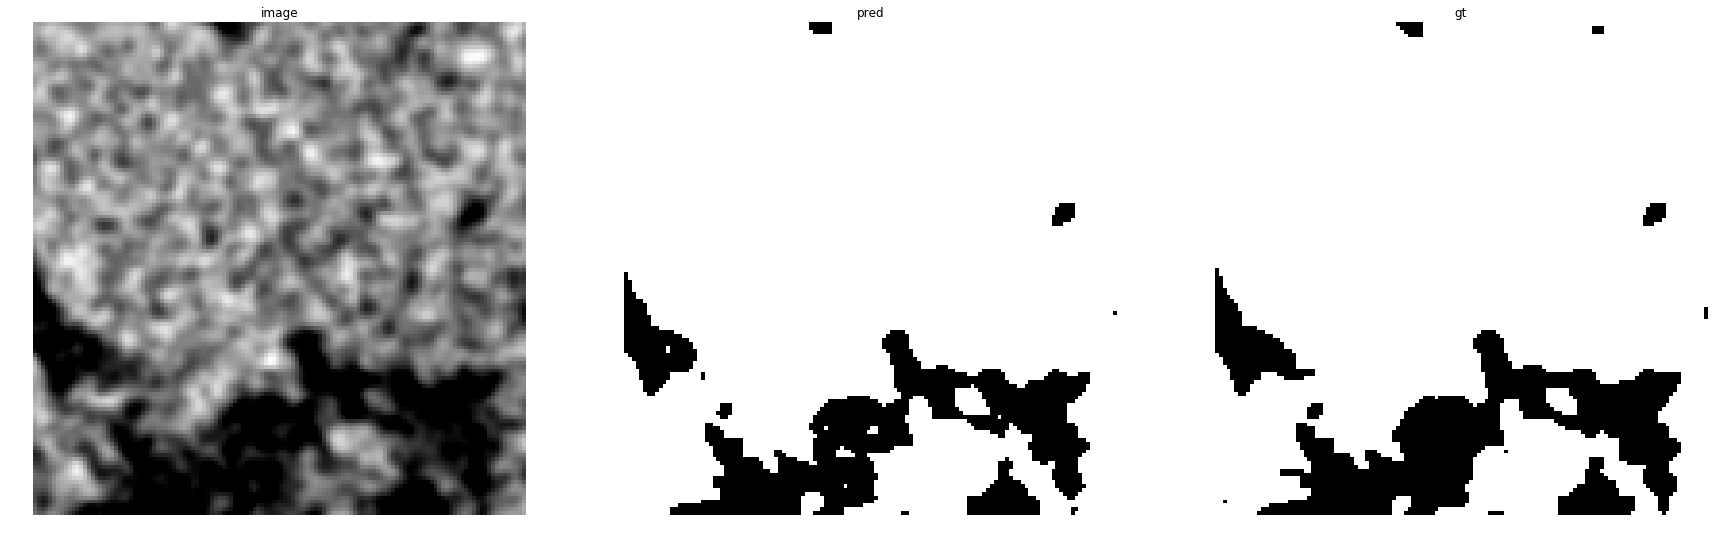

accuracy    : 0.98370361328125
precision   : 0.9812495577725889
recall      : 0.9998558038932949
f1          : 0.9904653072885048
pr_auc      : 0.9998535940422102
iou         : 0.9811107180756986


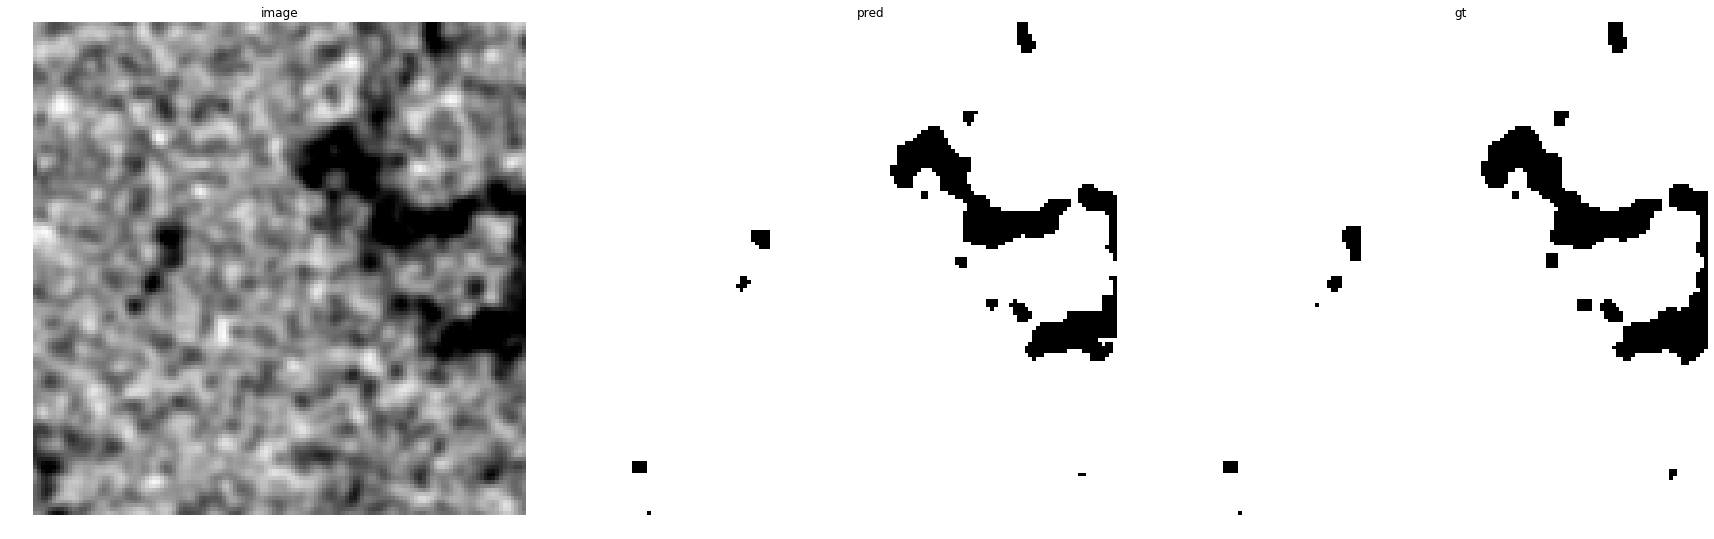

accuracy    : 0.99127197265625
precision   : 0.9907551073183346
recall      : 1.0
f1          : 0.9953560874224661
pr_auc      : 0.9999820935373015
iou         : 0.9907551073183346


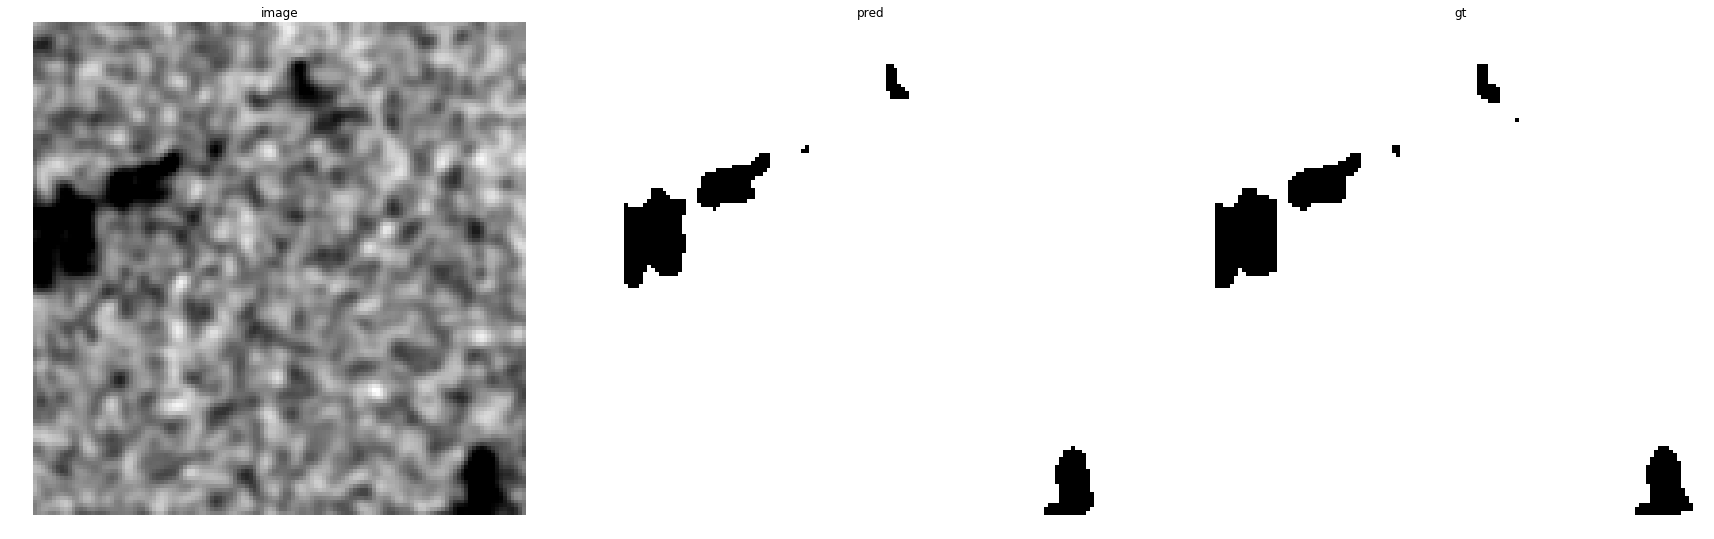

accuracy    : 0.99688720703125
precision   : 0.9967577876668786
recall      : 1.0
f1          : 0.9983762615810755
pr_auc      : 0.9999972338621895
iou         : 0.9967577876668786


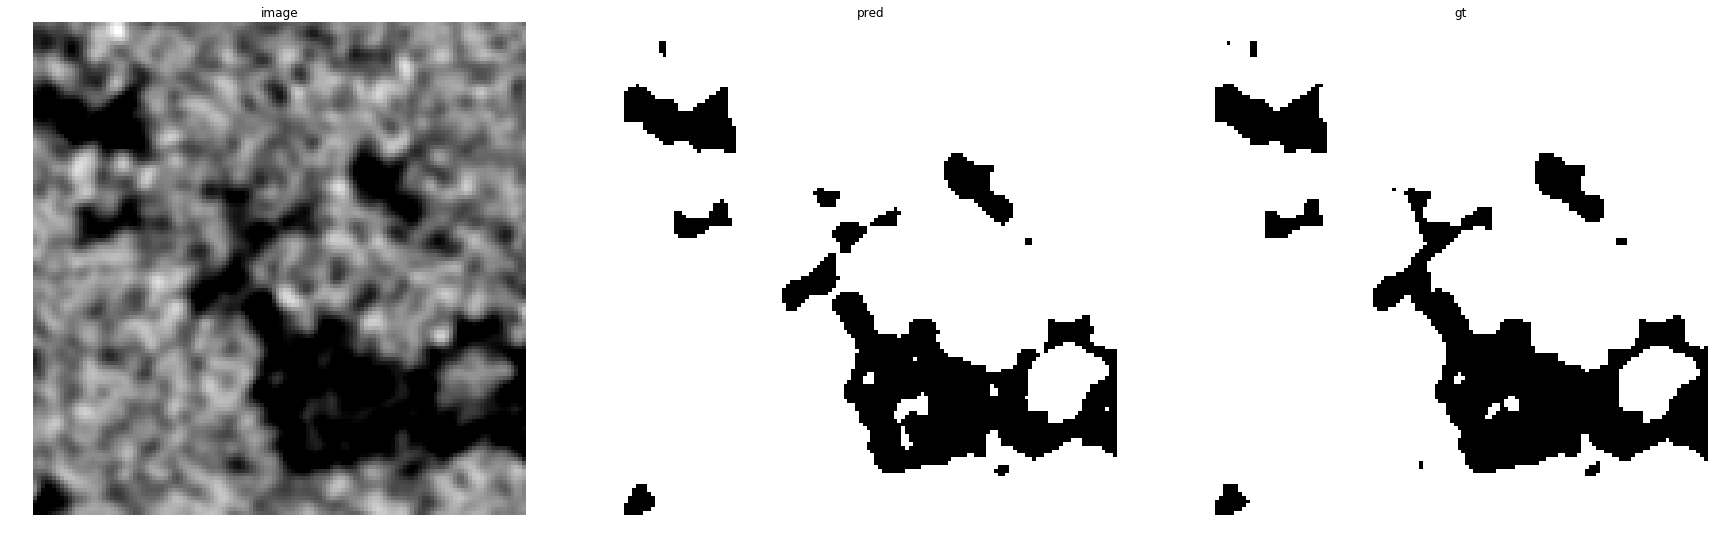

accuracy    : 0.984619140625
precision   : 0.9820151679306609
recall      : 0.99977939554379
f1          : 0.9908176650634019
pr_auc      : 0.9999054401690356
iou         : 0.9818024263431543


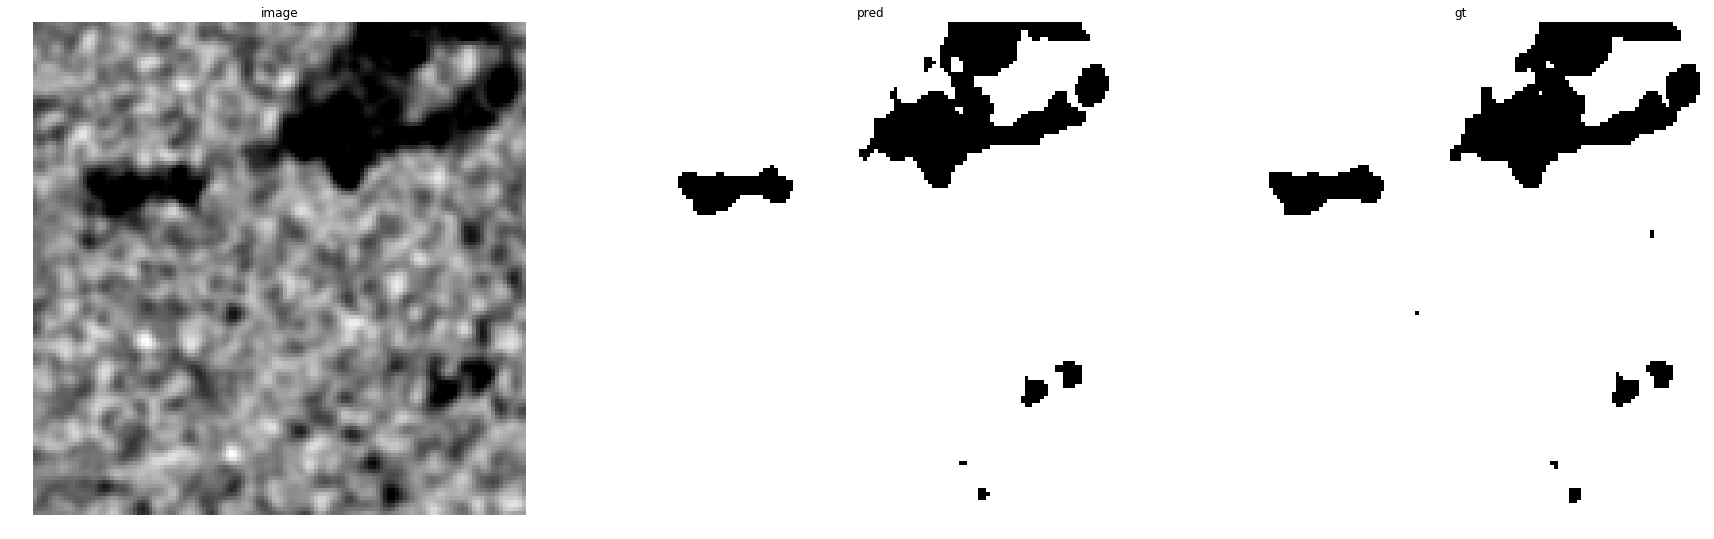

accuracy    : 0.99139404296875
precision   : 0.9907679957184907
recall      : 0.9997974751907108
f1          : 0.9952622559725816
pr_auc      : 0.9999694570340764
iou         : 0.9905691926961407


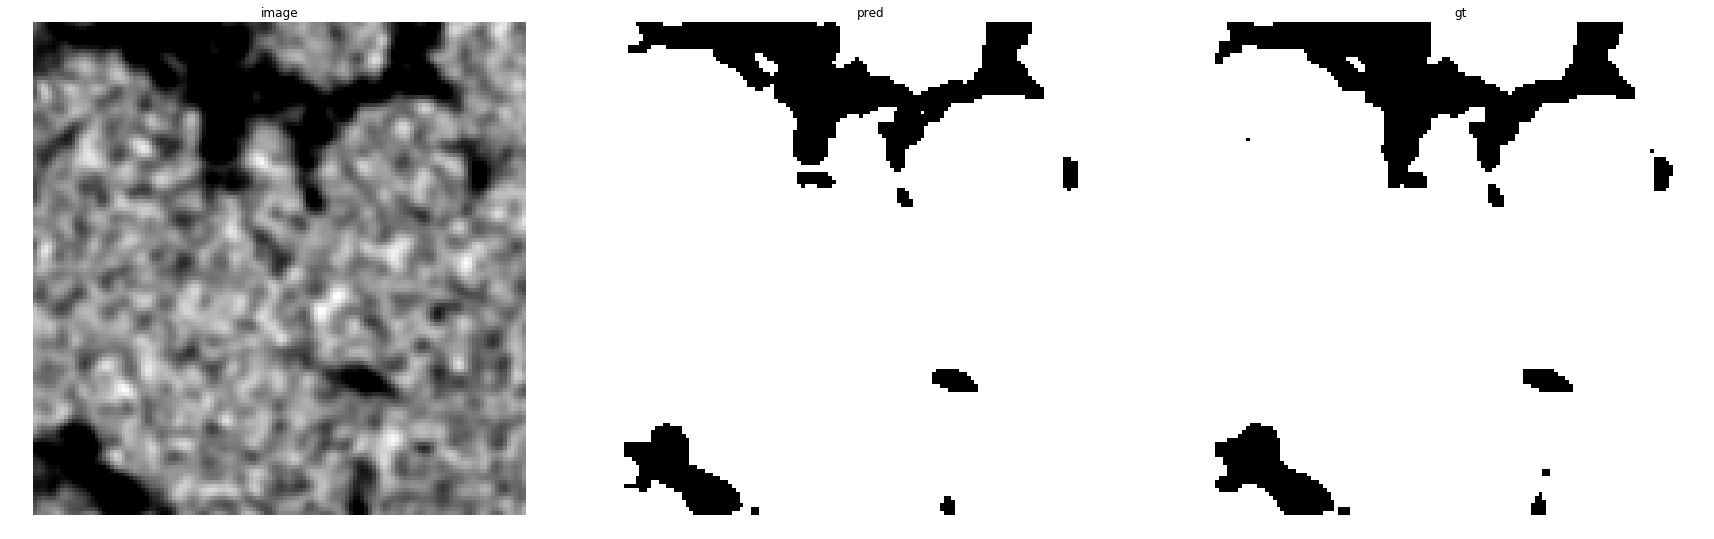

accuracy    : 0.9913330078125
precision   : 0.9902601920133575
recall      : 0.9998595110986233
f1          : 0.9950367004543867
pr_auc      : 0.9999621648805337
iou         : 0.9901224262659989


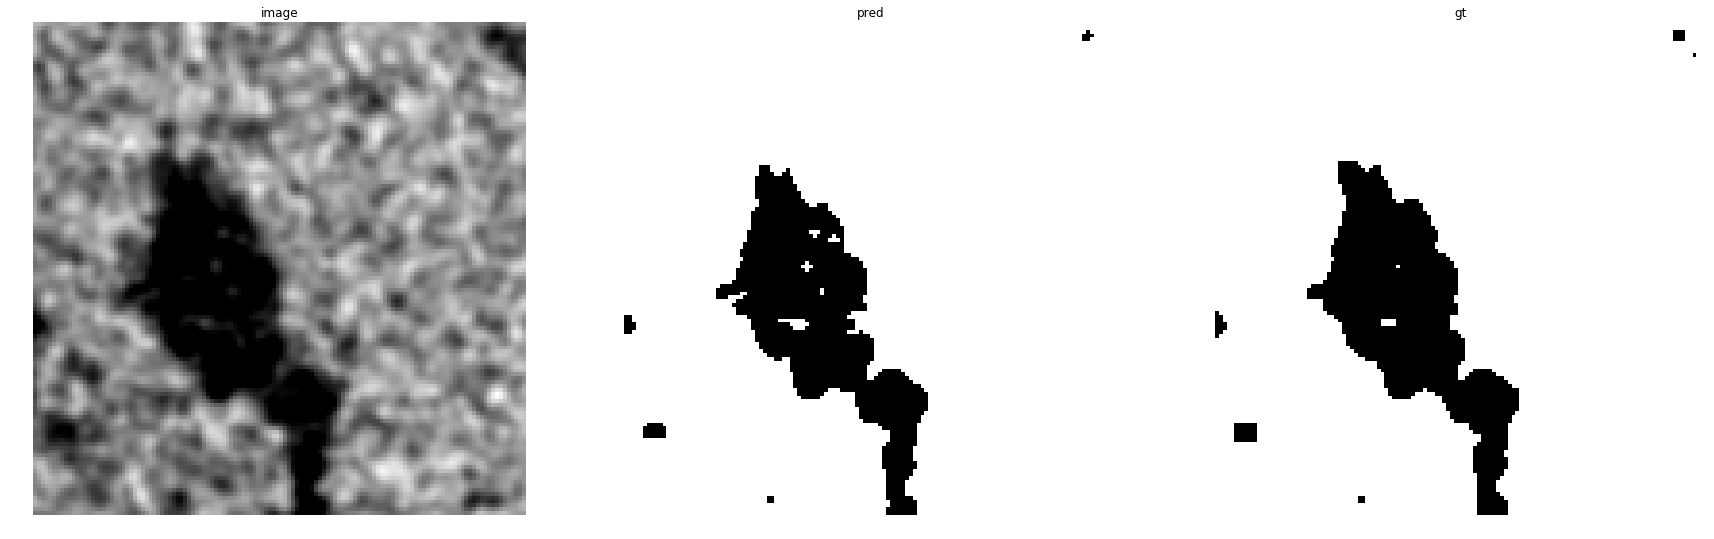

accuracy    : 0.99169921875
precision   : 0.990728021978022
recall      : 0.999930680715375
f1          : 0.995308079762644
pr_auc      : 0.9999798789670769
iou         : 0.9906599821440835


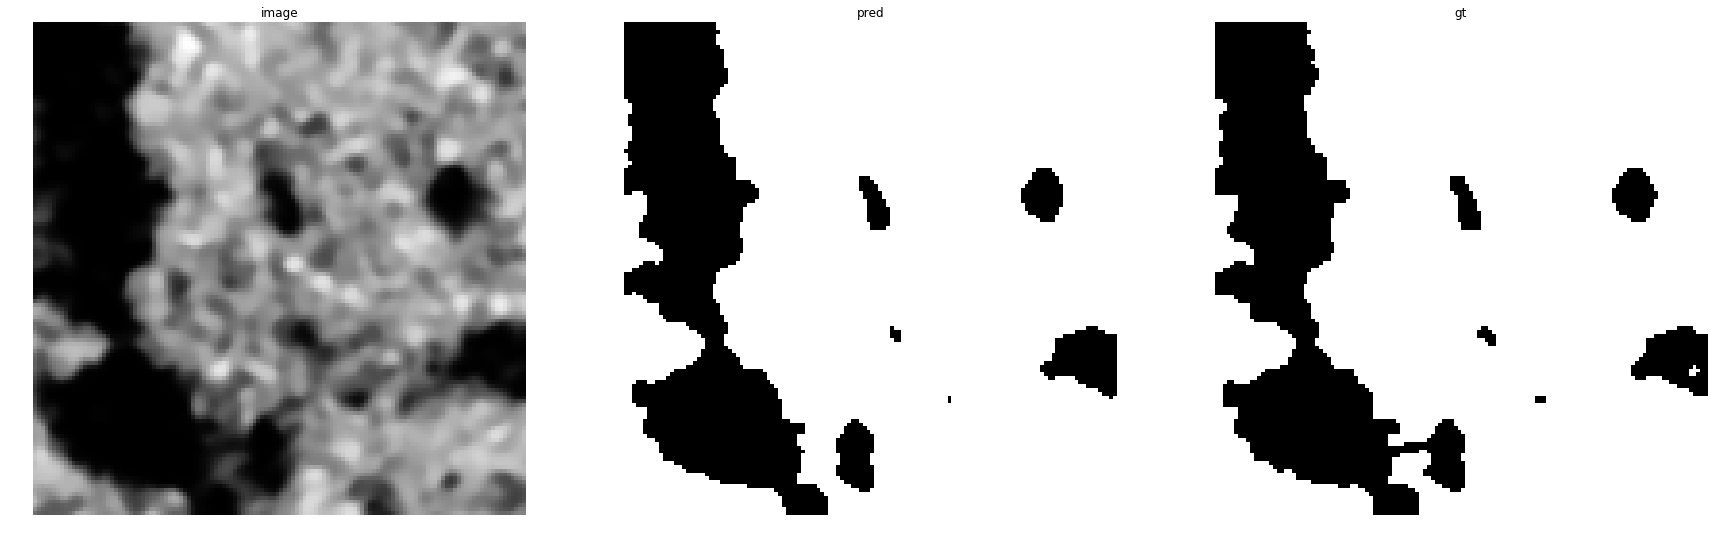

accuracy    : 0.9927978515625
precision   : 0.9937608592639393
recall      : 0.996910156868959
f1          : 0.9953330169277013
pr_auc      : 0.9999224235107502
iou         : 0.9907093929611842


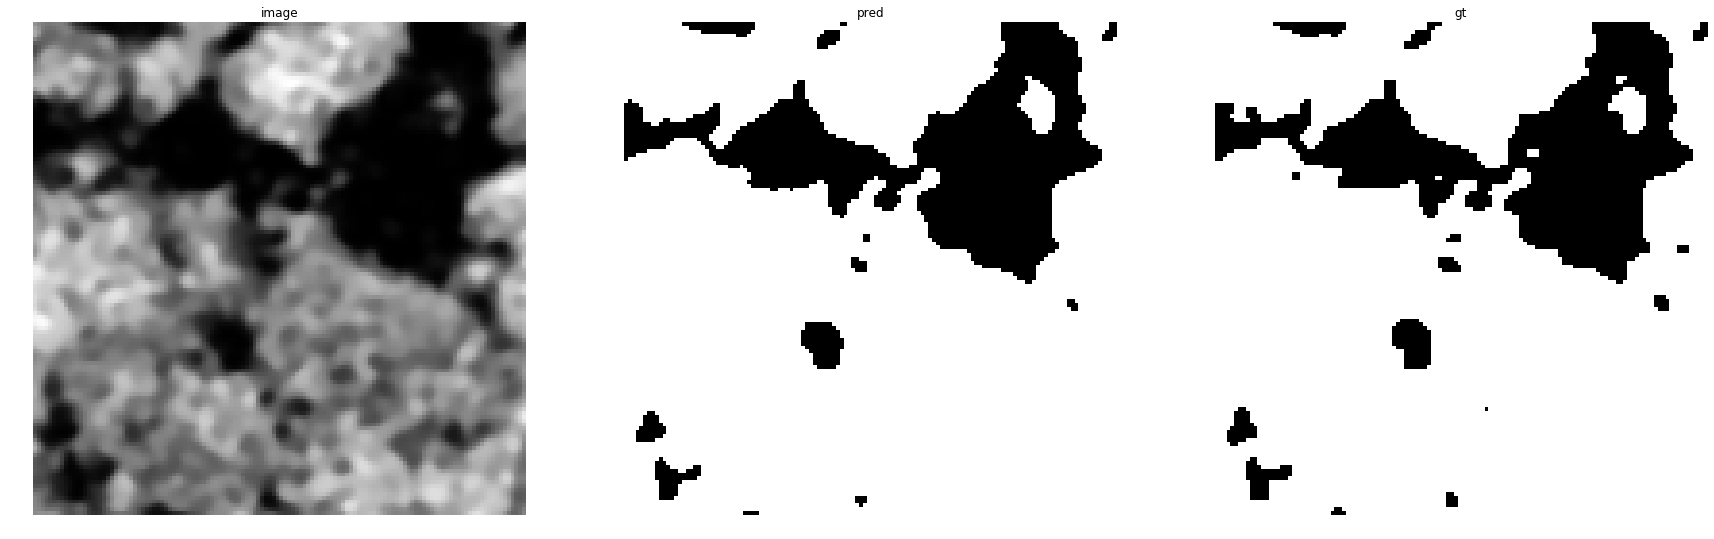

accuracy    : 0.98907470703125
precision   : 0.9905022414710128
recall      : 0.9958747135217724
f1          : 0.9931812121442993
pr_auc      : 0.9998574070270375
iou         : 0.9864547862277715


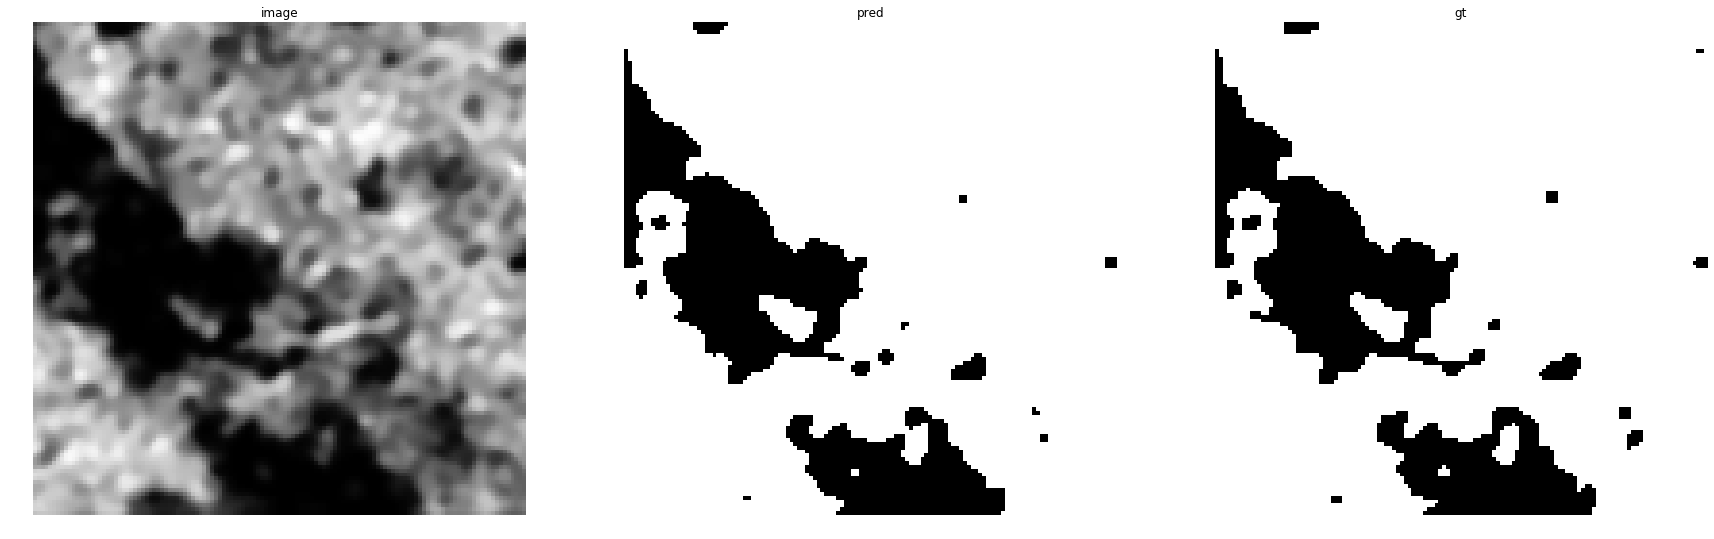

accuracy    : 0.98931884765625
precision   : 0.989324913546835
recall      : 0.9974986735389979
f1          : 0.9933949801849404
pr_auc      : 0.9998982932053628
iou         : 0.9868766404199475


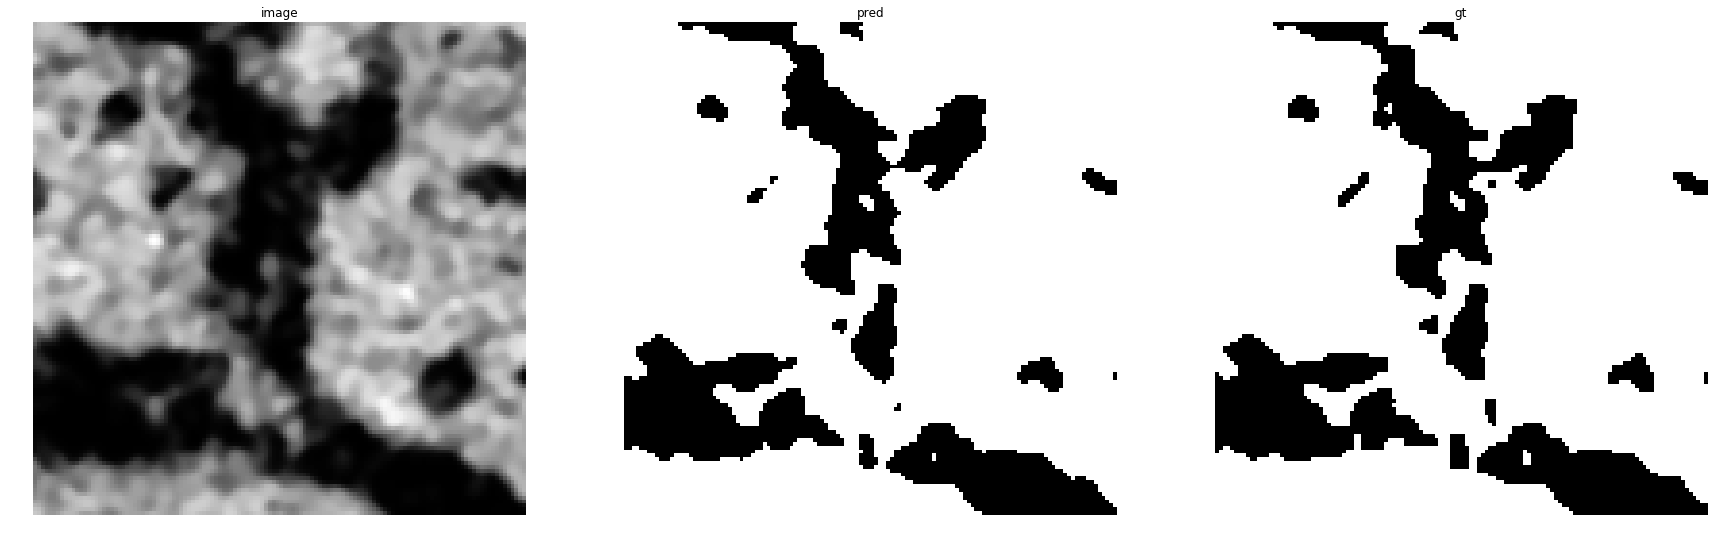

accuracy    : 0.98736572265625
precision   : 0.988442487616951
recall      : 0.9952501583280557
f1          : 0.9918346416314938
pr_auc      : 0.999798812805397
iou         : 0.9838015494170123


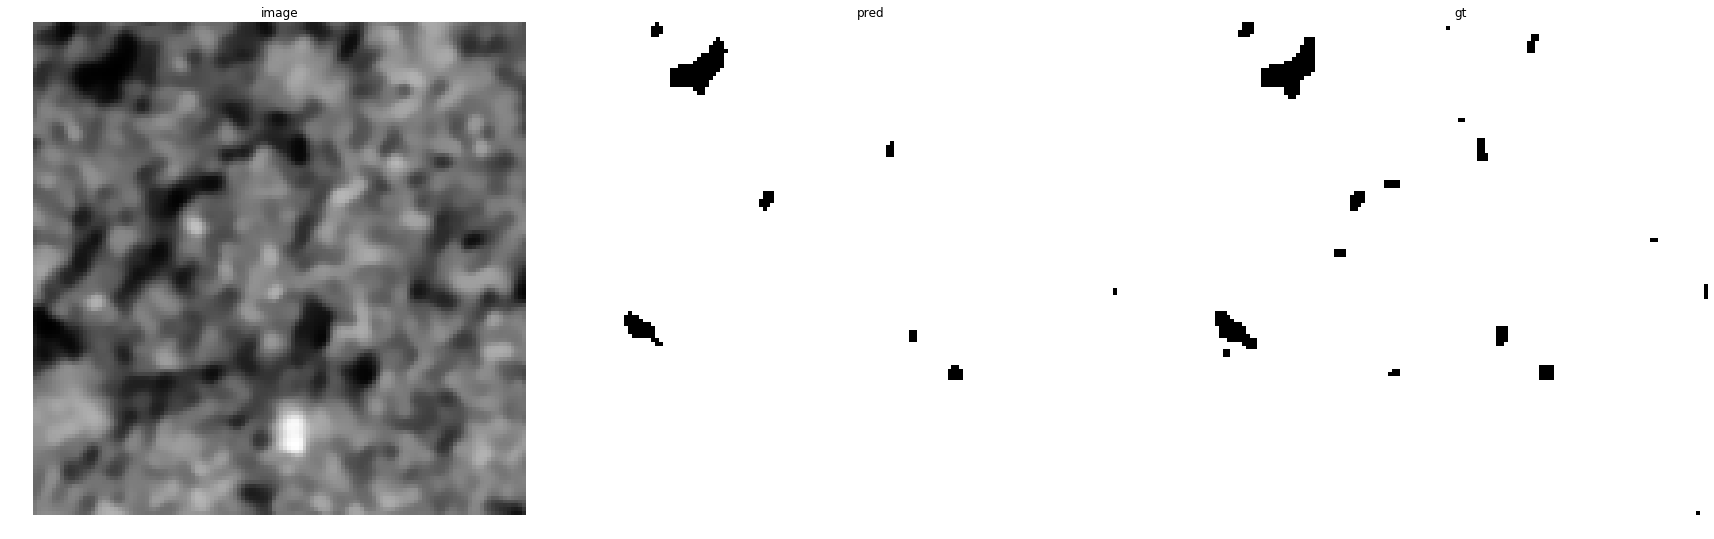

accuracy    : 0.99444580078125
precision   : 0.9945625308947108
recall      : 0.9998136530219268
f1          : 0.9971811789486726
pr_auc      : 0.9999827196033999
iou         : 0.9943782047321925


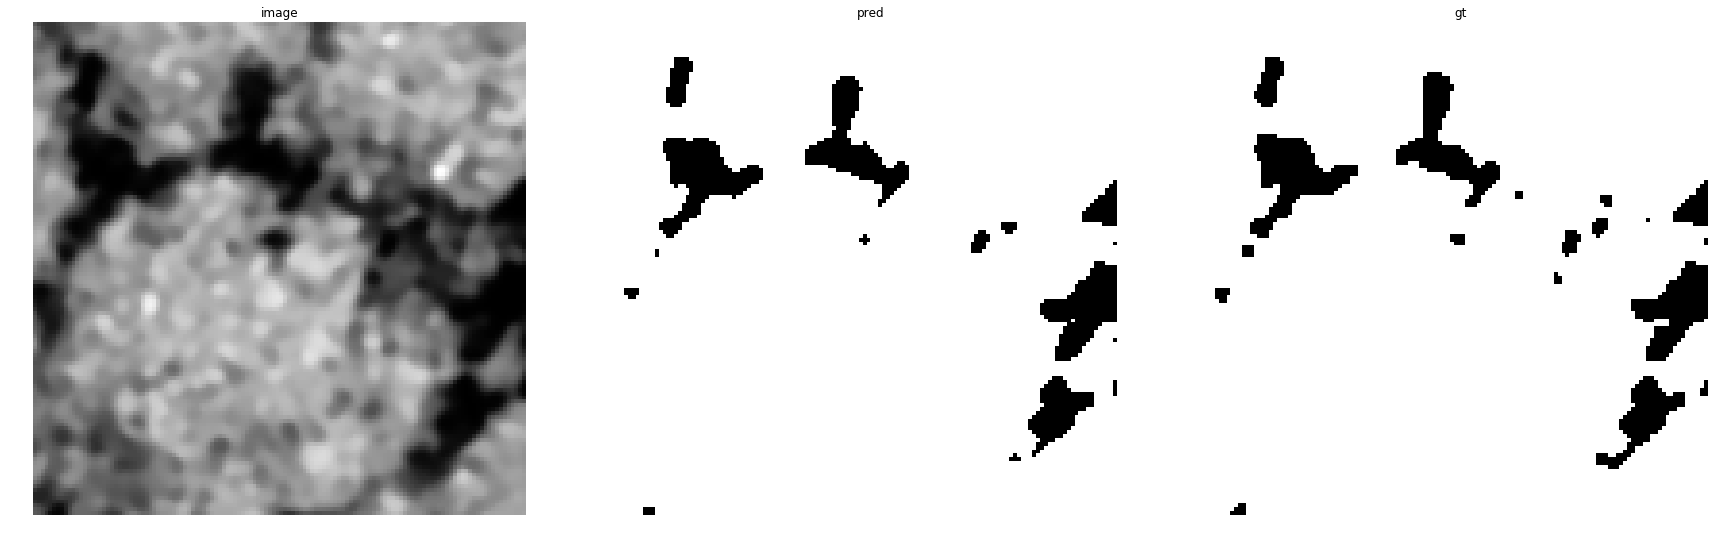

accuracy    : 0.99139404296875
precision   : 0.9925318881765911
recall      : 0.9981390402764855
f1          : 0.9953275673526195
pr_auc      : 0.9999254210632618
iou         : 0.9906985948941223


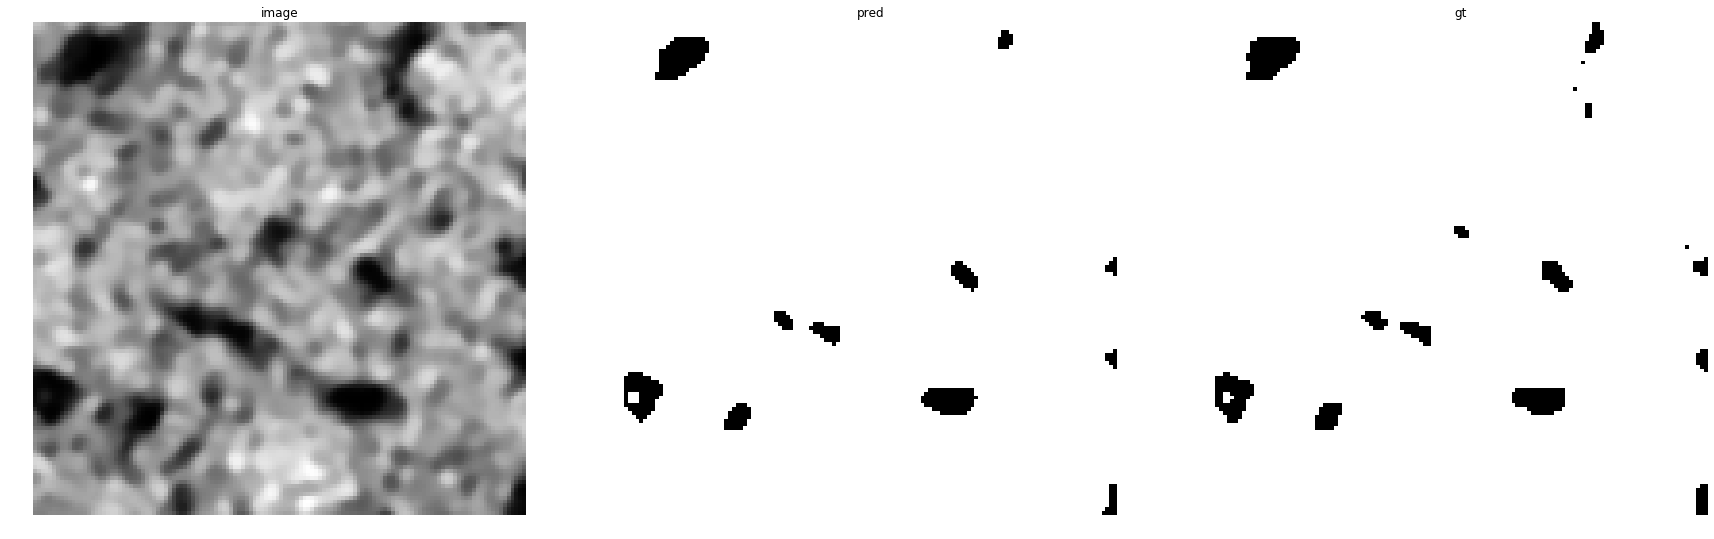

accuracy    : 0.99432373046875
precision   : 0.994791993474305
recall      : 0.9993696419566314
f1          : 0.9970755636615201
pr_auc      : 0.9999821469998128
iou         : 0.9941681821032169


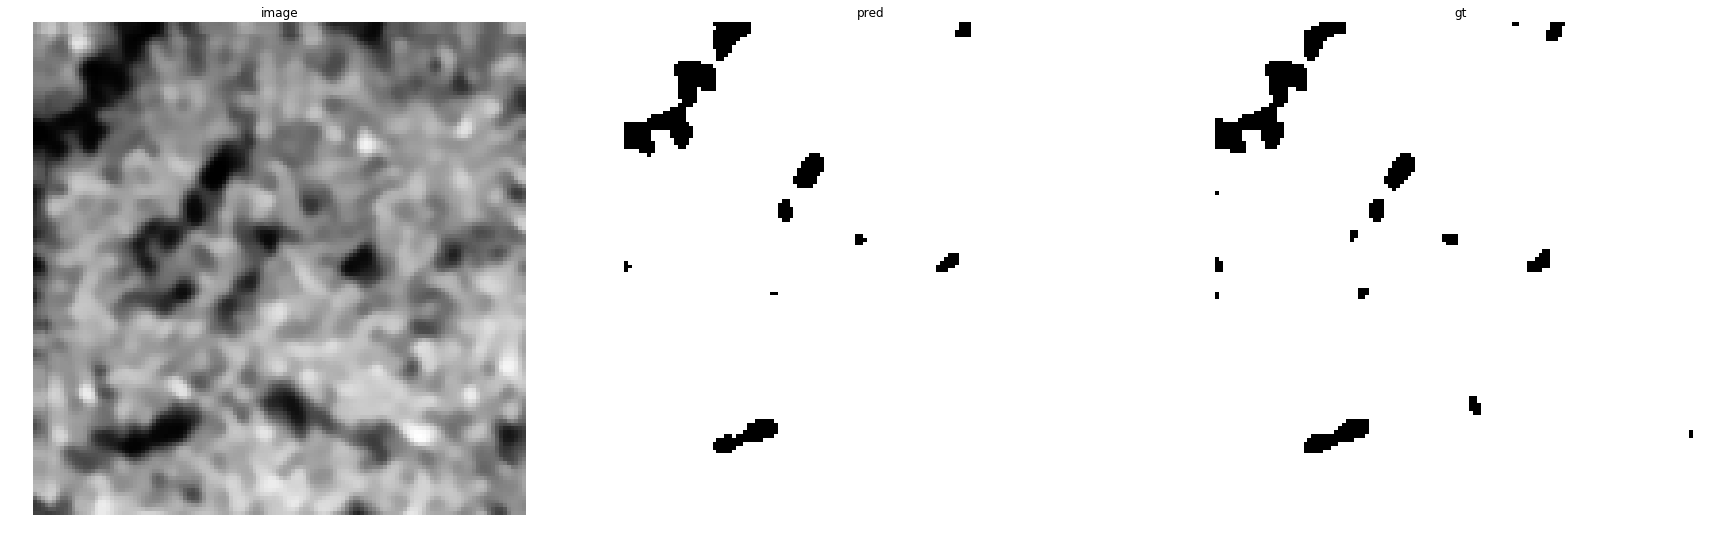

accuracy    : 0.9951171875
precision   : 0.9959142623672135
recall      : 0.9990541648275427
f1          : 0.9974817426340973
pr_auc      : 0.9999752642401366
iou         : 0.9949761366490831


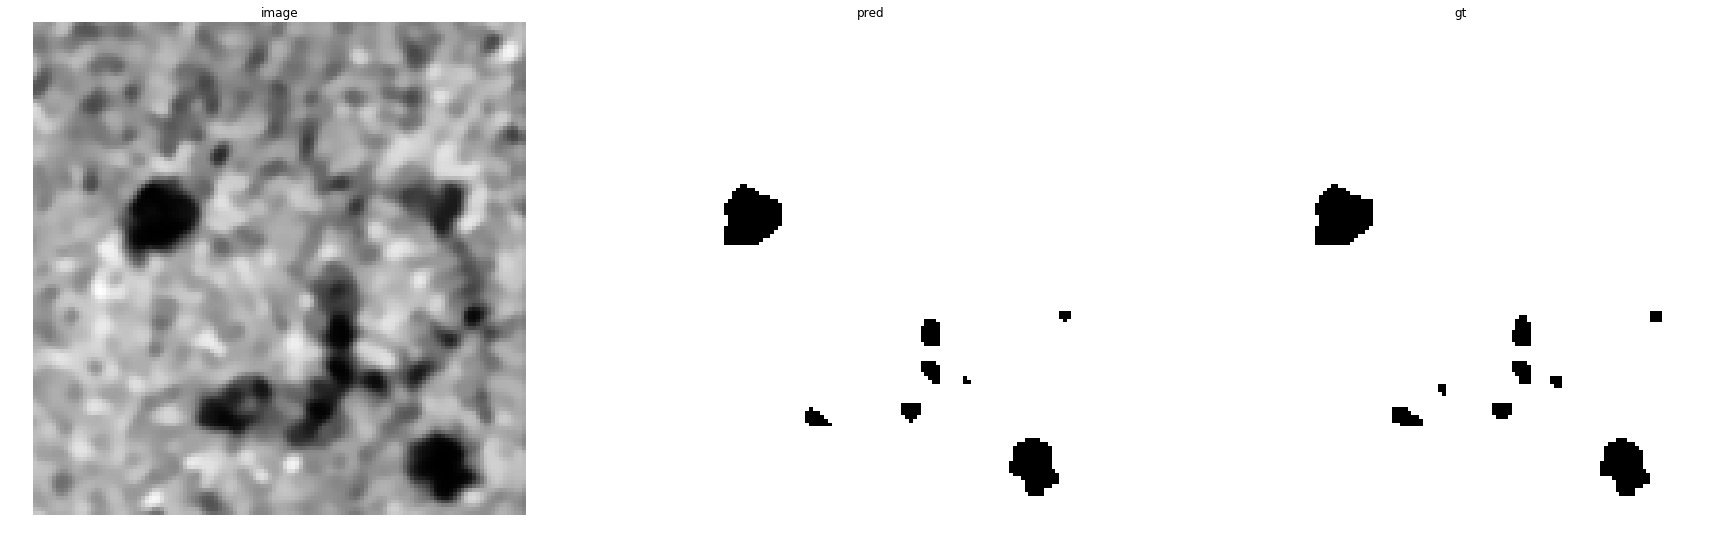

accuracy    : 0.998046875
precision   : 0.998371335504886
recall      : 0.9996236828901154
f1          : 0.9989971167105427
pr_auc      : 0.9999937260192544
iou         : 0.9979962429555417


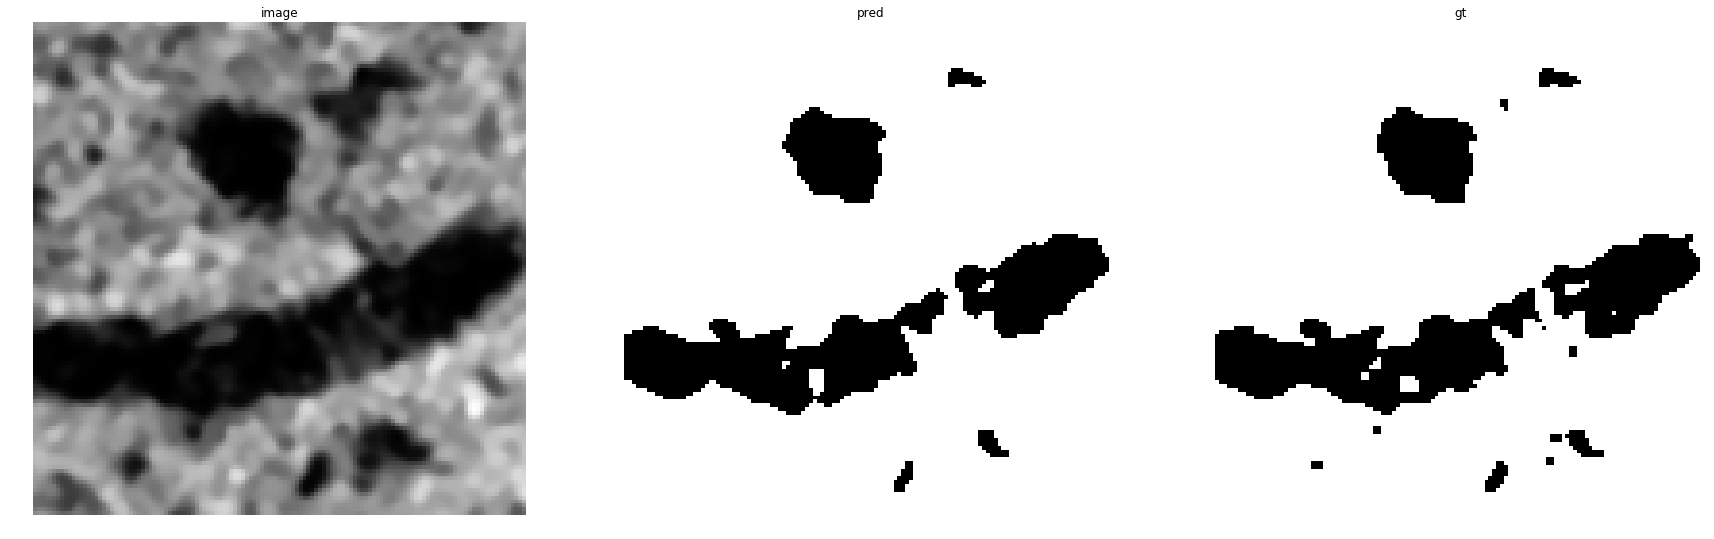

accuracy    : 0.9903564453125
precision   : 0.9924395161290323
recall      : 0.9961694131251807
f1          : 0.994300966671476
pr_auc      : 0.9998607843578111
iou         : 0.9886665232049351


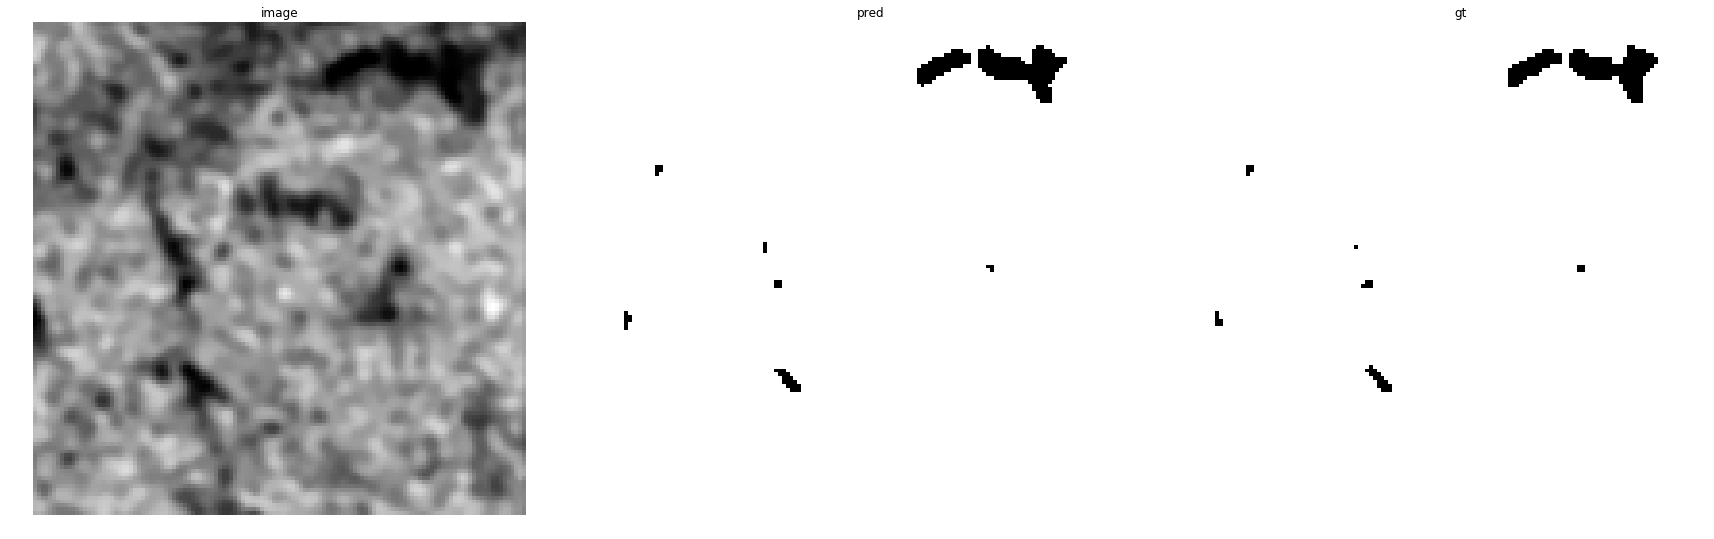

accuracy    : 0.99835205078125
precision   : 0.9993170671136773
recall      : 0.9990069513406157
f1          : 0.9991619851640337
pr_auc      : 0.9999976430081539
iou         : 0.9983253736897599


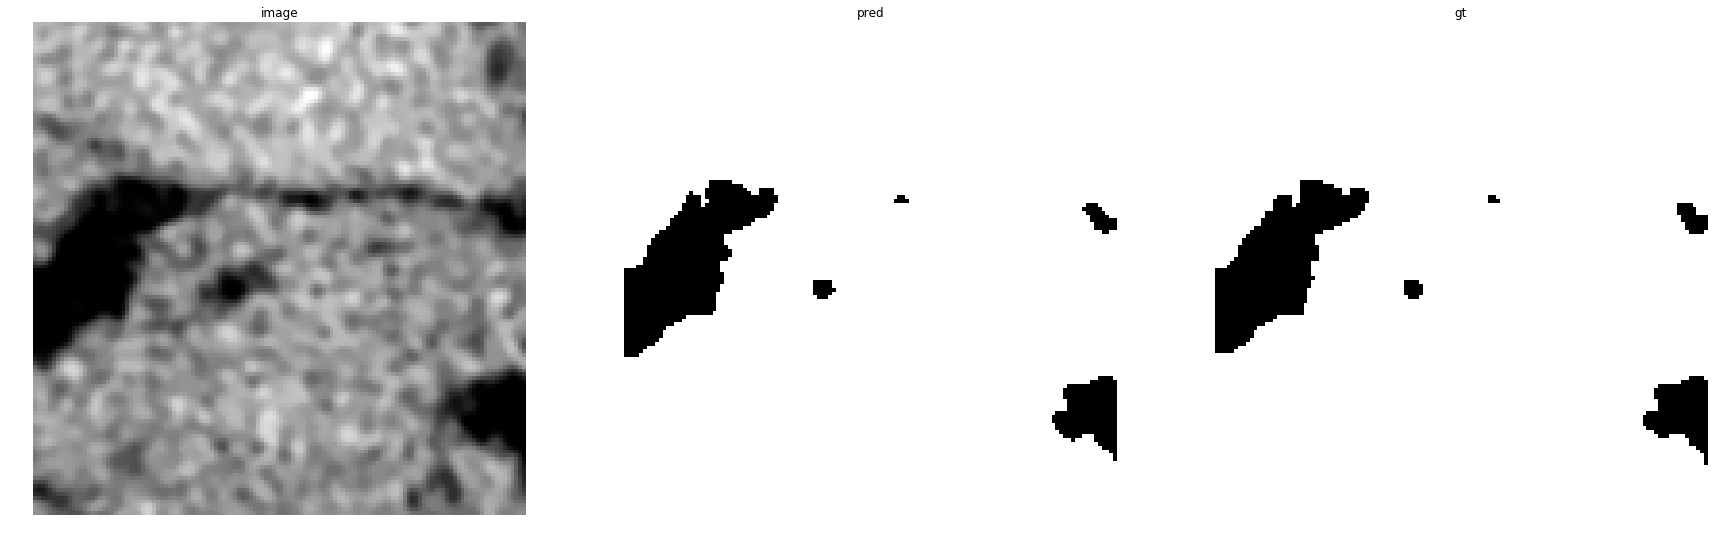

accuracy    : 0.99755859375
precision   : 0.9990147783251232
recall      : 0.9983590416803413
f1          : 0.9986868023637557
pr_auc      : 0.99999451821201
iou         : 0.9973770491803279


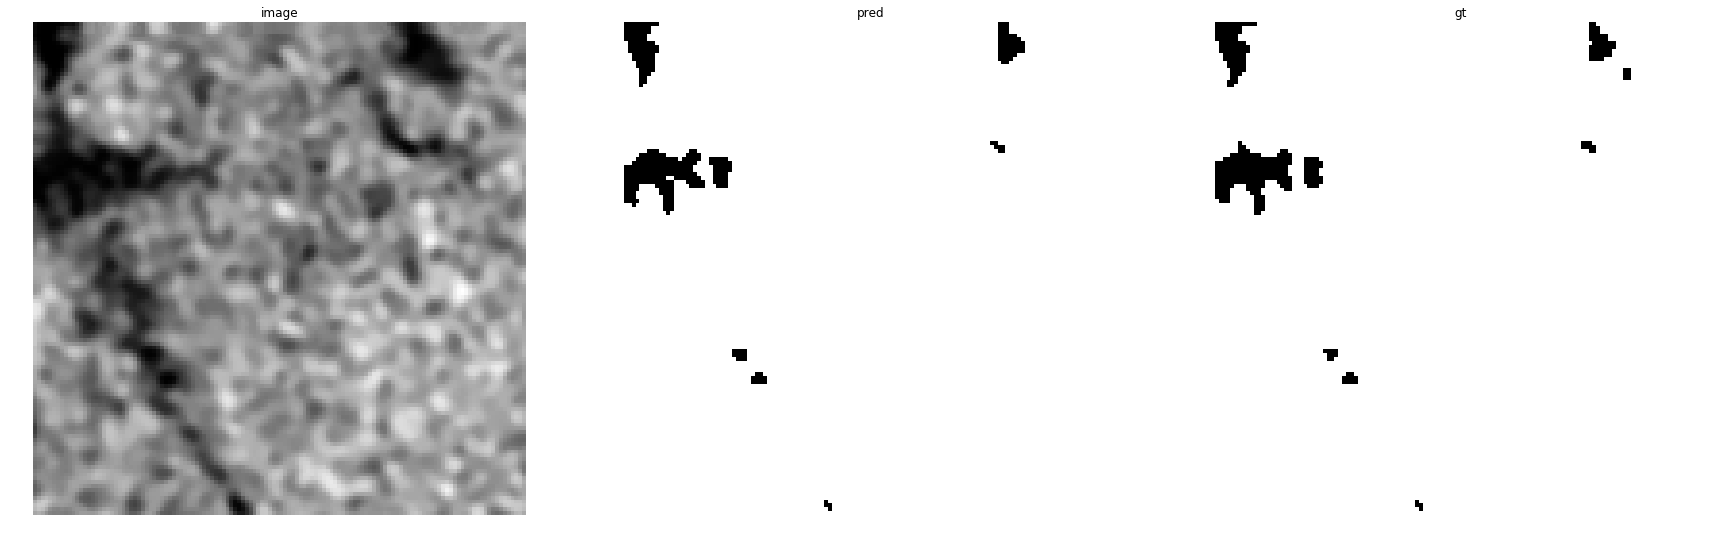

accuracy    : 0.996826171875
precision   : 0.997810173309141
recall      : 0.9989351706858753
f1          : 0.9983723550770003
pr_auc      : 0.9999920092218135
iou         : 0.99675


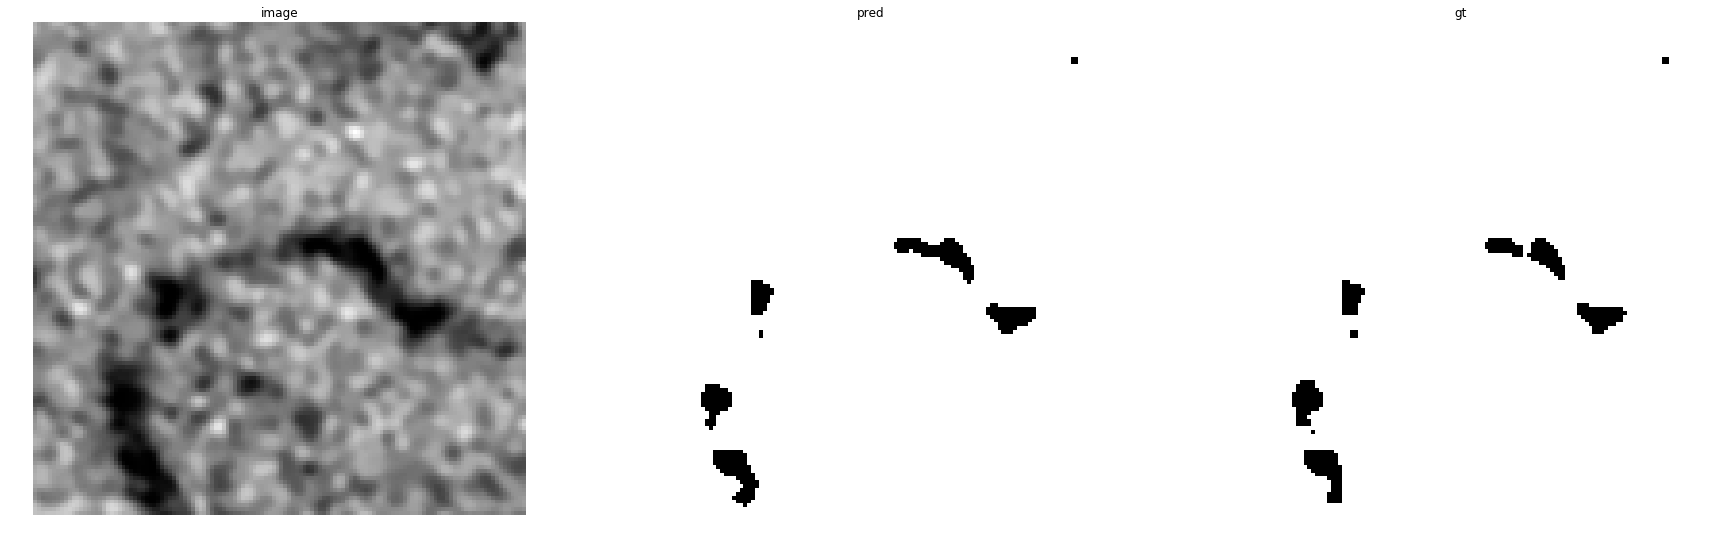

accuracy    : 0.997314453125
precision   : 0.9989385614385614
recall      : 0.9983152377386747
f1          : 0.9986268023219524
pr_auc      : 0.9999921630019509
iou         : 0.9972573708159321


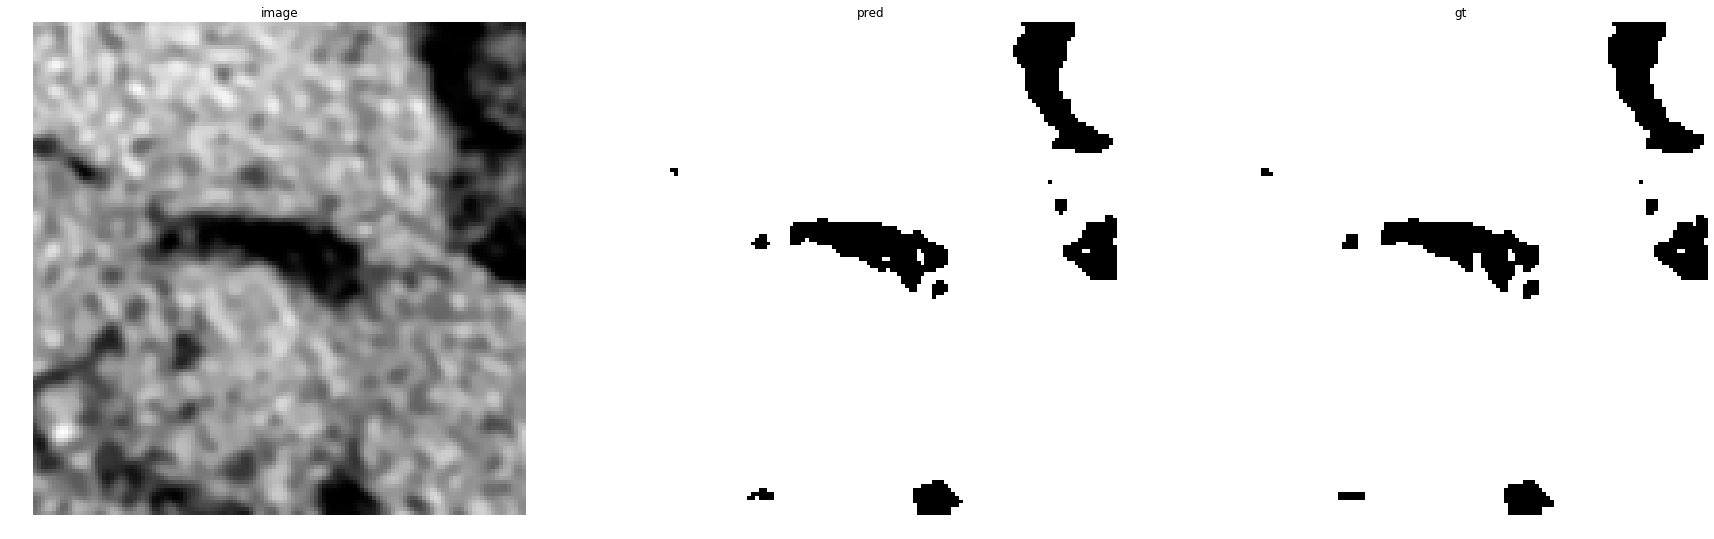

accuracy    : 0.99639892578125
precision   : 0.997914222396037
recall      : 0.9982395514116189
f1          : 0.9980768603931027
pr_auc      : 0.9999866605096165
iou         : 0.9961611035200729


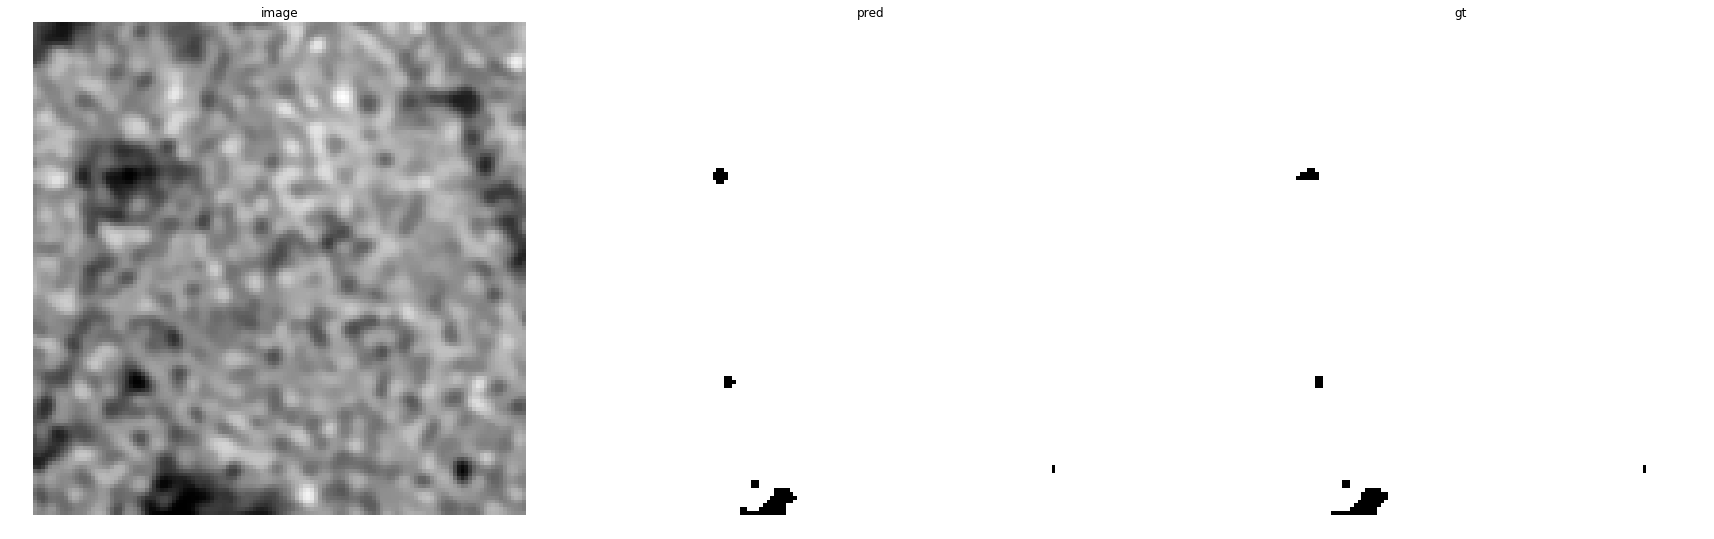

accuracy    : 0.99932861328125
precision   : 0.9996321049727145
recall      : 0.9996934020112828
f1          : 0.99966275255235
pr_auc      : 0.9999997180812538
iou         : 0.9993257324996935


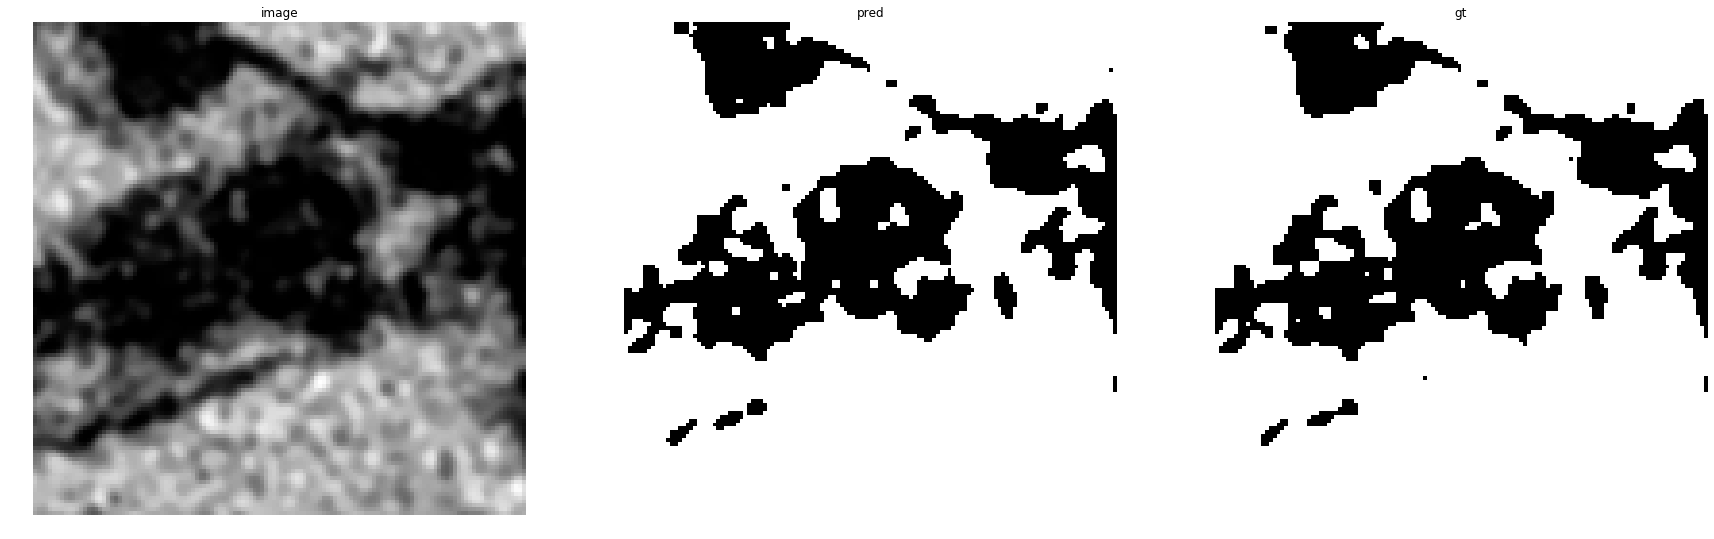

accuracy    : 0.9864501953125
precision   : 0.9906995884773663
recall      : 0.9910258521323893
f1          : 0.990862693447481
pr_auc      : 0.9997208210199754
iou         : 0.9818908556978546


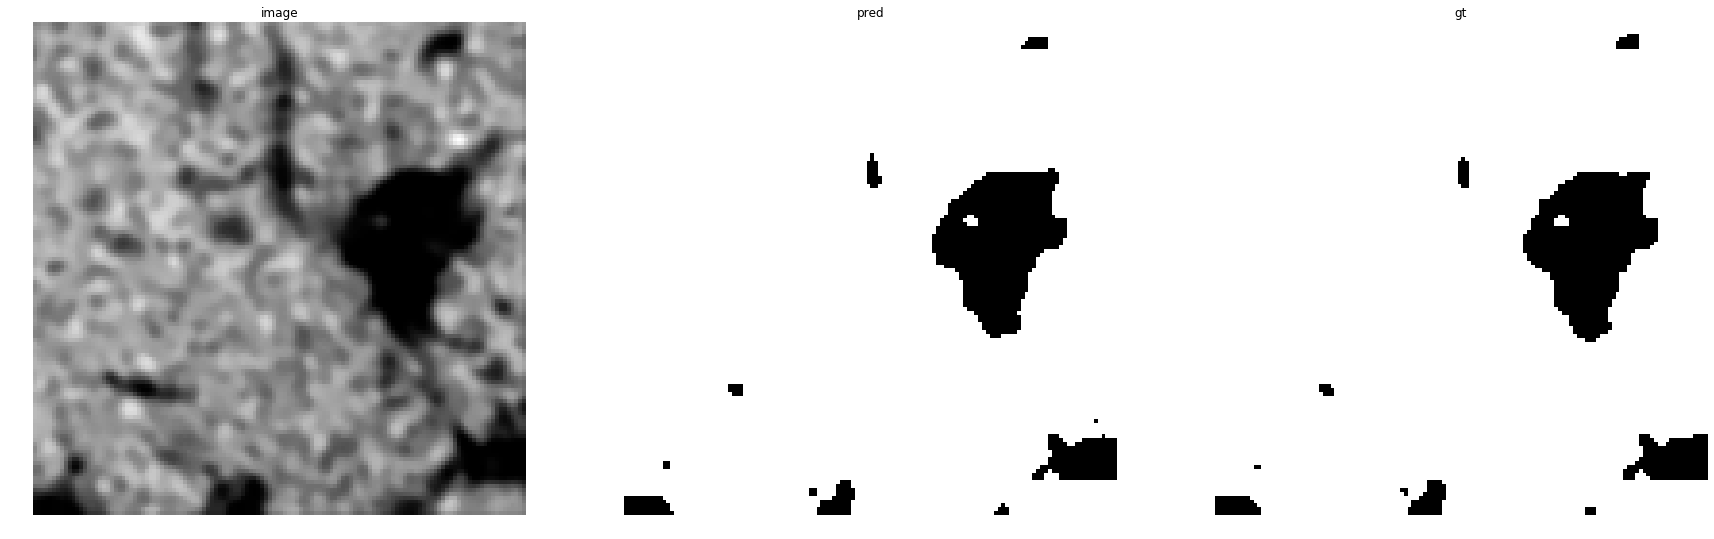

accuracy    : 0.99627685546875
precision   : 0.9978767168734656
recall      : 0.9980753915582692
f1          : 0.9979760443279472
pr_auc      : 0.9999904221364696
iou         : 0.9959602649006623


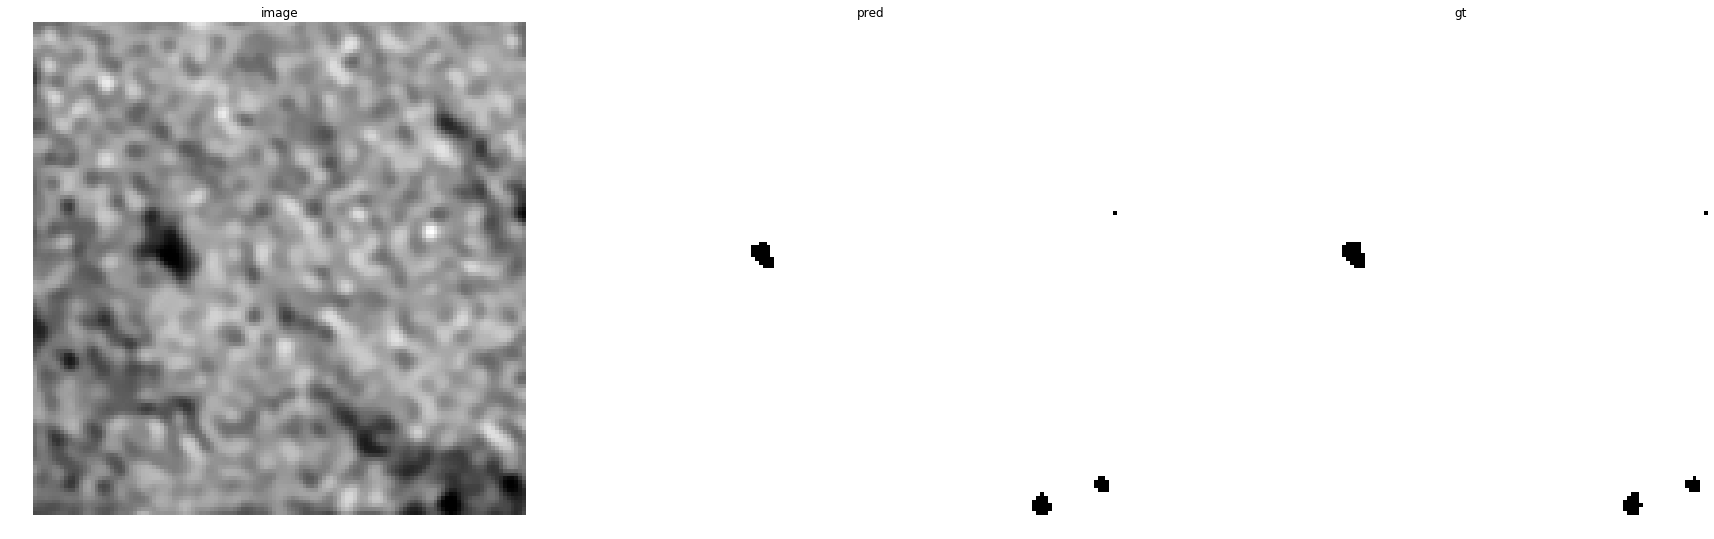

accuracy    : 0.9996337890625
precision   : 0.9997549019607843
recall      : 0.9998774359602892
f1          : 0.9998161652062013
pr_auc      : 0.9999998648581485
iou         : 0.9996323979904423


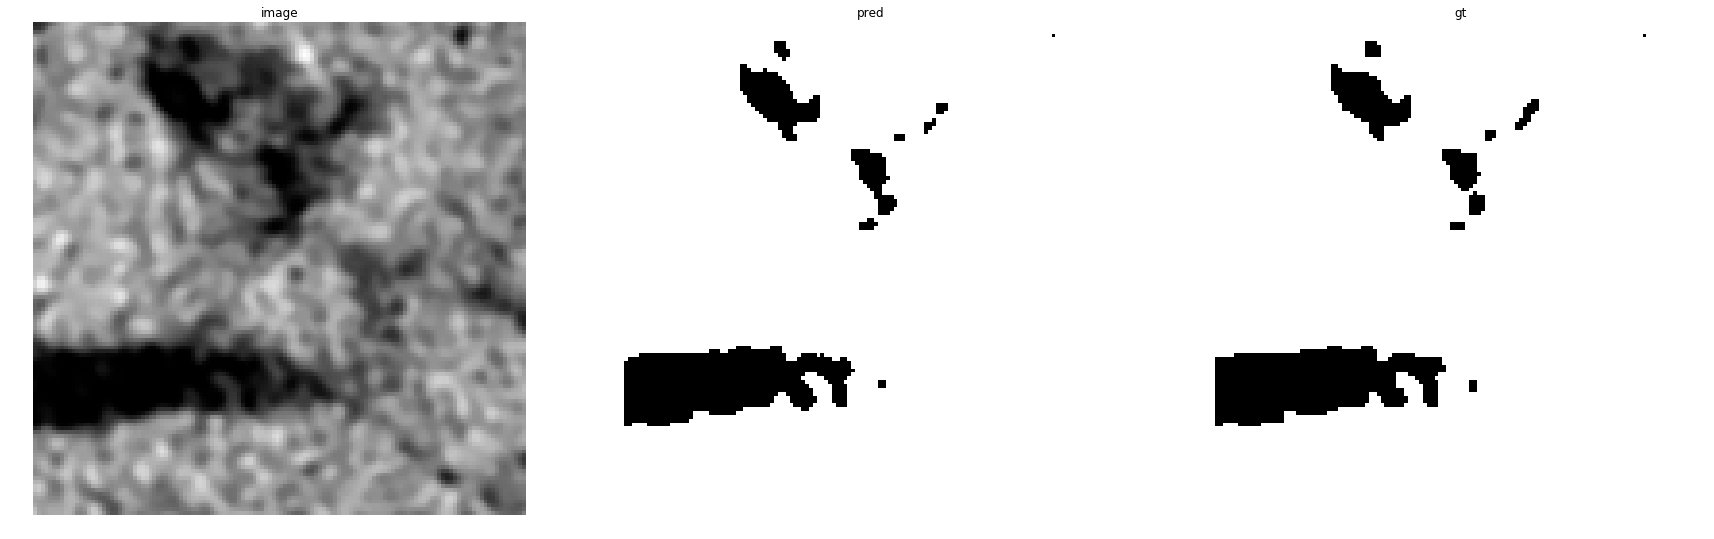

accuracy    : 0.99591064453125
precision   : 0.9970999209069338
recall      : 0.9984819483862452
f1          : 0.9977904560894371
pr_auc      : 0.9999875218528356
iou         : 0.9955906548206647


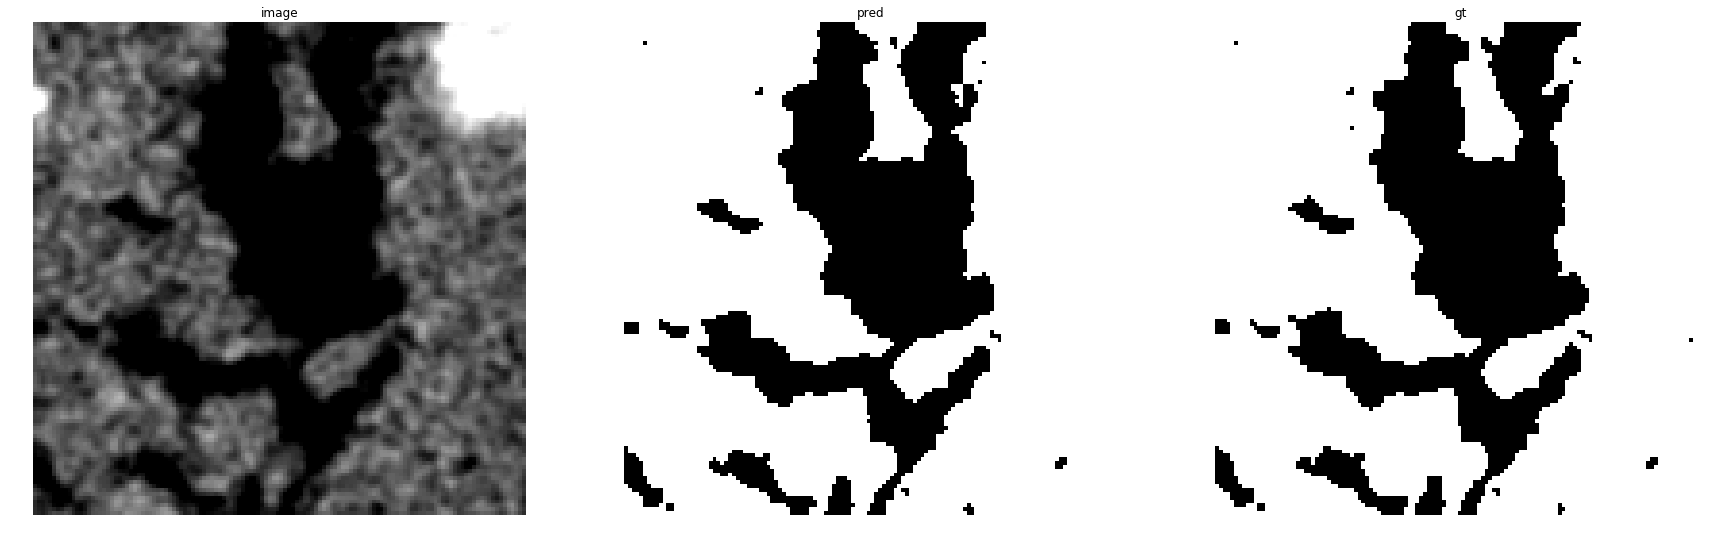

accuracy    : 0.98870849609375
precision   : 0.9868805882844489
recall      : 0.9976347355972293
f1          : 0.9922285234194497
pr_auc      : 0.9998717521599354
iou         : 0.9845769070446019


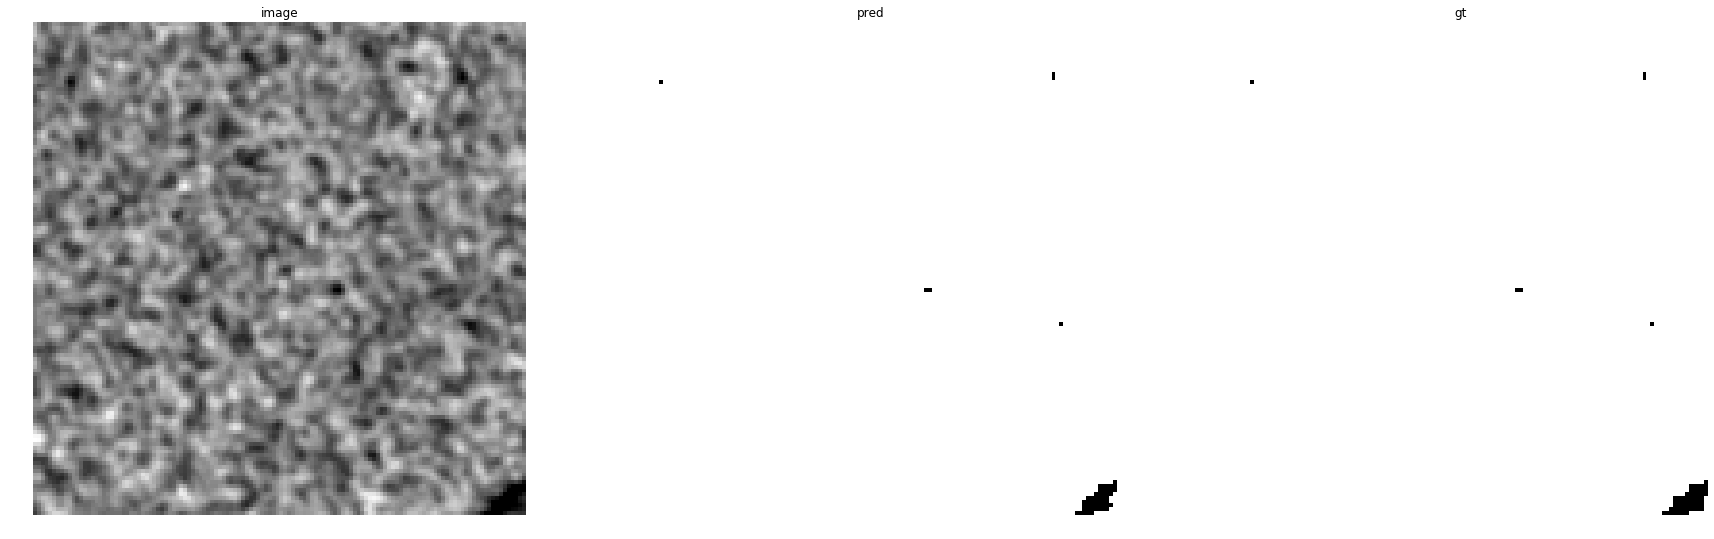

accuracy    : 0.99951171875
precision   : 0.9995100741012922
recall      : 1.0
f1          : 0.9997549770290965
pr_auc      : 0.9999999812320024
iou         : 0.9995100741012922


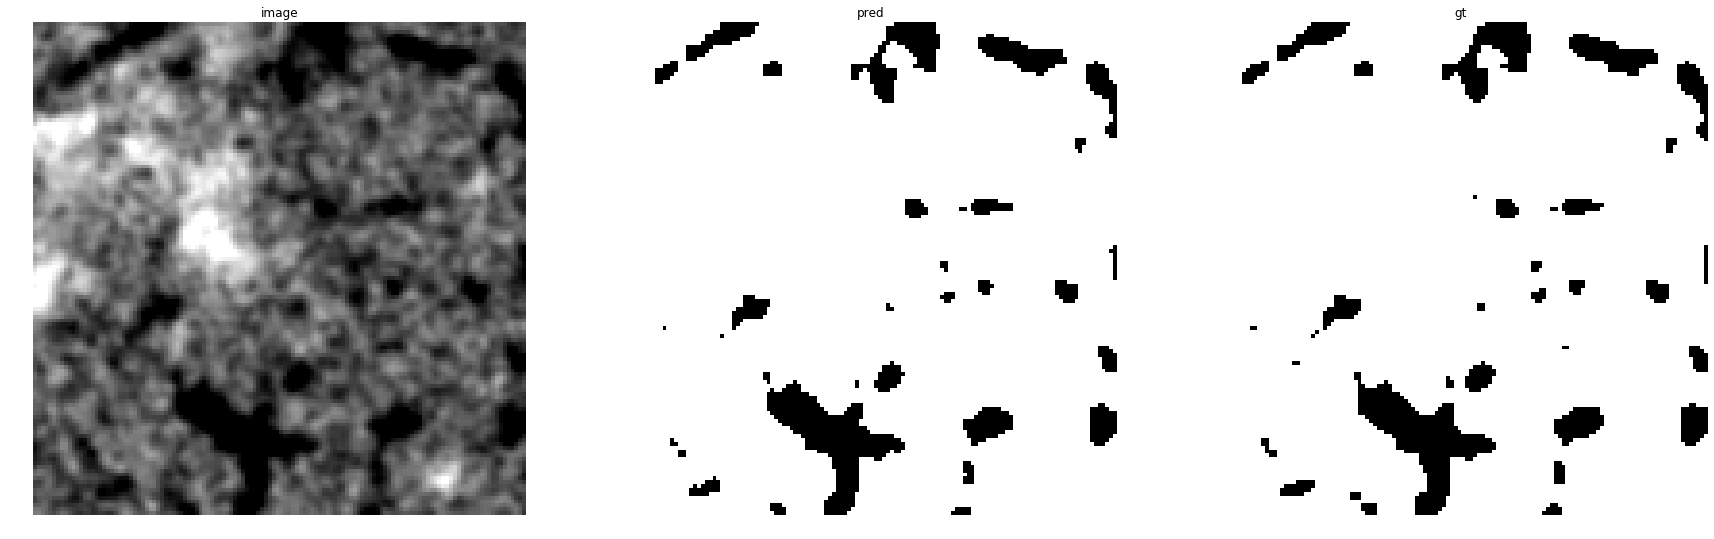

accuracy    : 0.99310302734375
precision   : 0.9929742388758782
recall      : 0.9994612068965517
f1          : 0.9962071627563521
pr_auc      : 0.9999598484460313
iou         : 0.992442988029158


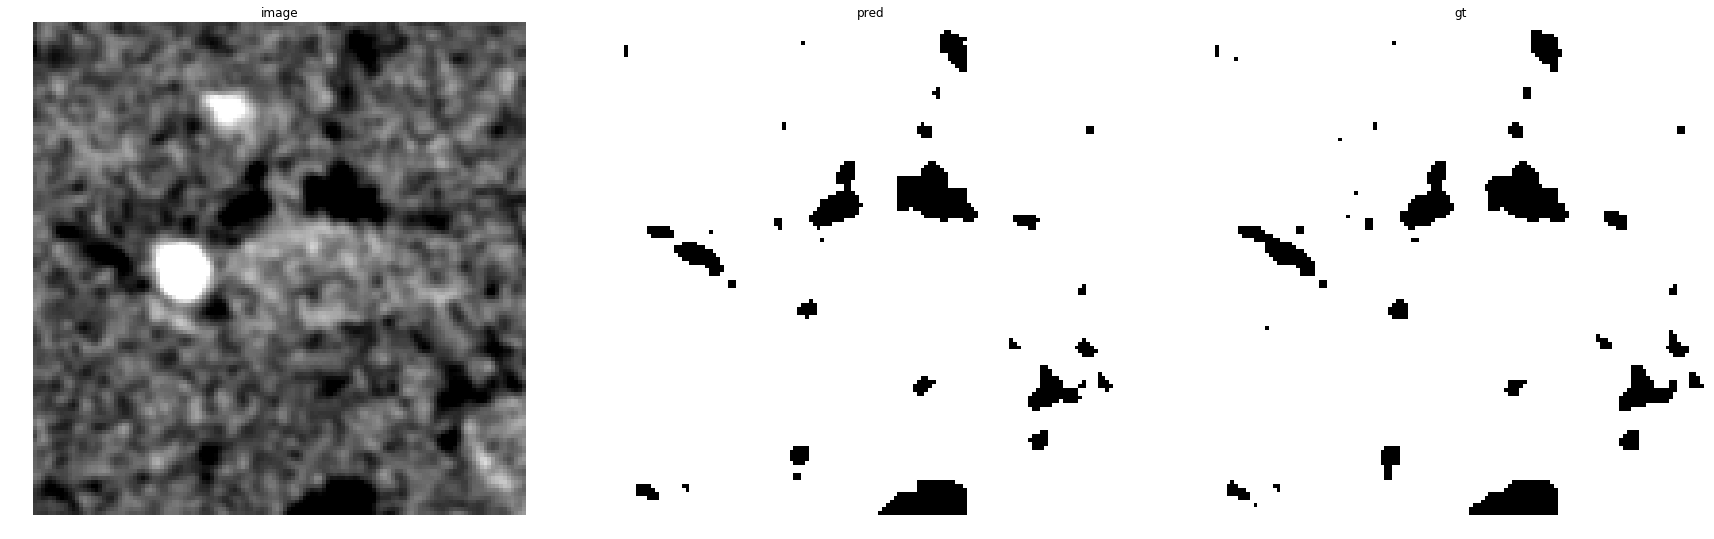

accuracy    : 0.99359130859375
precision   : 0.9938052526295412
recall      : 0.9994159636599611
f1          : 0.9966027113598861
pr_auc      : 0.9999747480124166
iou         : 0.9932284277054043


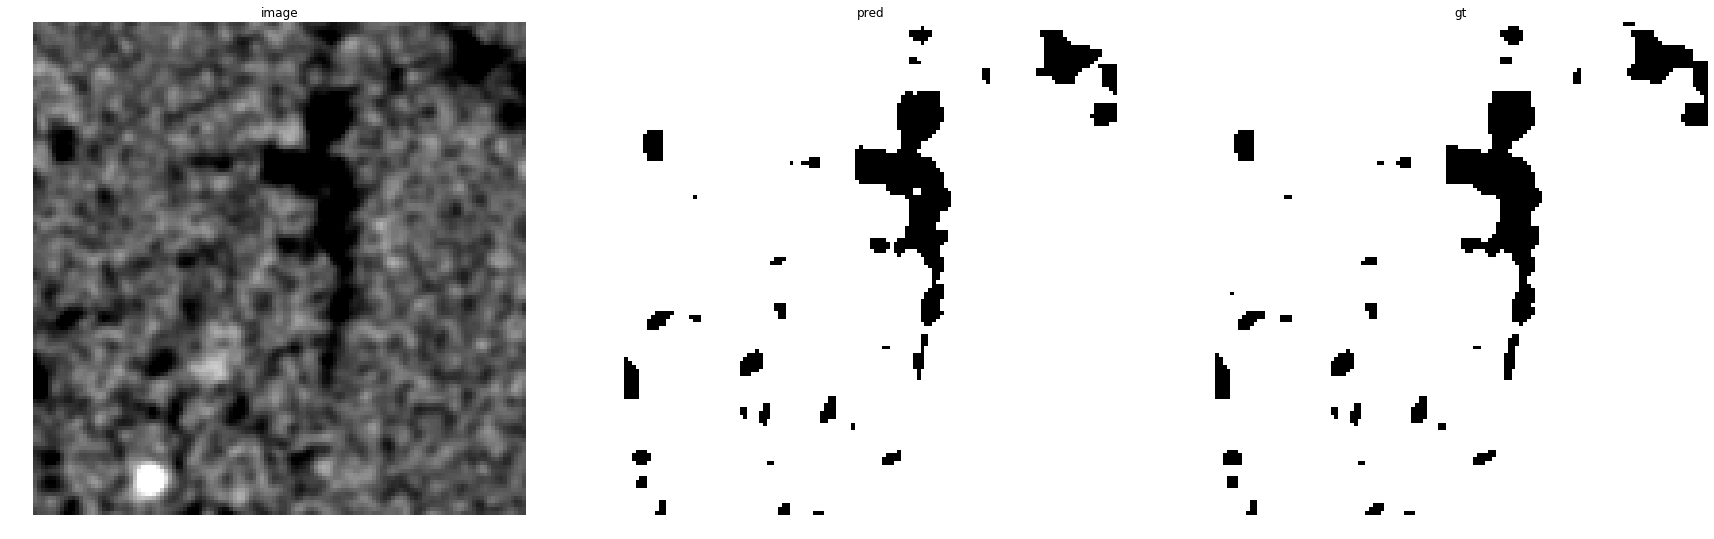

accuracy    : 0.9935302734375
precision   : 0.9937704918032787
recall      : 0.9992746933931161
f1          : 0.9965149921094161
pr_auc      : 0.9999757761450969
iou         : 0.9930541904200249


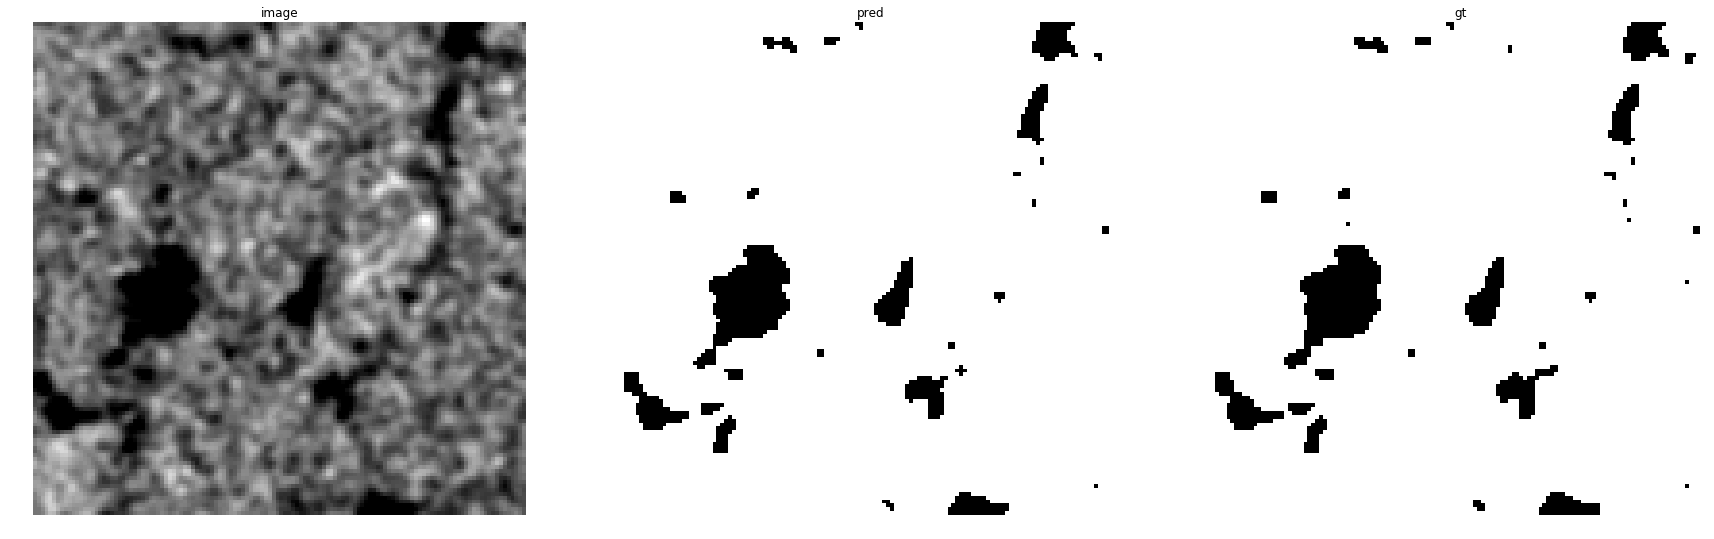

accuracy    : 0.99505615234375
precision   : 0.99485174323884
recall      : 0.999869007073618
f1          : 0.99735406526639
pr_auc      : 0.9999847624321302
iou         : 0.9947220955235551


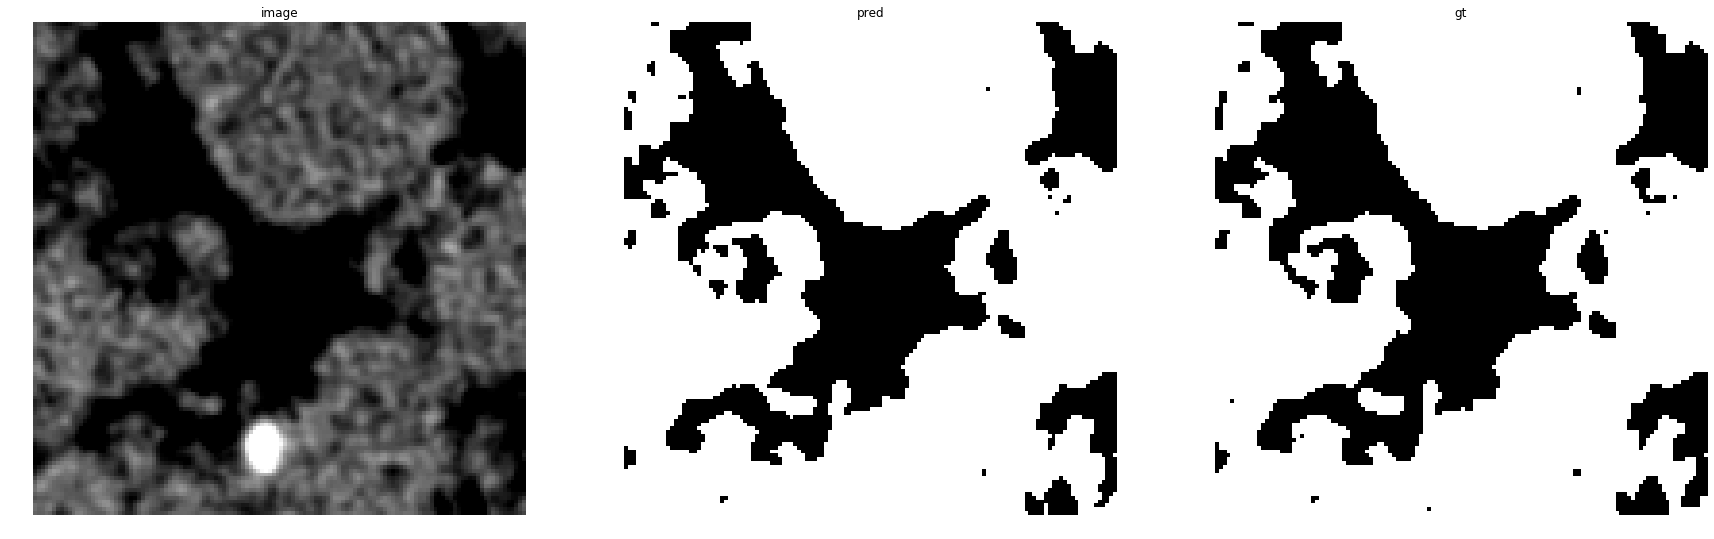

accuracy    : 0.98162841796875
precision   : 0.9748405695815497
recall      : 0.9988363766559255
f1          : 0.9866926035633758
pr_auc      : 0.9997004855322431
iou         : 0.9737347294938918


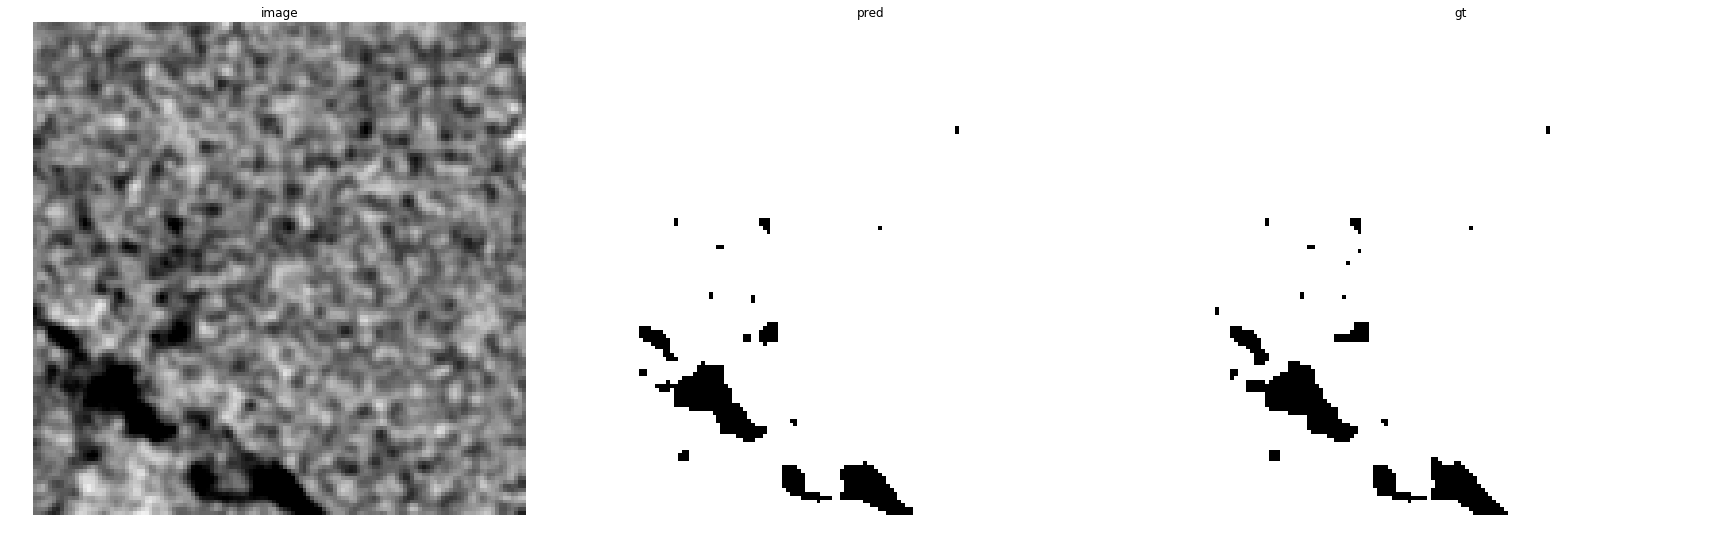

accuracy    : 0.996337890625
precision   : 0.996467991169978
recall      : 0.9997468835031323
f1          : 0.9981047444563775
pr_auc      : 0.9999908365735655
iou         : 0.9962166593101709


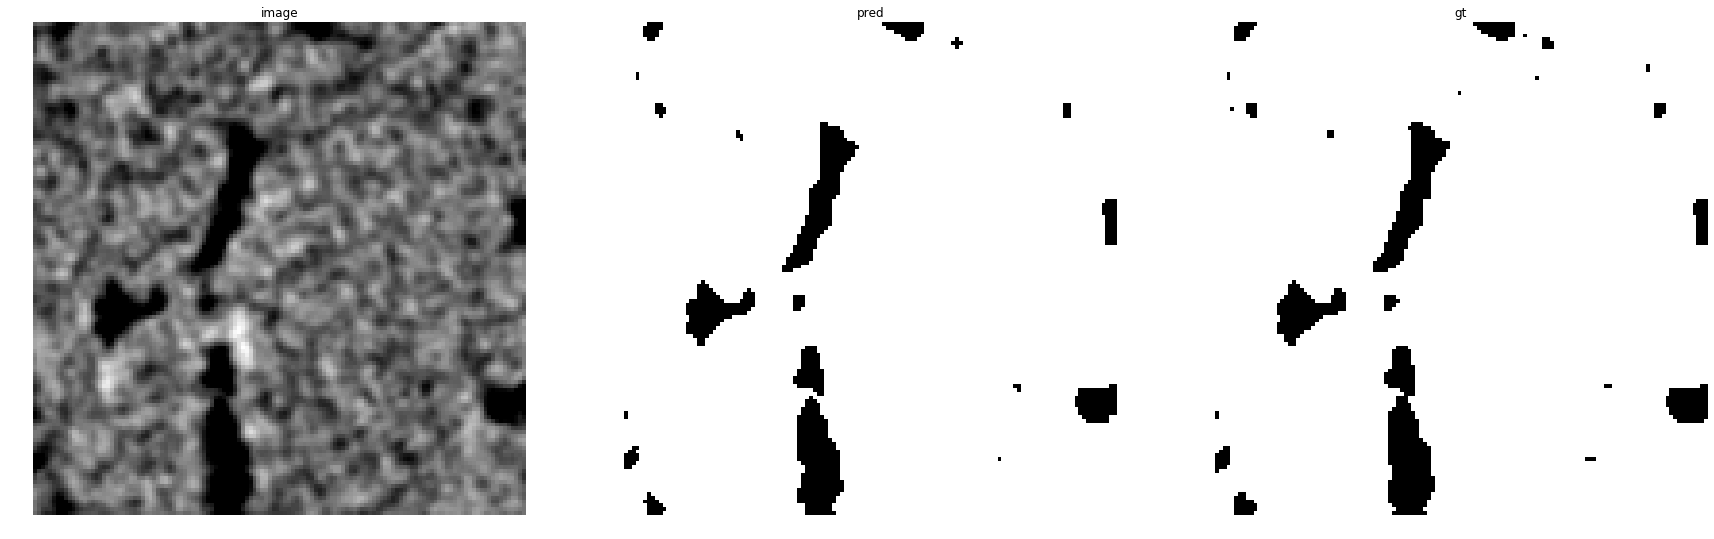

accuracy    : 0.9951171875
precision   : 0.9949993505650084
recall      : 0.999804228660924
f1          : 0.9973960028643968
pr_auc      : 0.9999924888630262
iou         : 0.9948055321083047


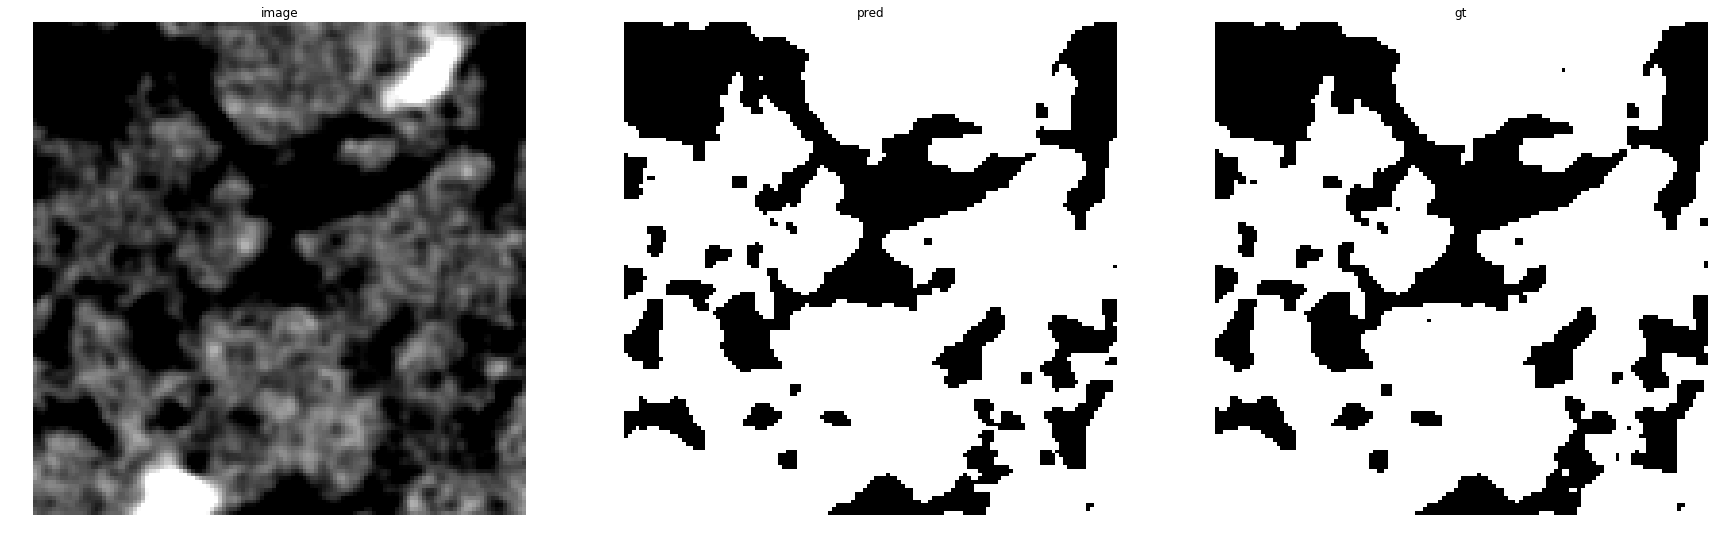

accuracy    : 0.9788818359375
precision   : 0.9713603818615751
recall      : 0.998001998001998
f1          : 0.9845009854864719
pr_auc      : 0.999600394756426
iou         : 0.9694750771945302


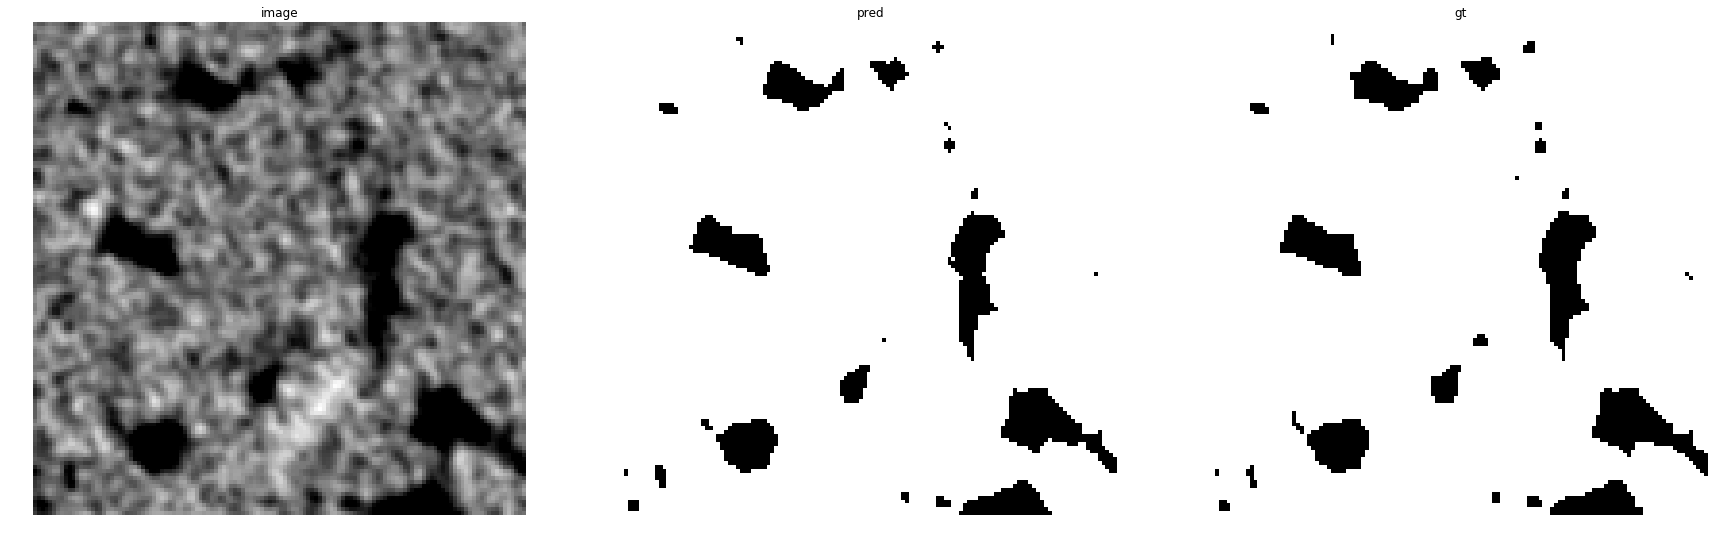

accuracy    : 0.9918212890625
precision   : 0.9918174560936669
recall      : 0.9992627345844504
f1          : 0.9955261752136753
pr_auc      : 0.9999680094055164
iou         : 0.991092202353254


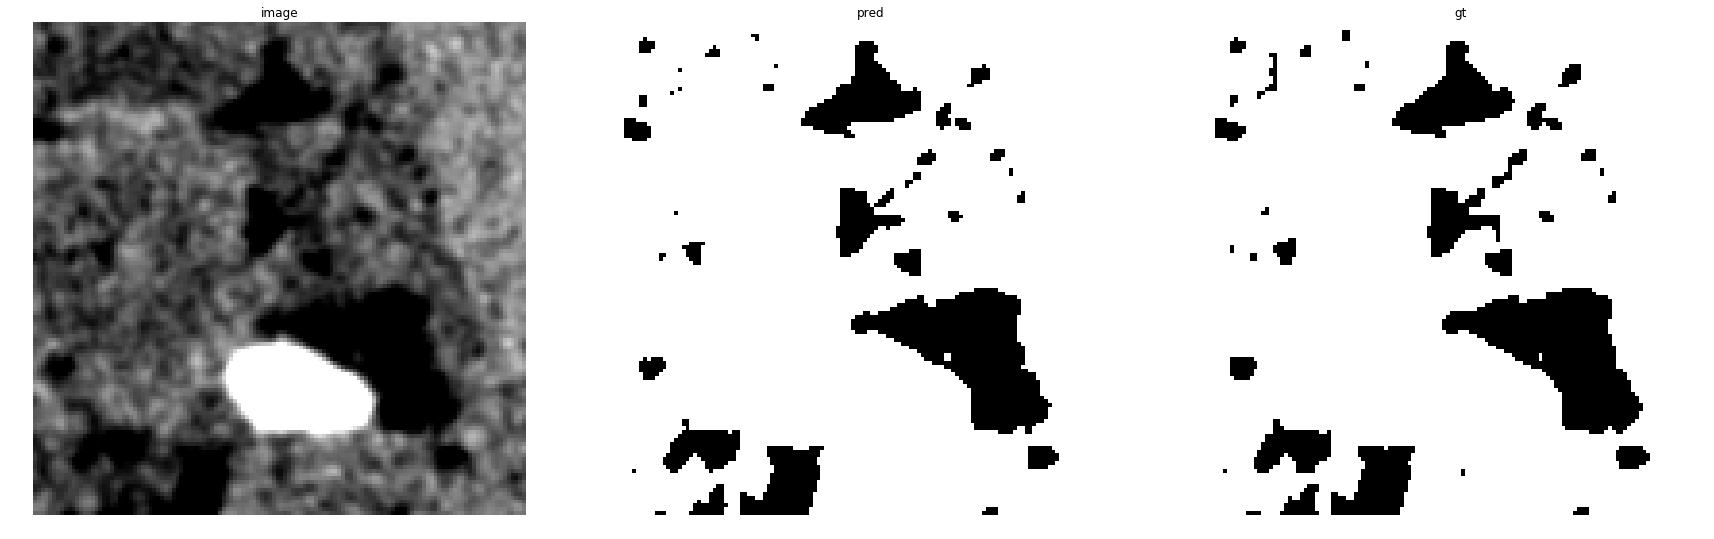

accuracy    : 0.9896240234375
precision   : 0.9885512367491166
recall      : 0.9994284081166047
f1          : 0.99396006537341
pr_auc      : 0.999926730318898
iou         : 0.9879926543297076


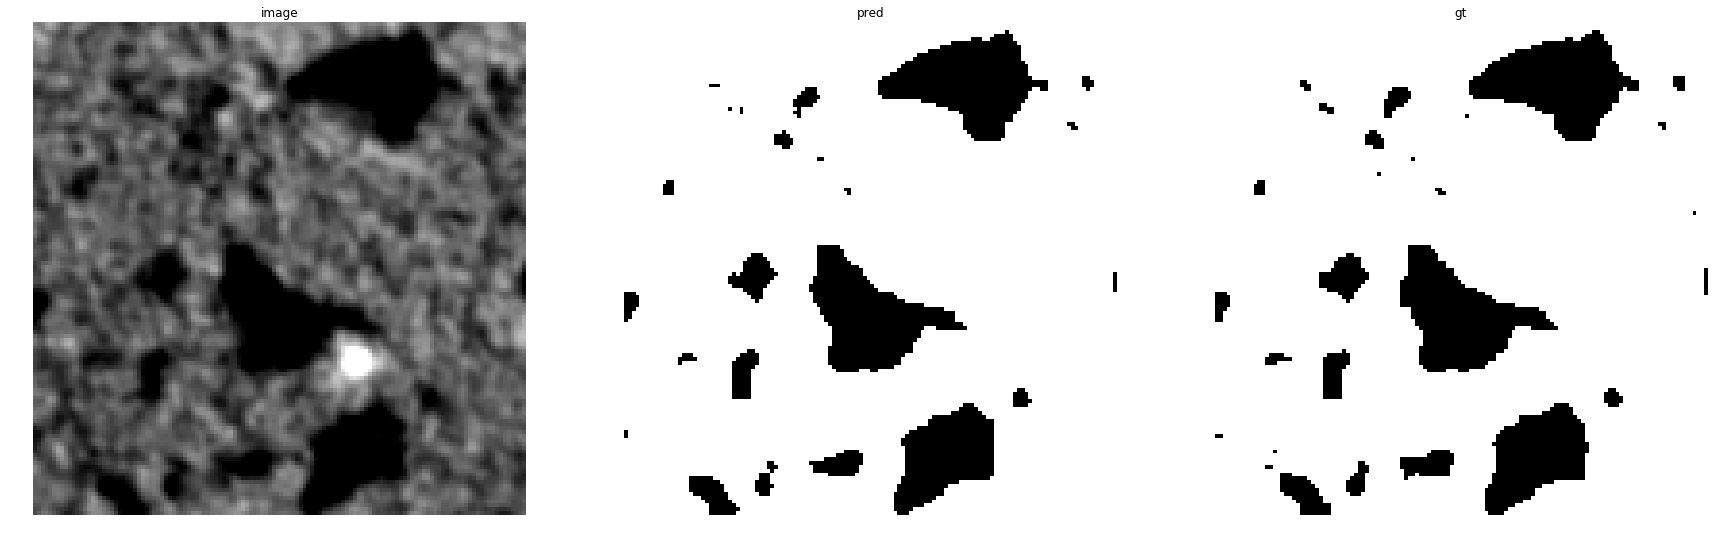

accuracy    : 0.9913330078125
precision   : 0.9910133031418058
recall      : 0.9989300998573466
f1          : 0.994955953395851
pr_auc      : 0.9999618061806496
iou         : 0.9899625362267619


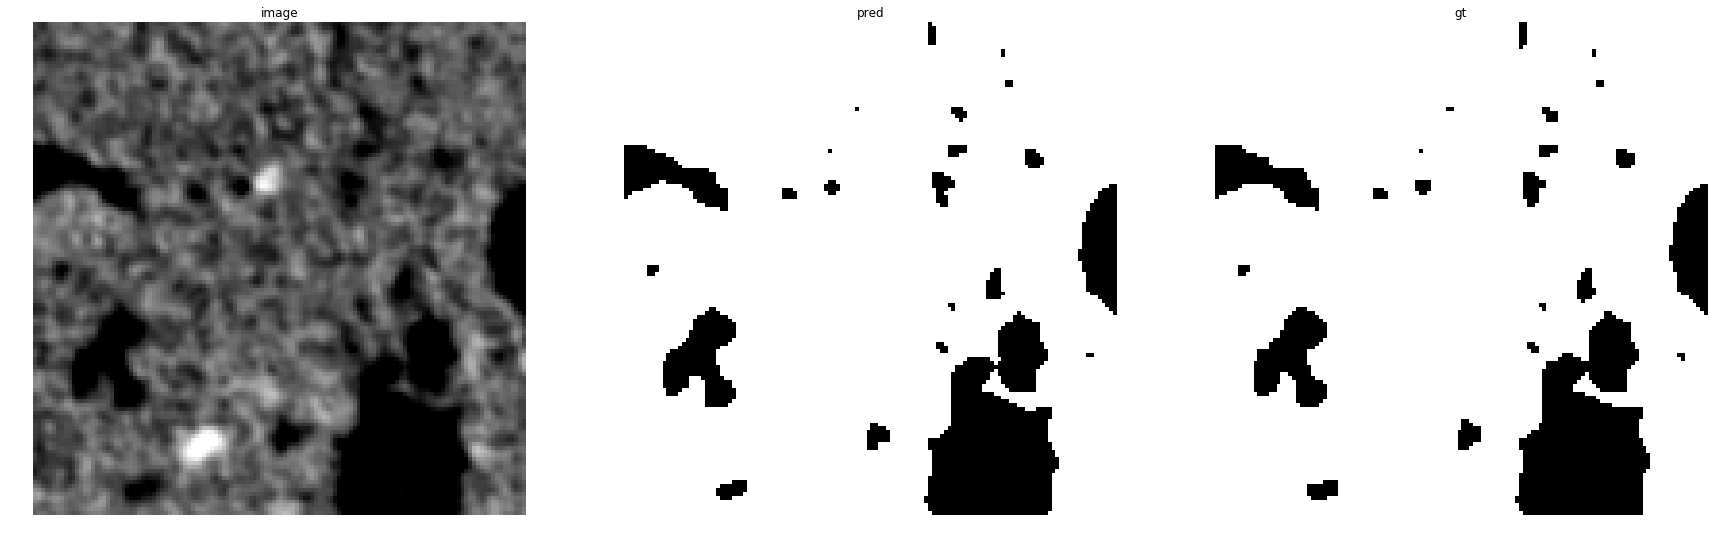

accuracy    : 0.99517822265625
precision   : 0.99500633000422
recall      : 0.9994348286824444
f1          : 0.9972156627779931
pr_auc      : 0.9999815991576674
iou         : 0.9944467875720512


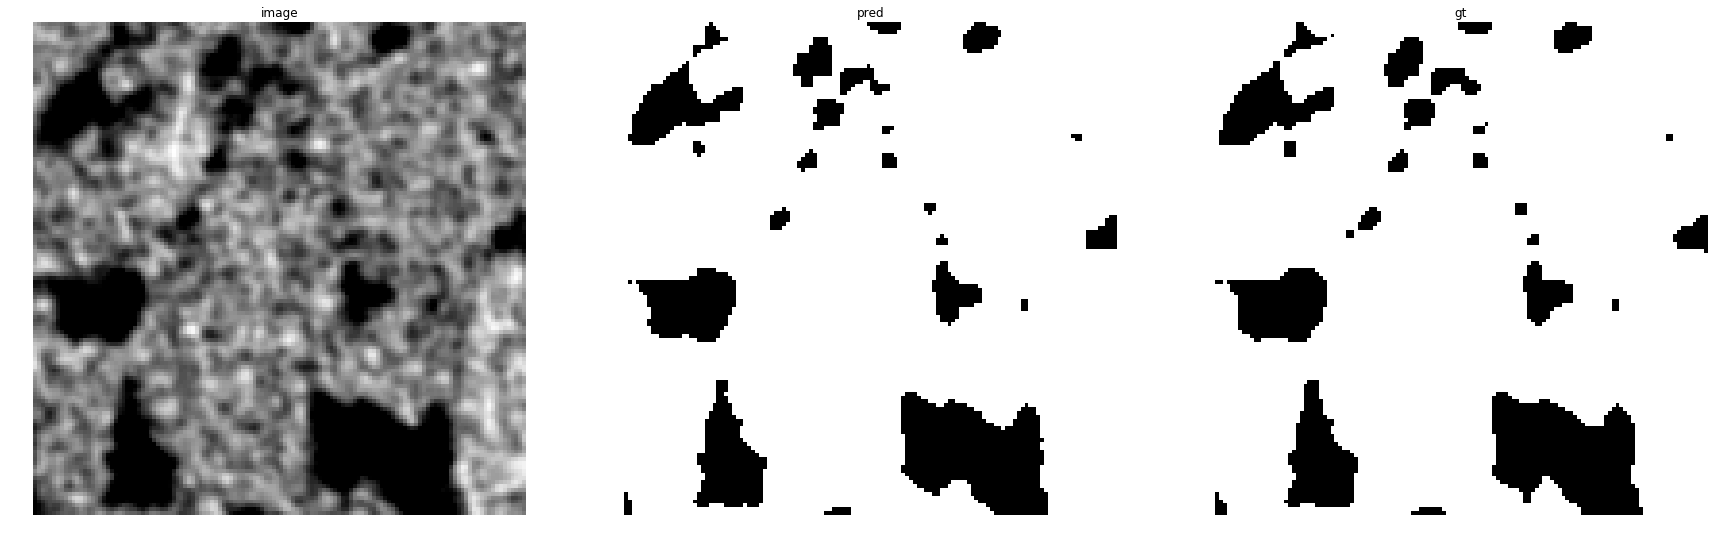

accuracy    : 0.989990234375
precision   : 0.989310567472559
recall      : 0.9989134371604491
f1          : 0.9940888119953865
pr_auc      : 0.9999504385490589
iou         : 0.988247097606421


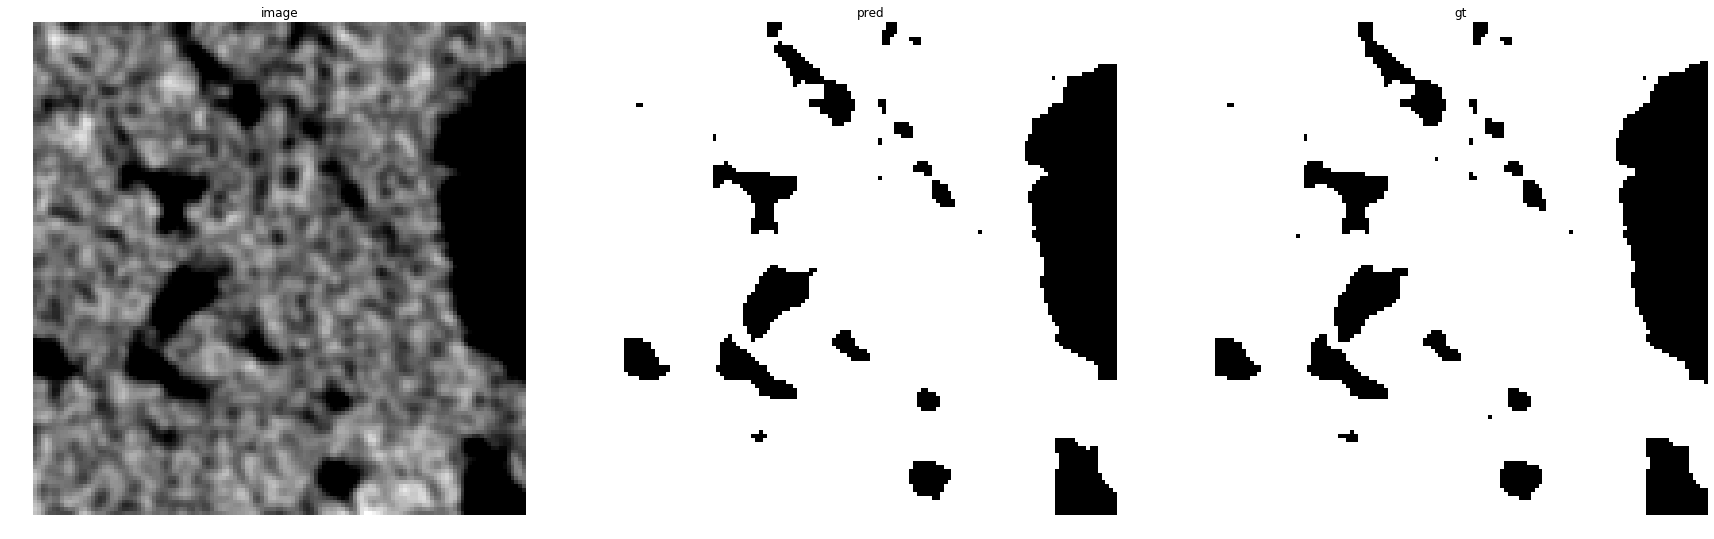

accuracy    : 0.99334716796875
precision   : 0.9926018165836508
recall      : 0.9994099859871672
f1          : 0.9959942670243652
pr_auc      : 0.999970366137807
iou         : 0.9920204978038067


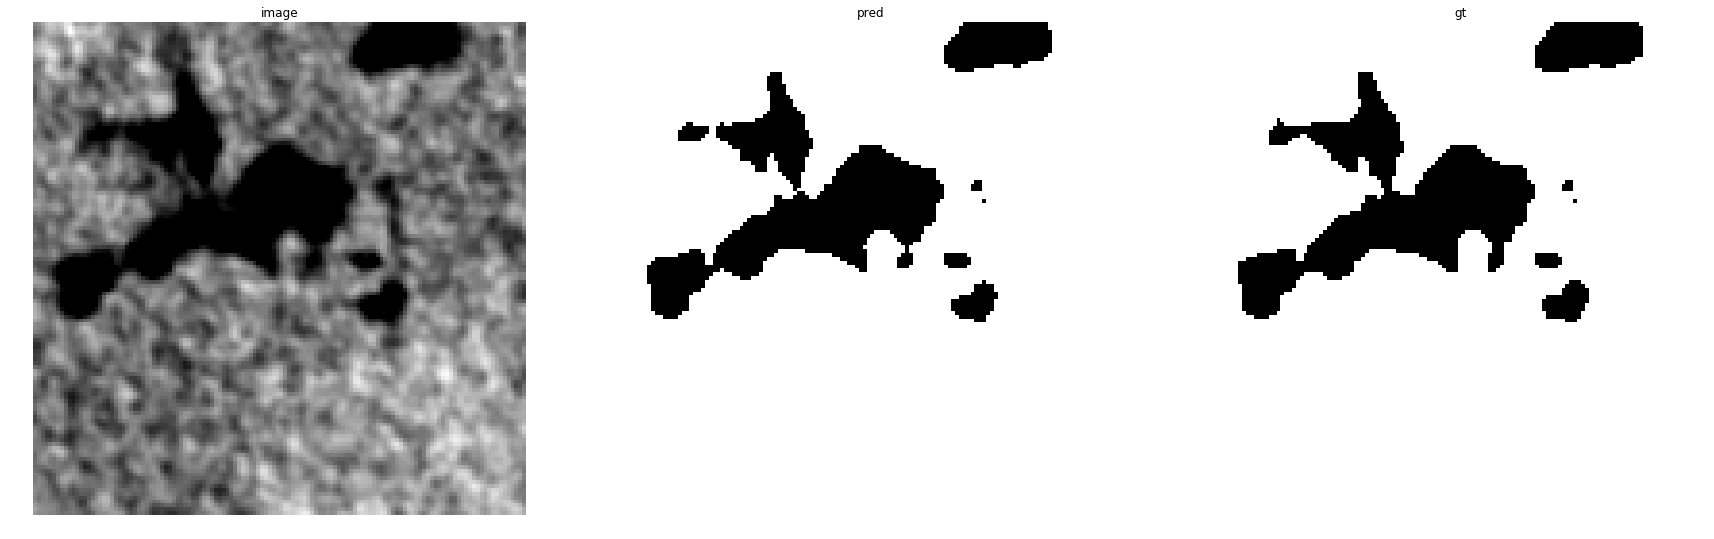

accuracy    : 0.993896484375
precision   : 0.9932408891366455
recall      : 0.9997895770498703
f1          : 0.9965044742729308
pr_auc      : 0.9999883425001913
iou         : 0.9930333008220705


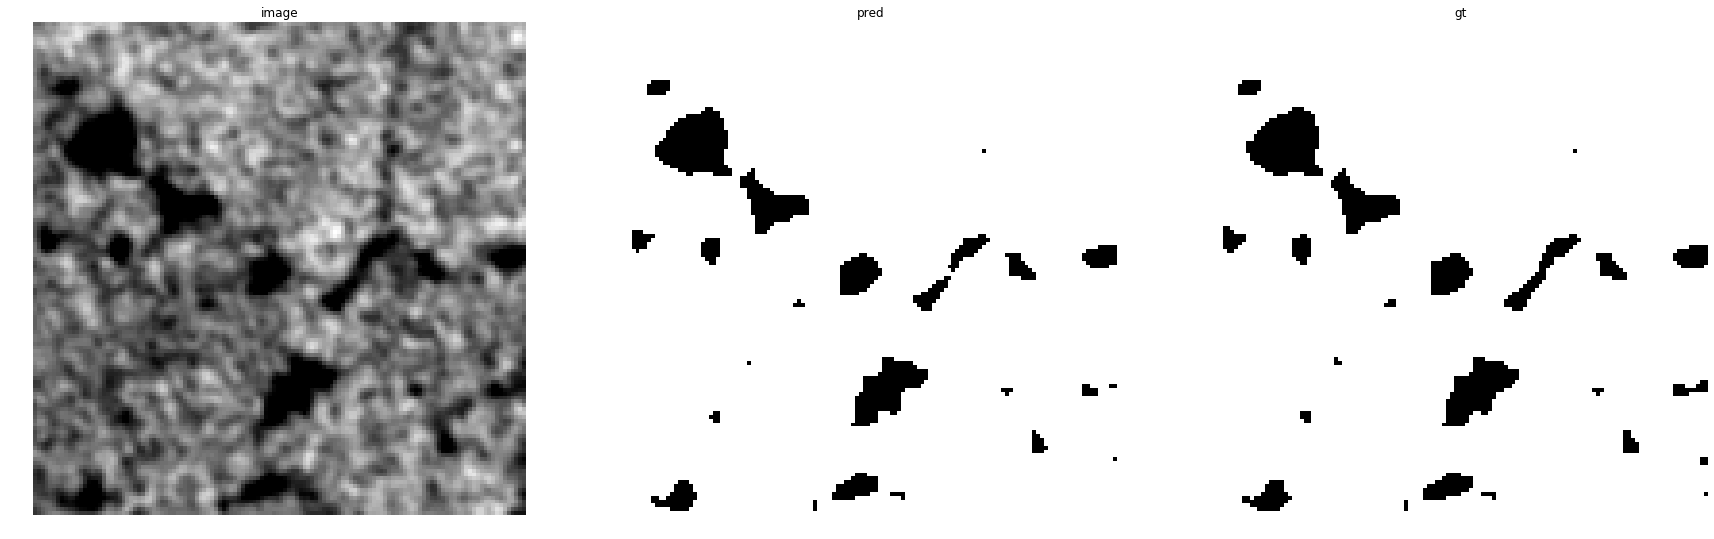

accuracy    : 0.99517822265625
precision   : 0.995171918836041
recall      : 0.9996723030541356
f1          : 0.9974170344940331
pr_auc      : 0.9999870534252174
iou         : 0.9948473780328724


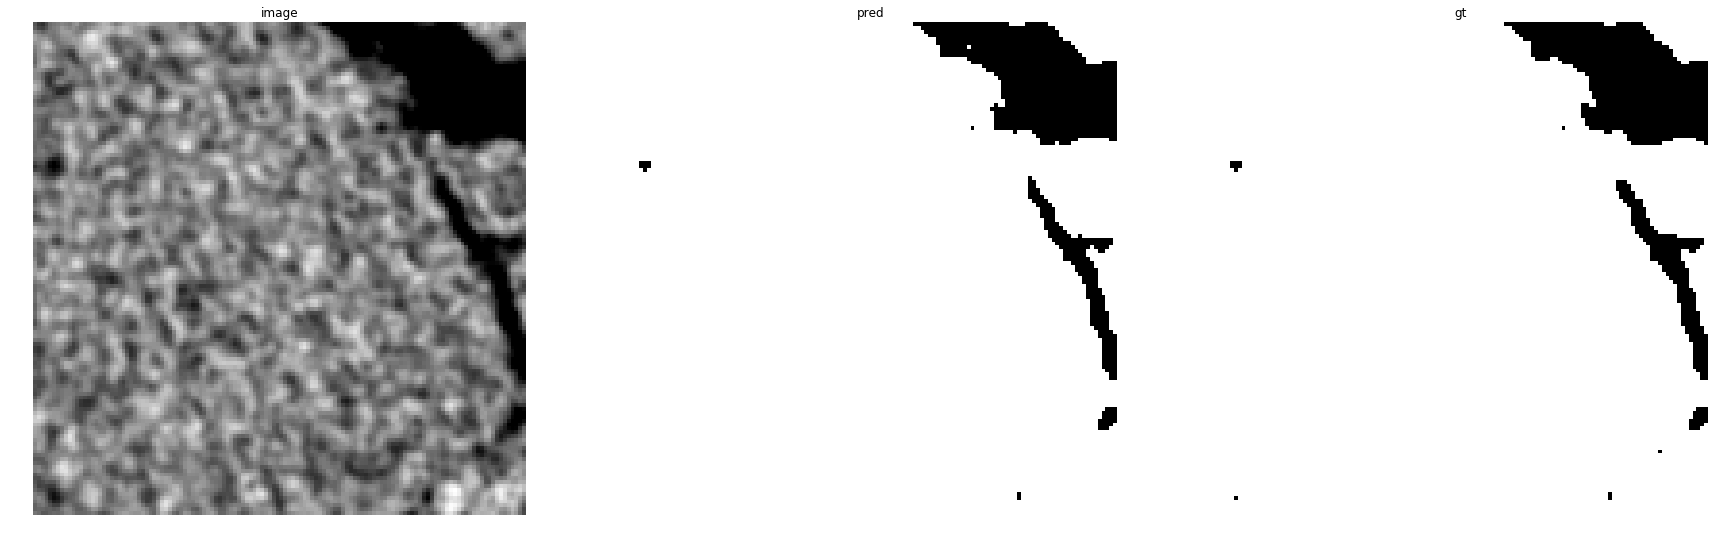

accuracy    : 0.99639892578125
precision   : 0.9962977654369959
recall      : 0.9998009686193856
f1          : 0.9980462929236068
pr_auc      : 0.9999962299872174
iou         : 0.996100204904488


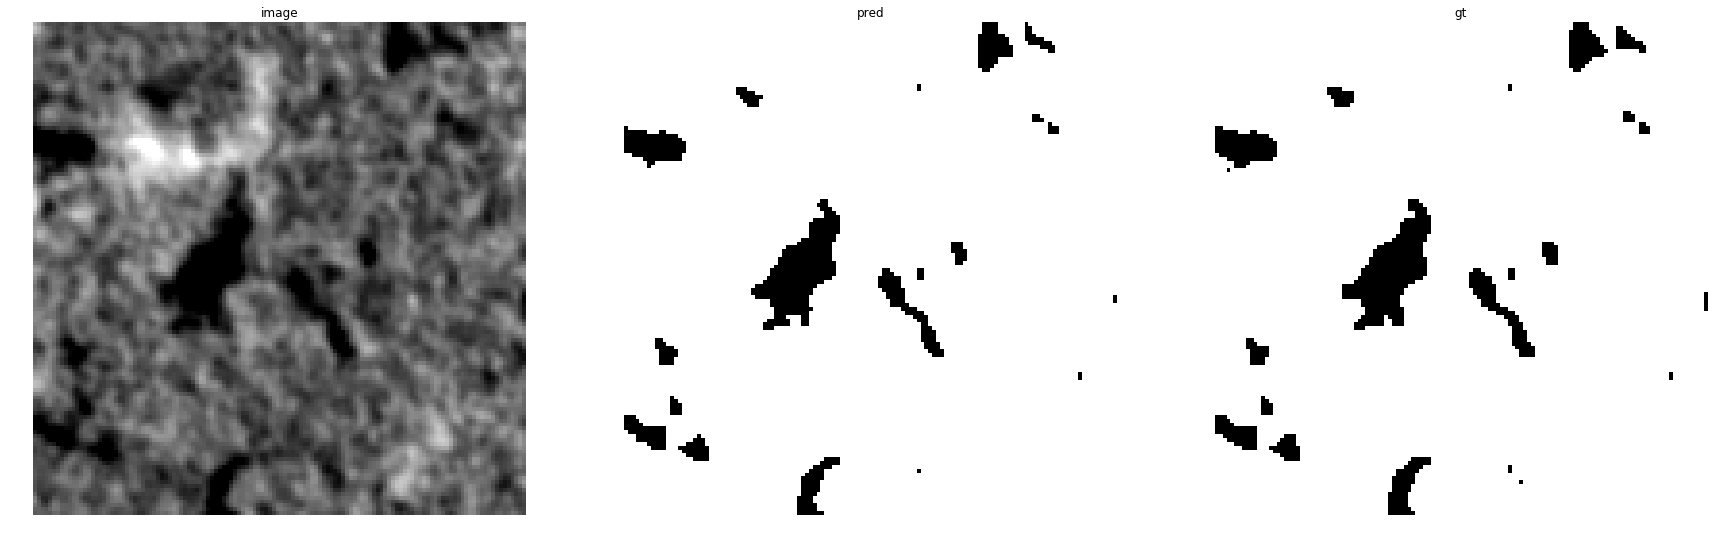

accuracy    : 0.994873046875
precision   : 0.9946949602122016
recall      : 0.999869935618131
f1          : 0.9972757345787118
pr_auc      : 0.9999856380627362
iou         : 0.9945662720745198


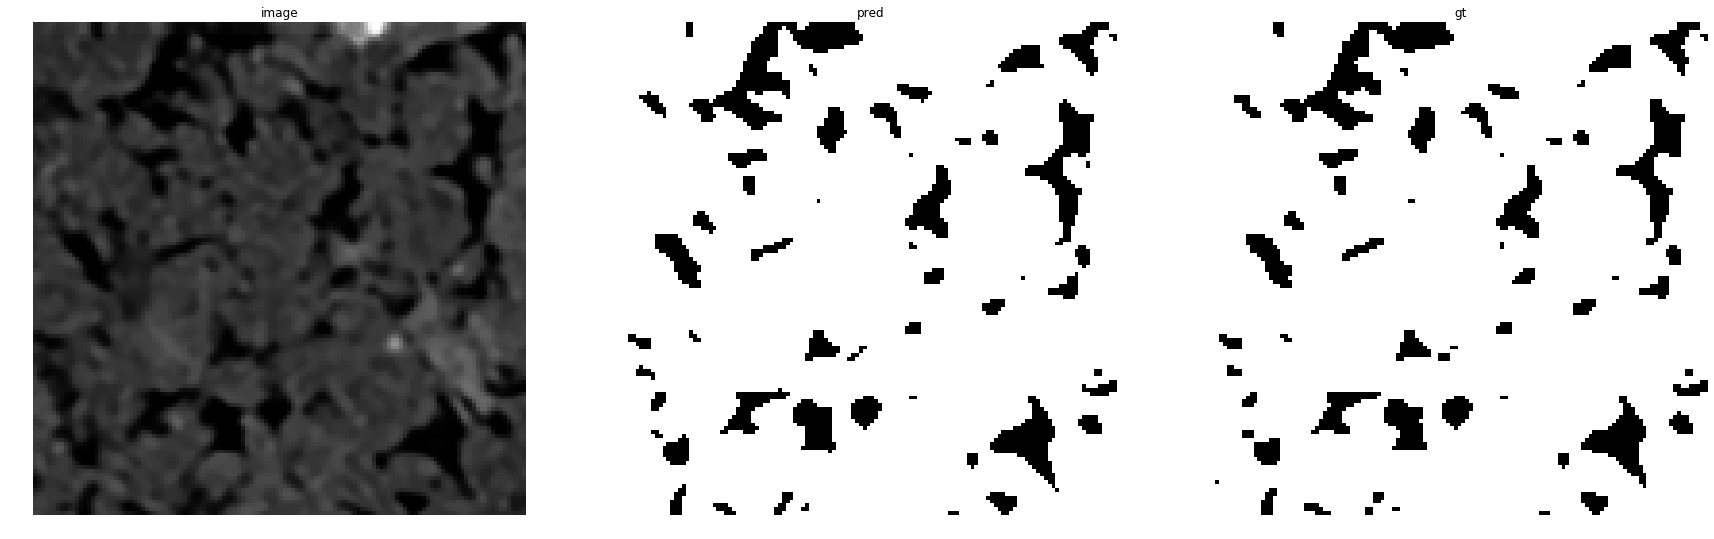

accuracy    : 0.9923095703125
precision   : 0.996597694764616
recall      : 0.9946638946638947
f1          : 0.9956298557158714
pr_auc      : 0.9999437657563011
iou         : 0.9912977415567373


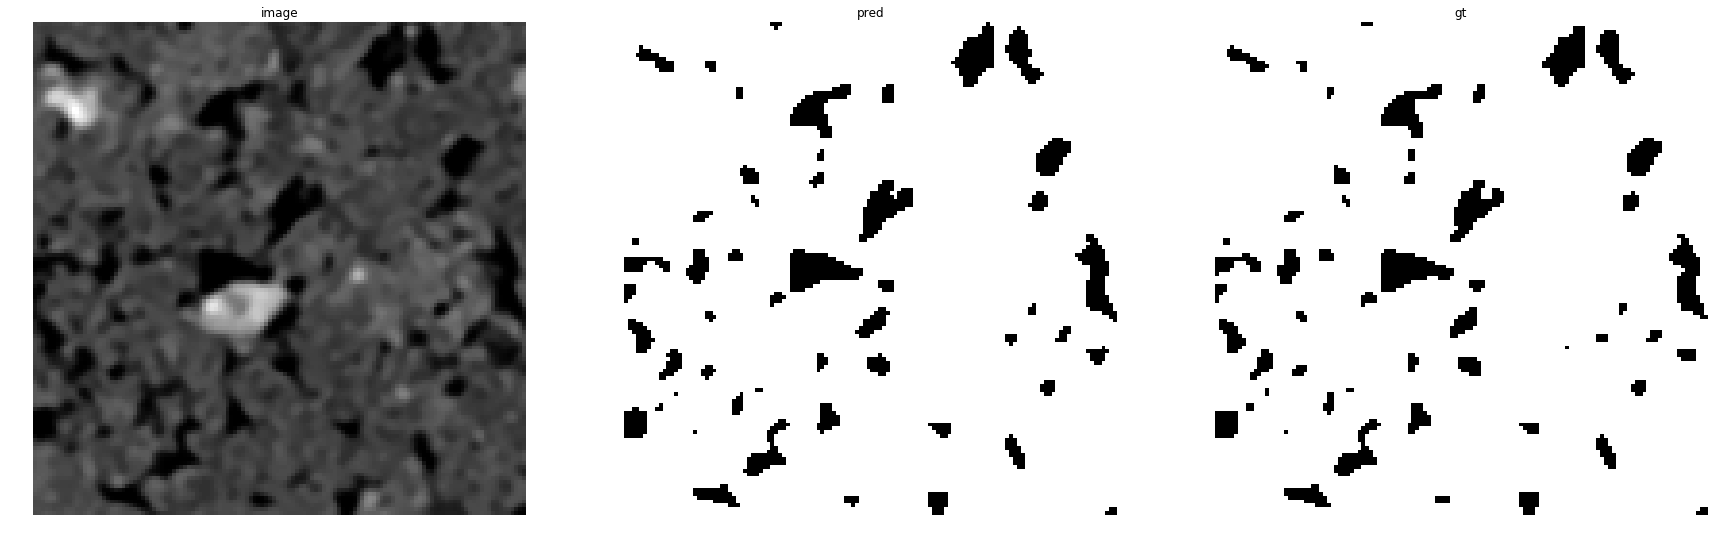

accuracy    : 0.99322509765625
precision   : 0.9975943869027731
recall      : 0.9950013329778725
f1          : 0.9962961727118022
pr_auc      : 0.9999612605169956
iou         : 0.9926196808510638


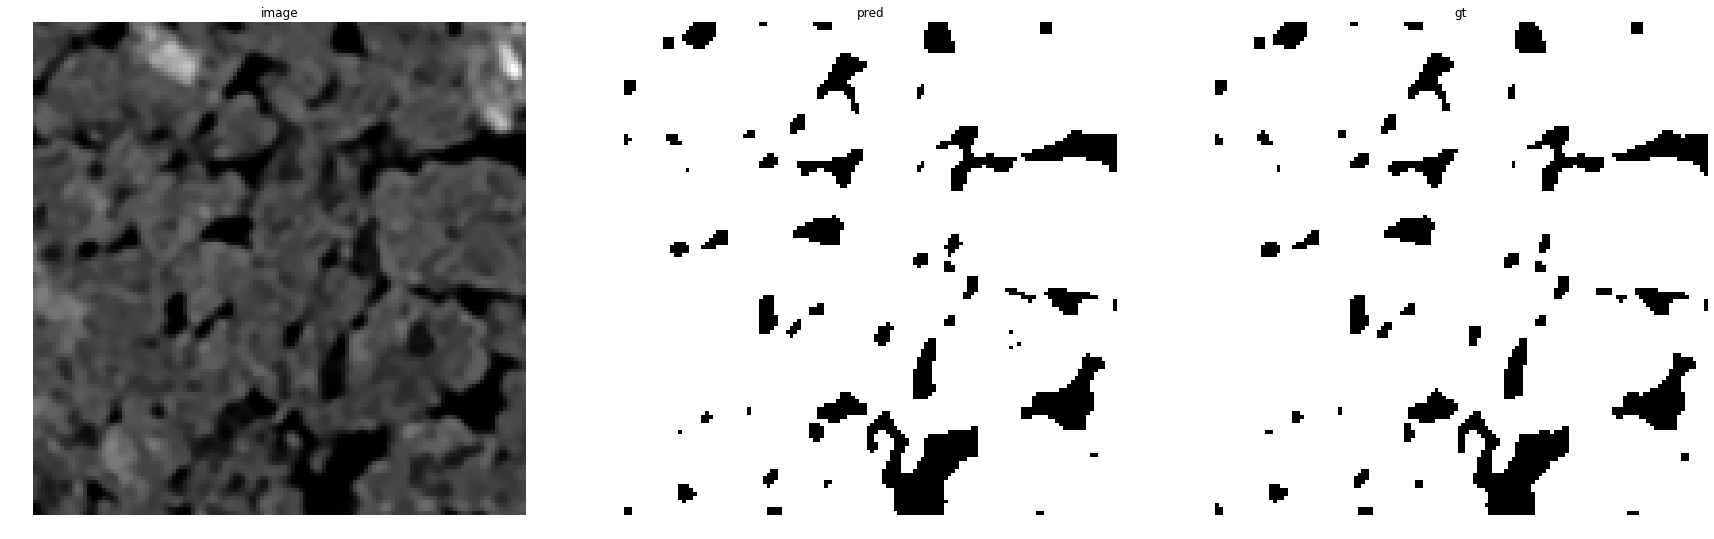

accuracy    : 0.99334716796875
precision   : 0.9971403281813849
recall      : 0.9954458945078847
f1          : 0.9962923908976496
pr_auc      : 0.9999536190018747
iou         : 0.992612172970042


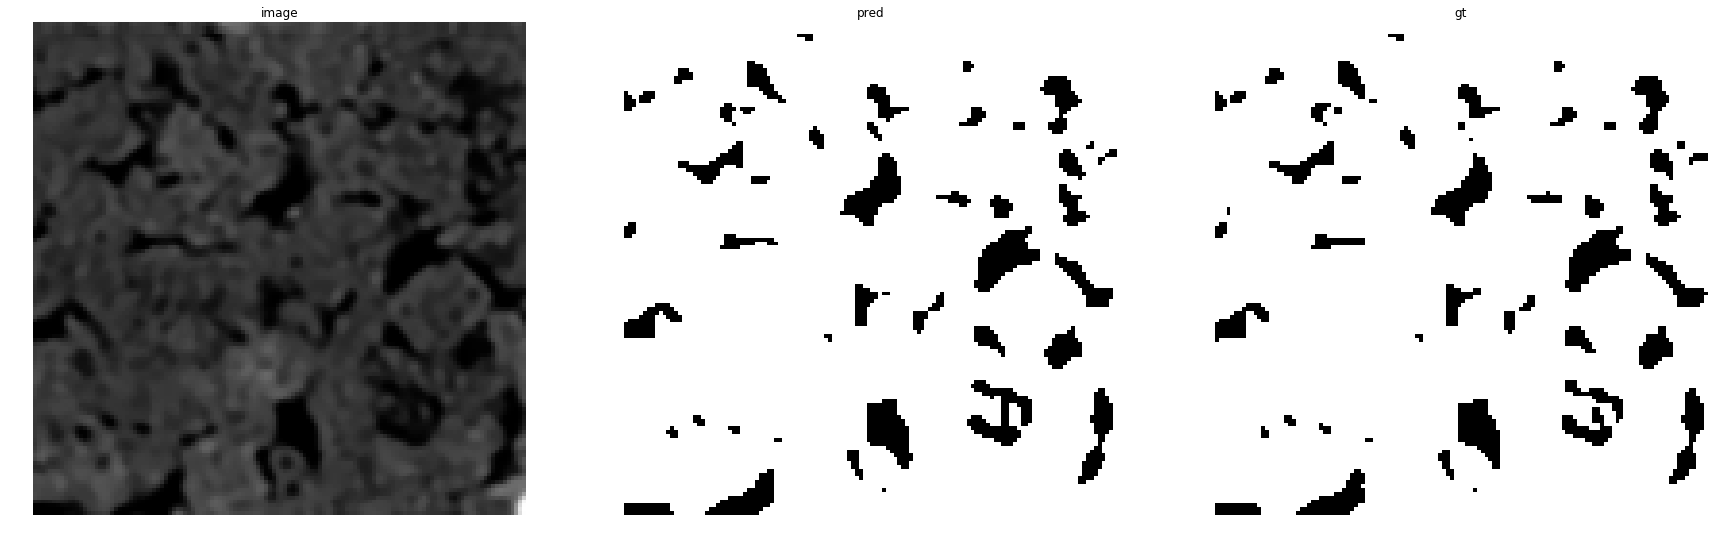

accuracy    : 0.99151611328125
precision   : 0.9970722407571322
recall      : 0.9934871099050203
f1          : 0.9952764468005574
pr_auc      : 0.9999377066838346
iou         : 0.9905973077183251


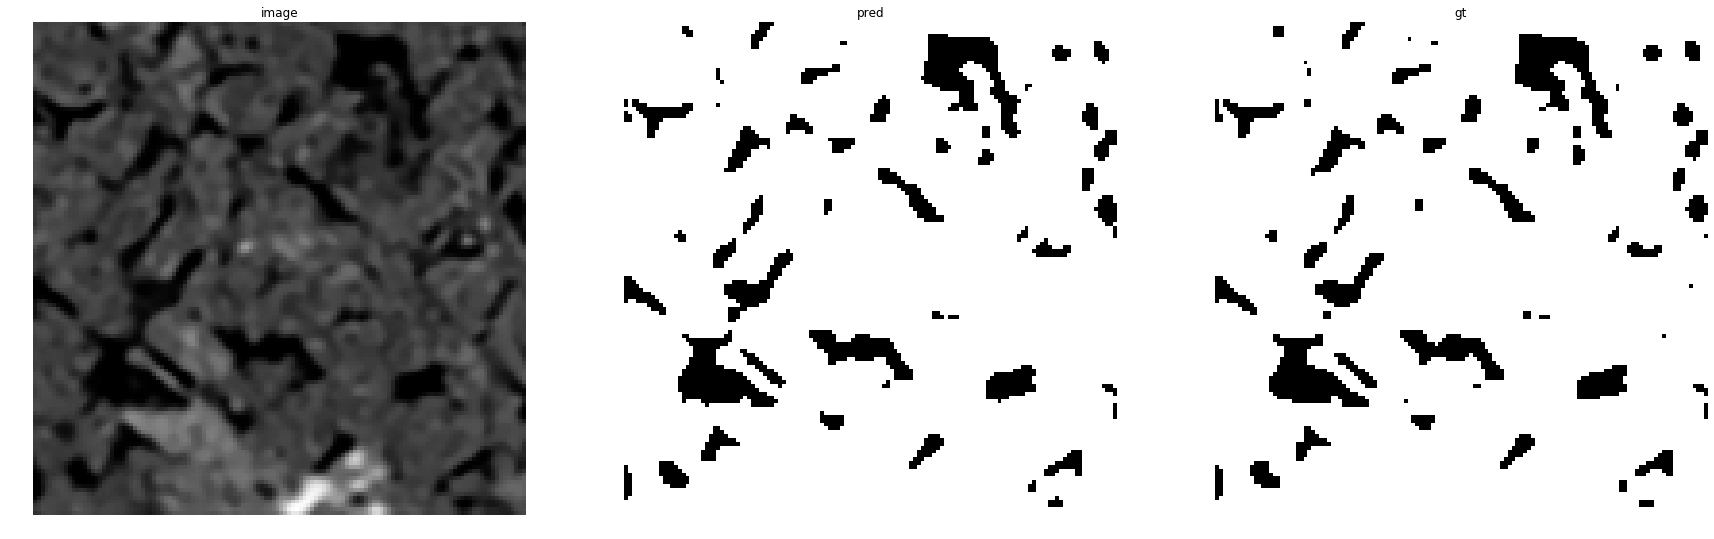

accuracy    : 0.99127197265625
precision   : 0.9960241294214423
recall      : 0.9941840574751967
f1          : 0.9951032428175186
pr_auc      : 0.9999241928309395
iou         : 0.9902542084100048


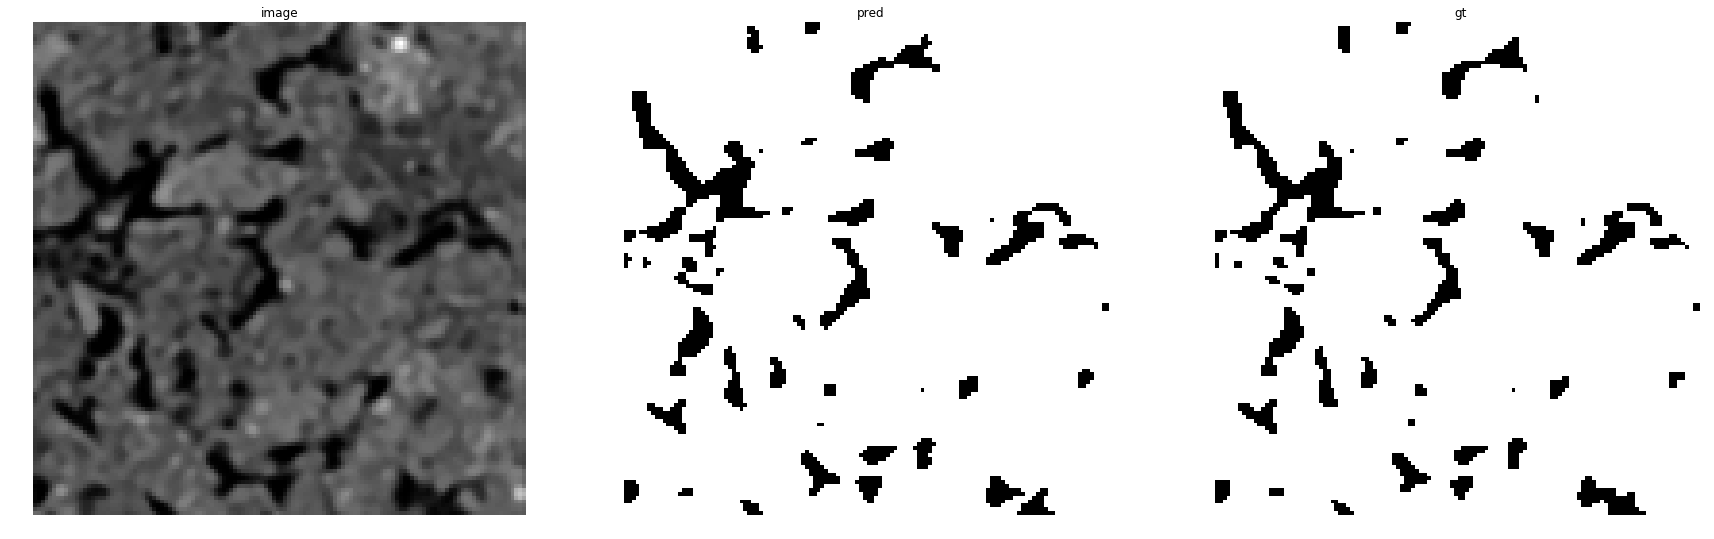

accuracy    : 0.989501953125
precision   : 0.996910678307589
recall      : 0.9915831663326653
f1          : 0.9942397856664433
pr_auc      : 0.9999179379624136
iou         : 0.9885455514118274


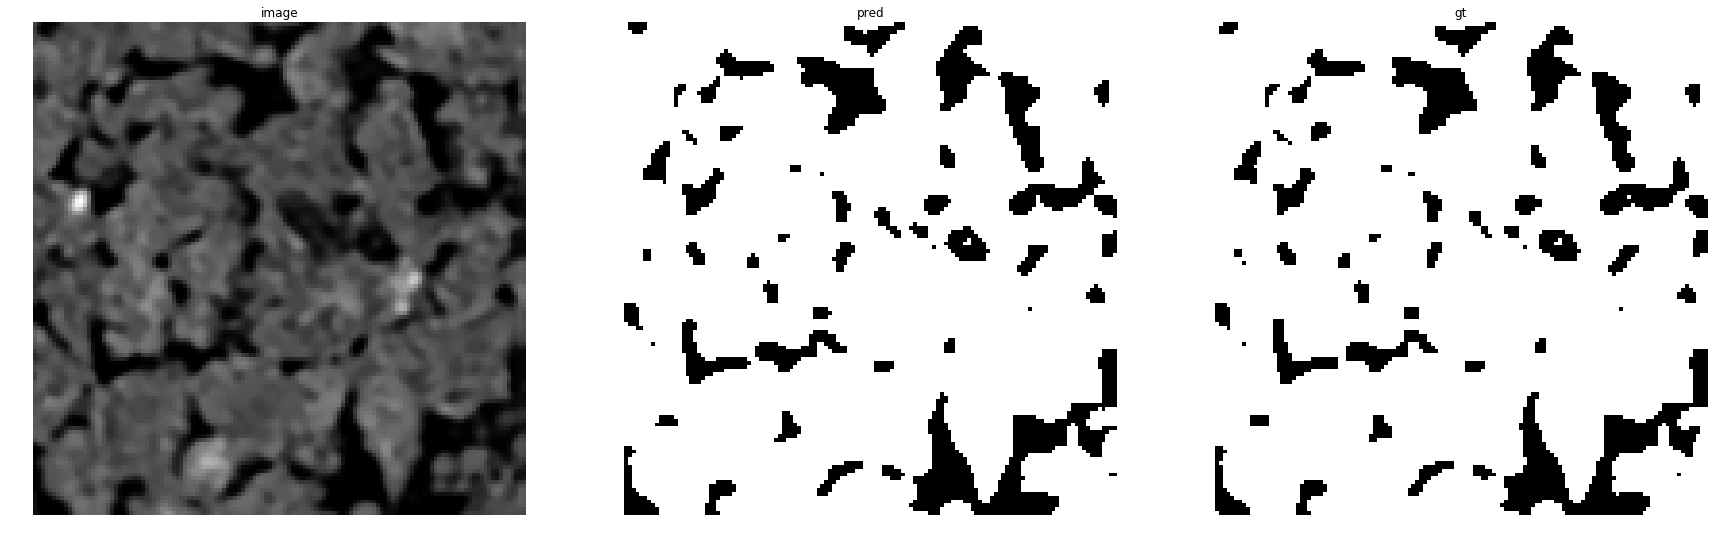

accuracy    : 0.989990234375
precision   : 0.99652450944899
recall      : 0.991642049138987
f1          : 0.9940772842181295
pr_auc      : 0.999903183762526
iou         : 0.988224312486537


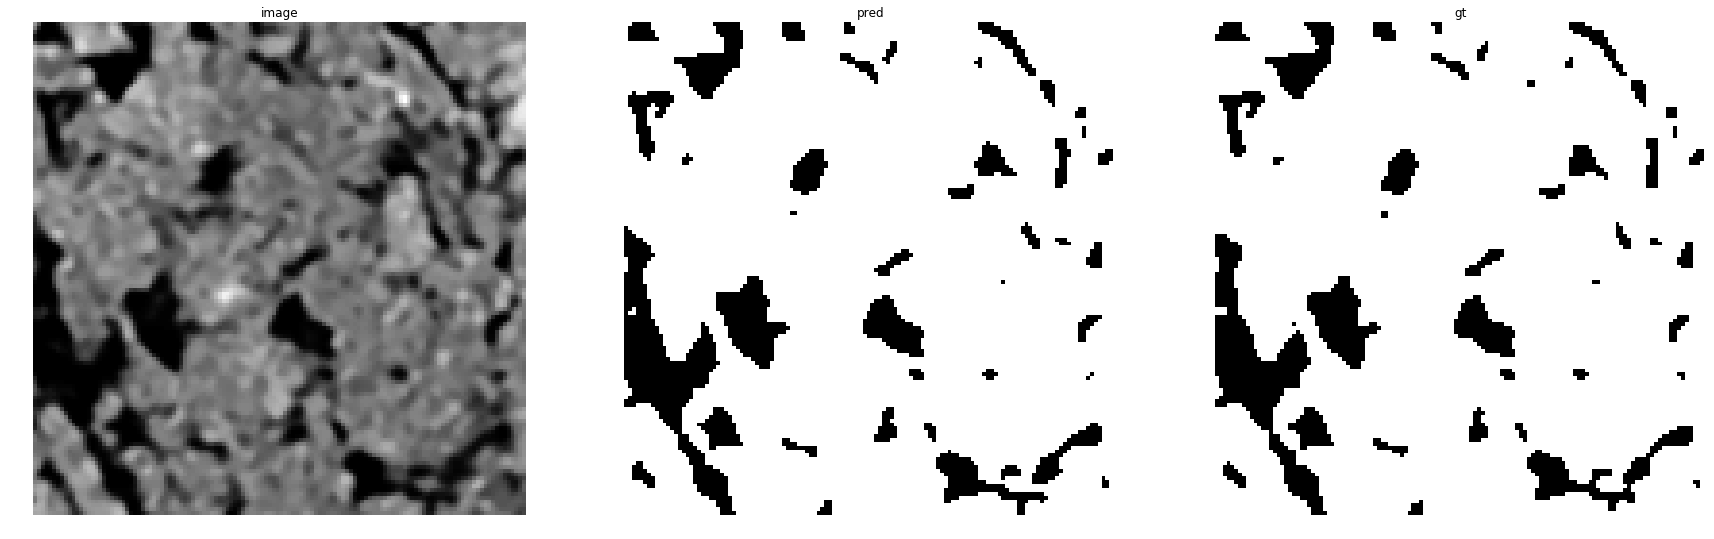

accuracy    : 0.99102783203125
precision   : 0.9970942593905032
recall      : 0.9925220458553792
f1          : 0.9948028990631076
pr_auc      : 0.9999244795612977
iou         : 0.9896595385481148


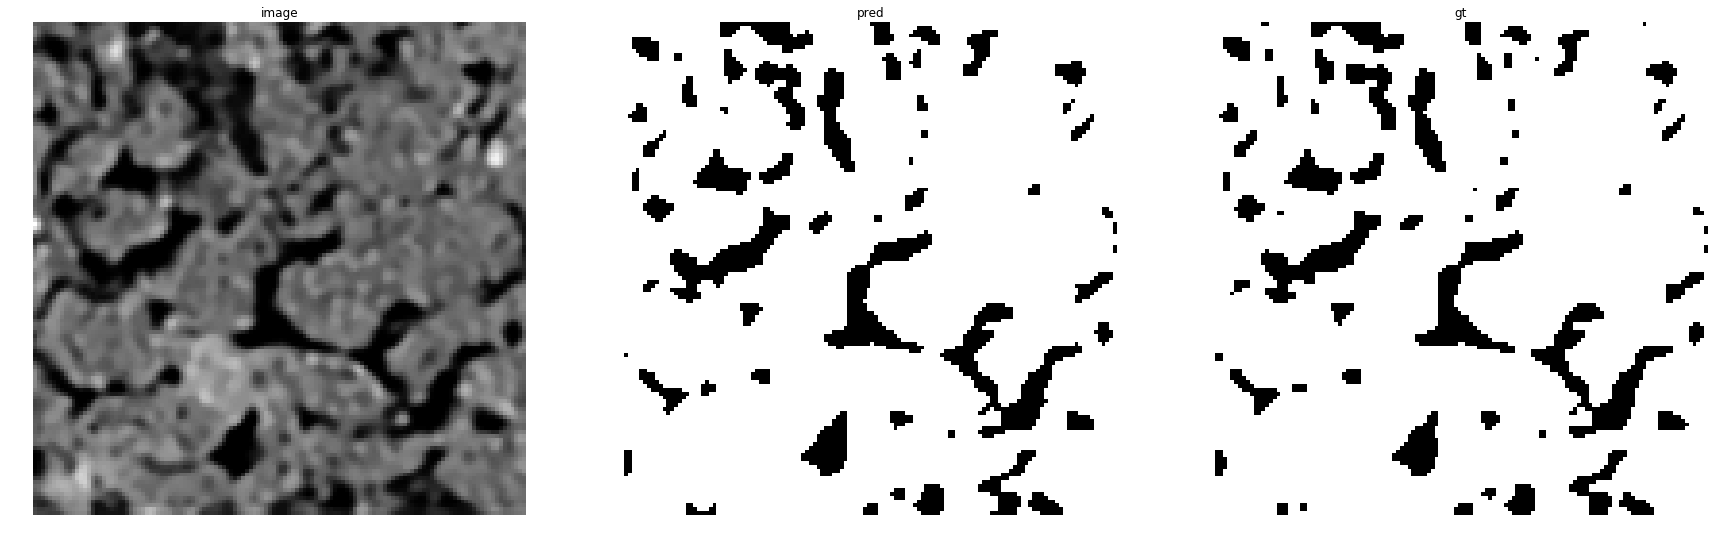

accuracy    : 0.98809814453125
precision   : 0.9943019943019943
recall      : 0.991829484902309
f1          : 0.9930642006046595
pr_auc      : 0.9998512537426263
iou         : 0.9862239491345814


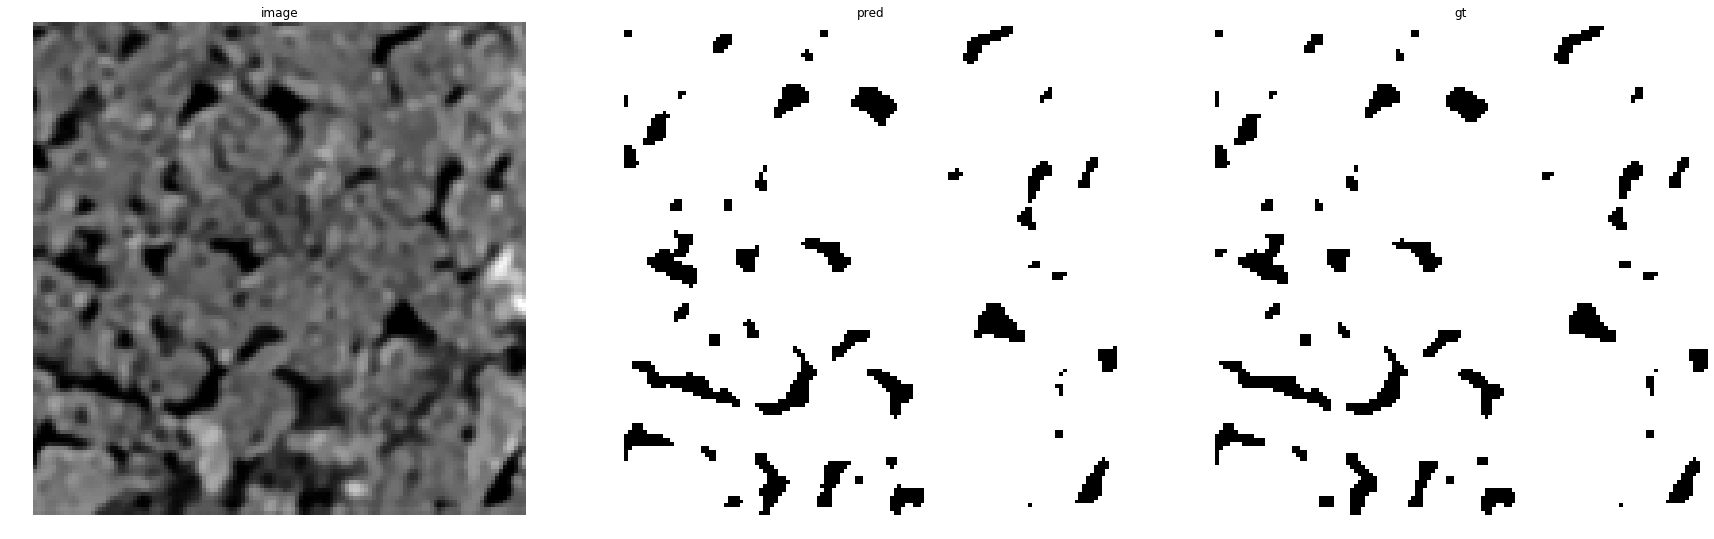

accuracy    : 0.9923095703125
precision   : 0.9974821097270077
recall      : 0.9941883502839783
f1          : 0.9958325064496925
pr_auc      : 0.9999499259741043
iou         : 0.991699604743083


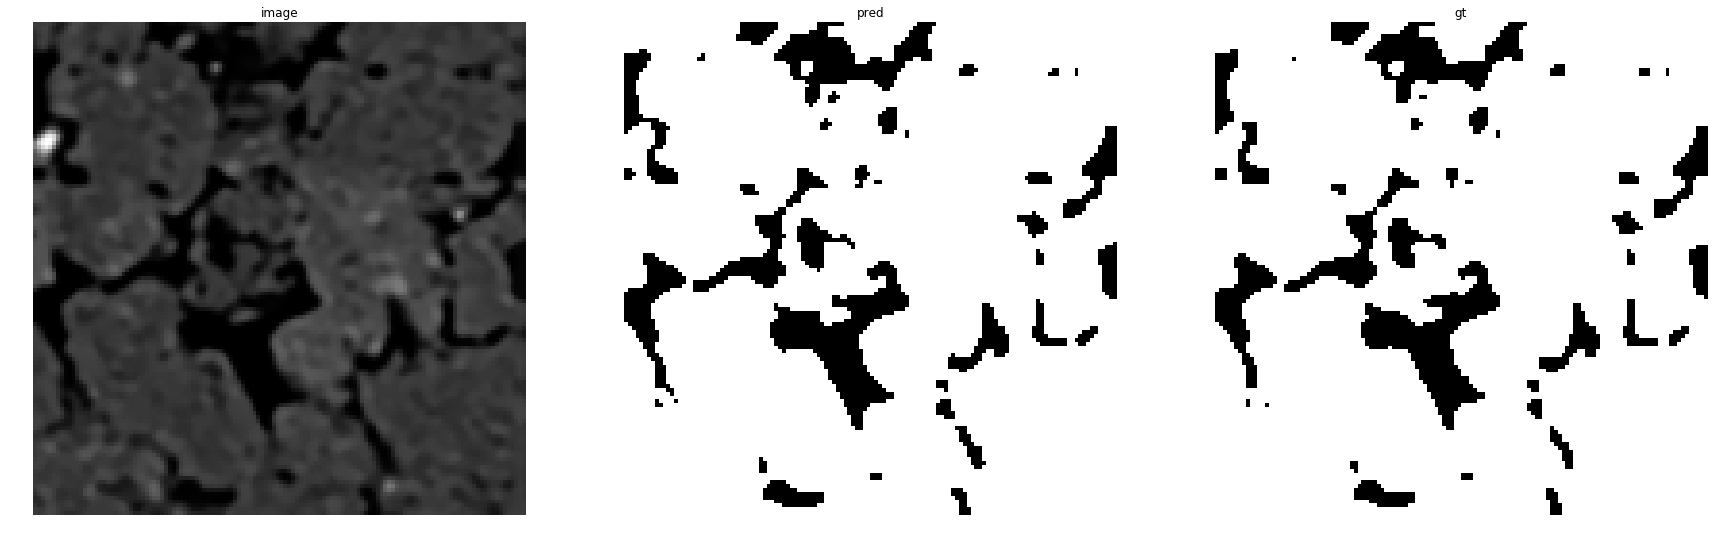

accuracy    : 0.99078369140625
precision   : 0.9966607460035524
recall      : 0.9926408151712426
f1          : 0.994646718899564
pr_auc      : 0.9999261292364008
iou         : 0.9893504478454052


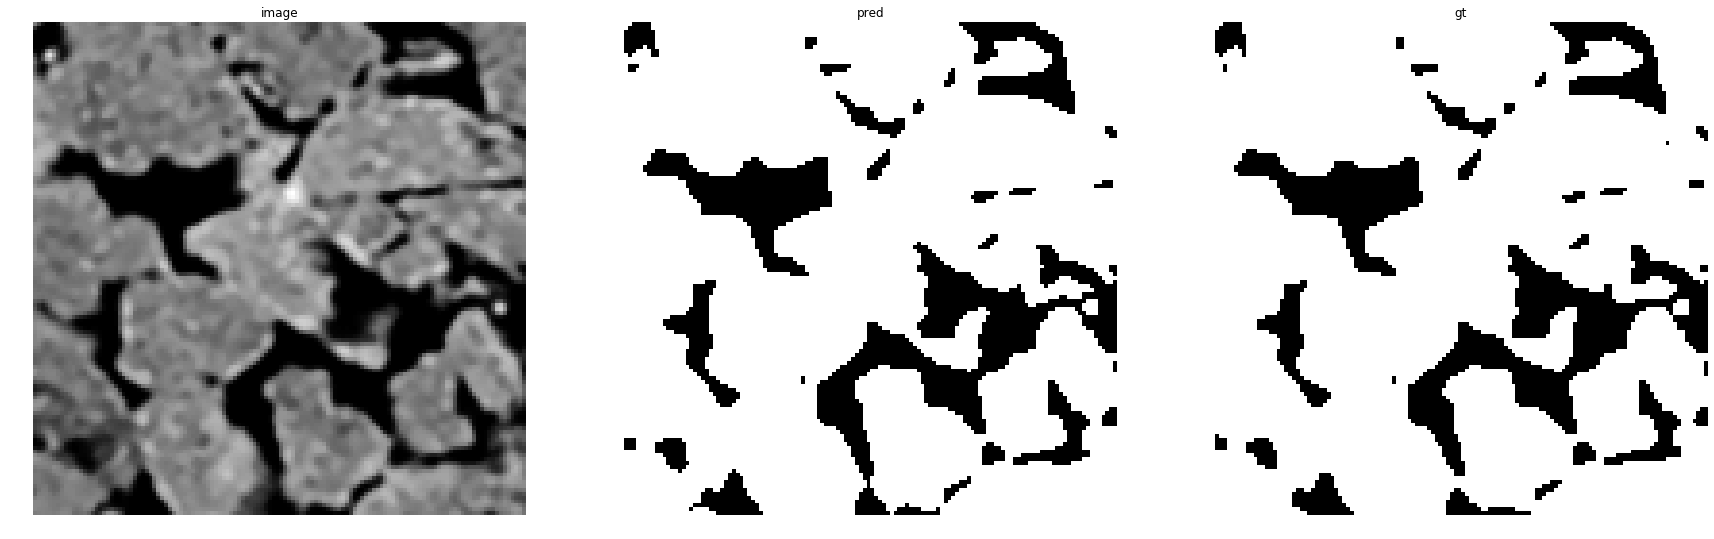

accuracy    : 0.99090576171875
precision   : 0.9968133535660091
recall      : 0.9919214798036995
f1          : 0.9943614001892147
pr_auc      : 0.9999004884782605
iou         : 0.9887860314593211


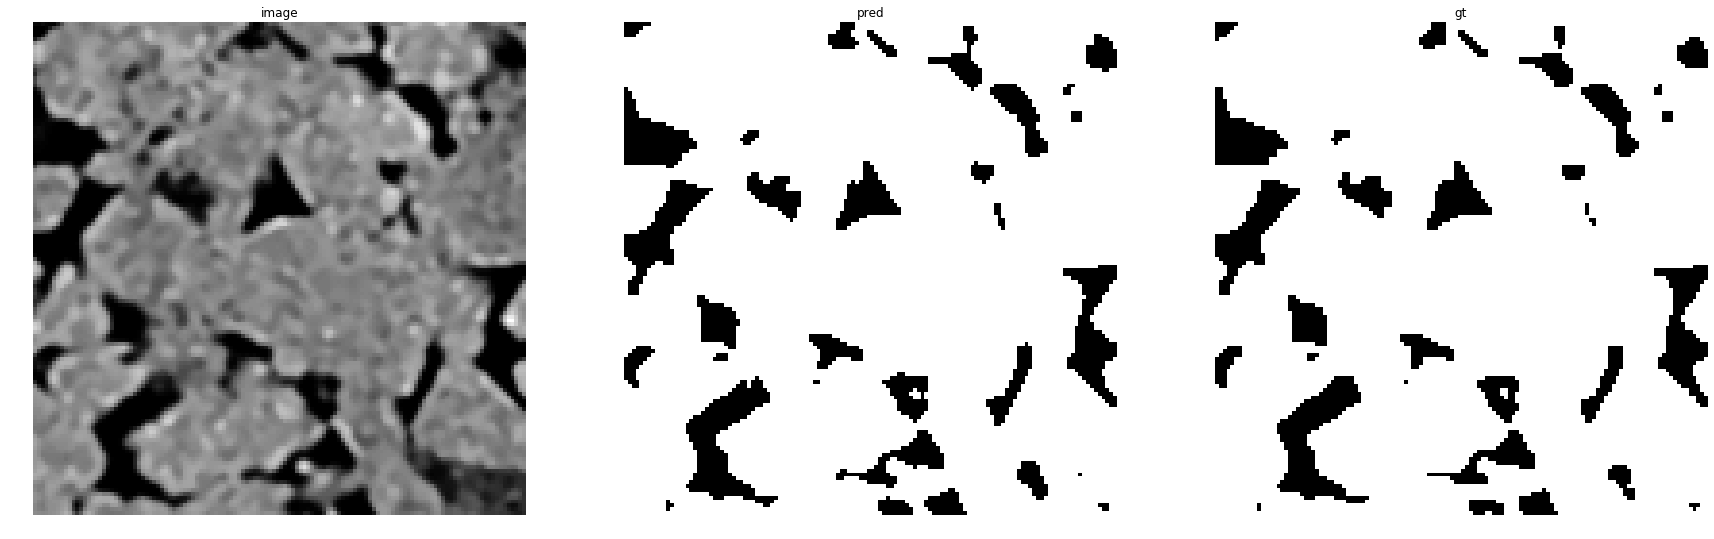

accuracy    : 0.98931884765625
precision   : 0.9970057745776003
recall      : 0.9905794021816121
f1          : 0.9937821993249245
pr_auc      : 0.9999059087295564
iou         : 0.9876412429378532


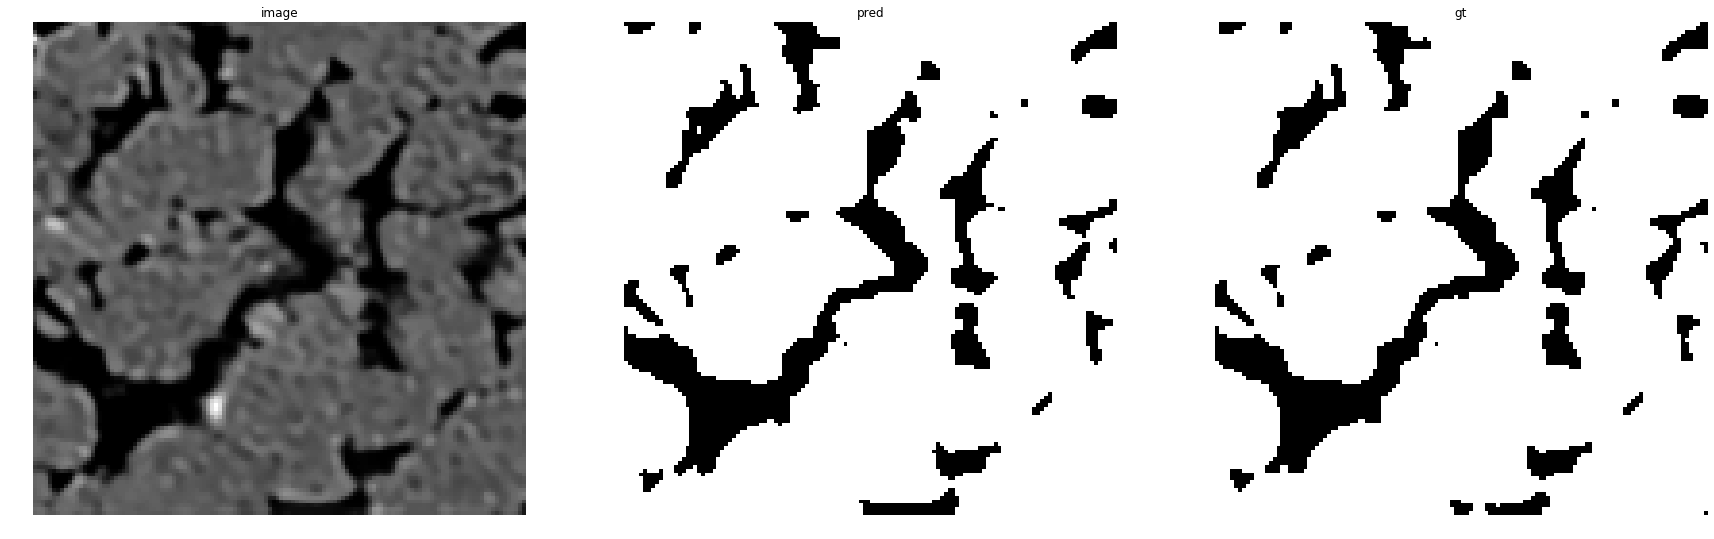

accuracy    : 0.98956298828125
precision   : 0.9968736367602152
recall      : 0.9907507767902305
f1          : 0.9938027760663936
pr_auc      : 0.9998947192667575
iou         : 0.9876818902175479


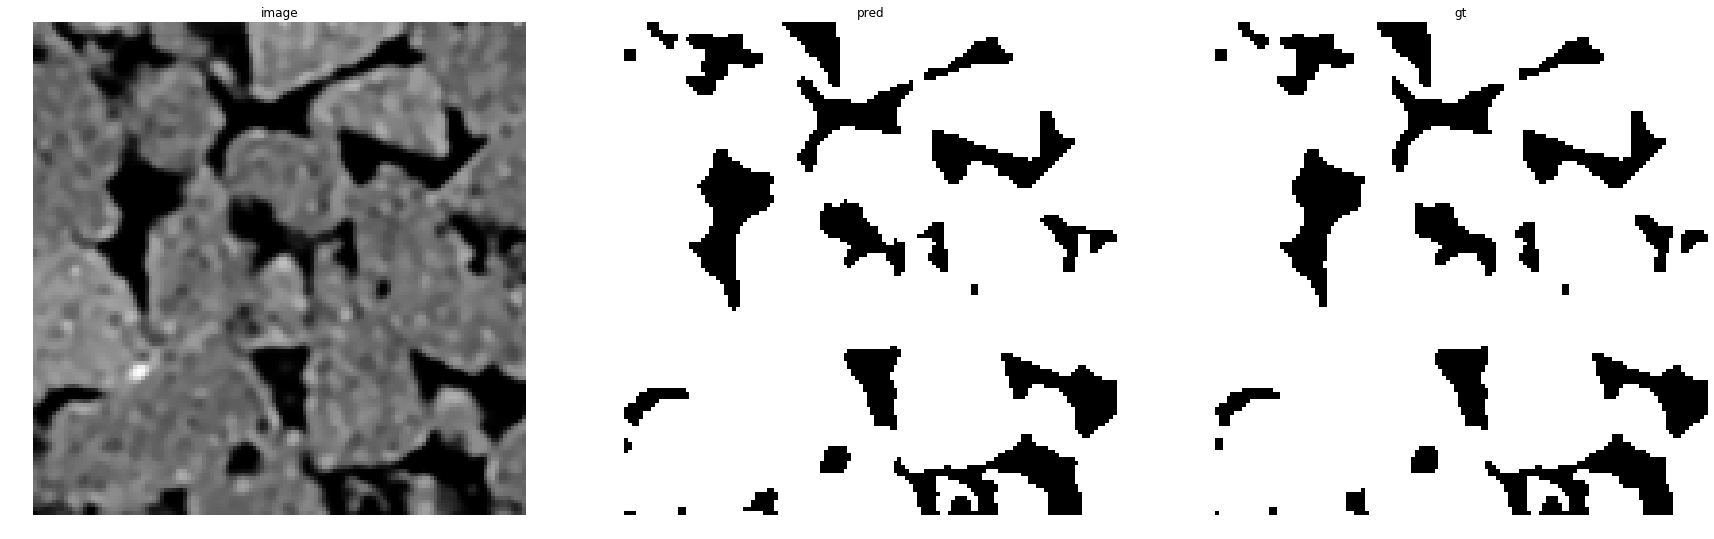

accuracy    : 0.991943359375
precision   : 0.9980818886019919
recall      : 0.9922258892555922
f1          : 0.9951452739977932
pr_auc      : 0.9999315233832438
iou         : 0.9903374569943635


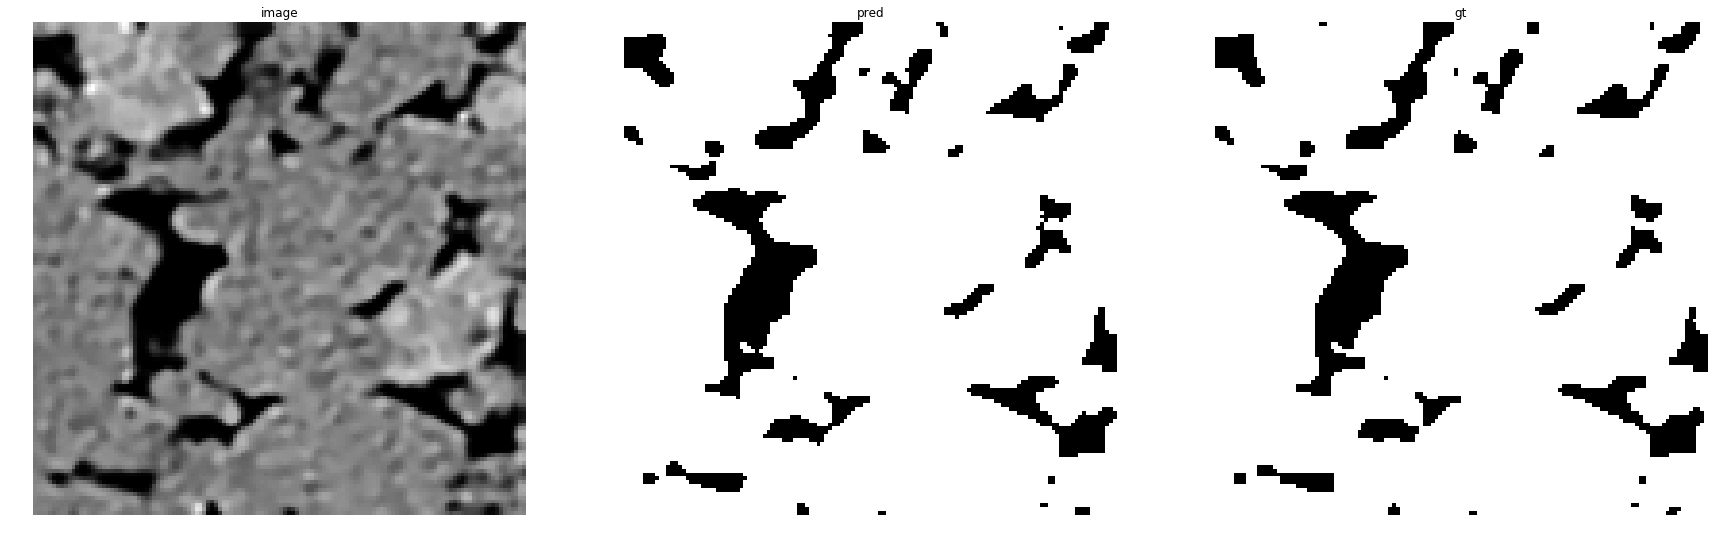

accuracy    : 0.99261474609375
precision   : 0.9971230089116553
recall      : 0.9944016794961511
f1          : 0.995760484916436
pr_auc      : 0.9999547044252707
iou         : 0.9915567650547764


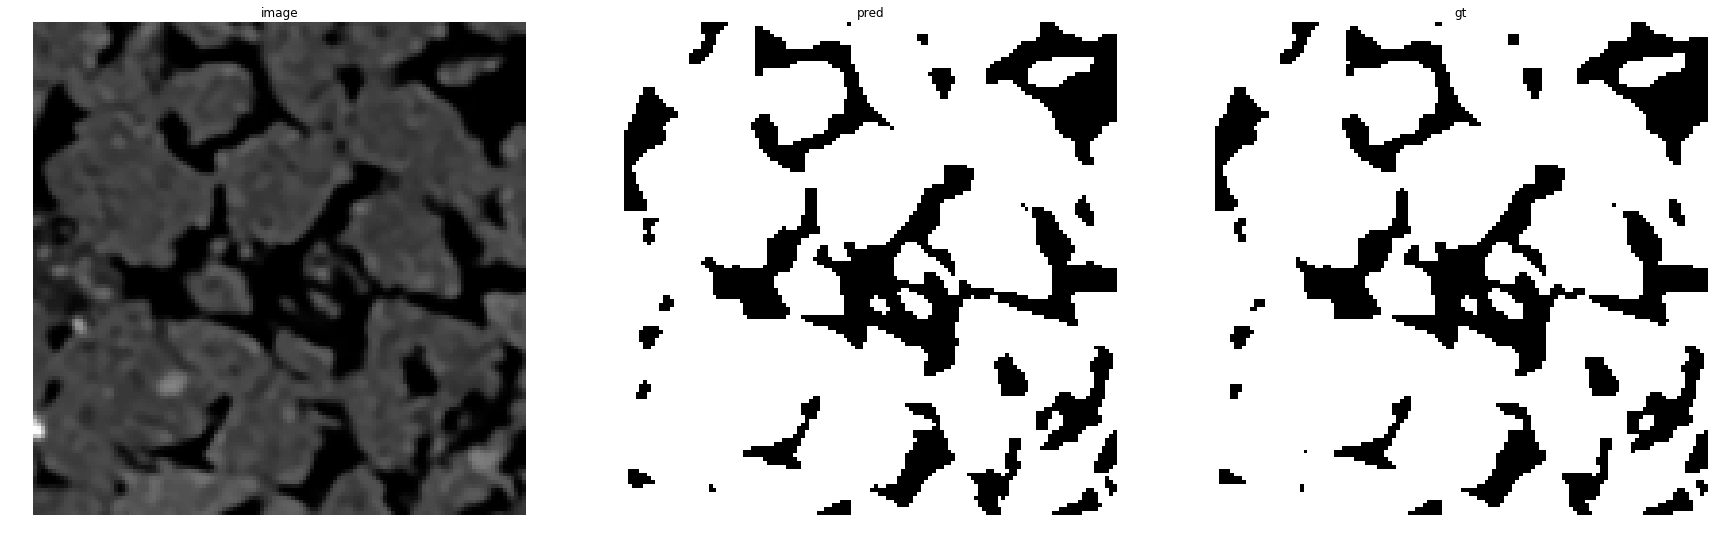

accuracy    : 0.9886474609375
precision   : 0.9952561669829222
recall      : 0.9900896649362907
f1          : 0.9926661935178615
pr_auc      : 0.9998551731738128
iou         : 0.9854391733208079


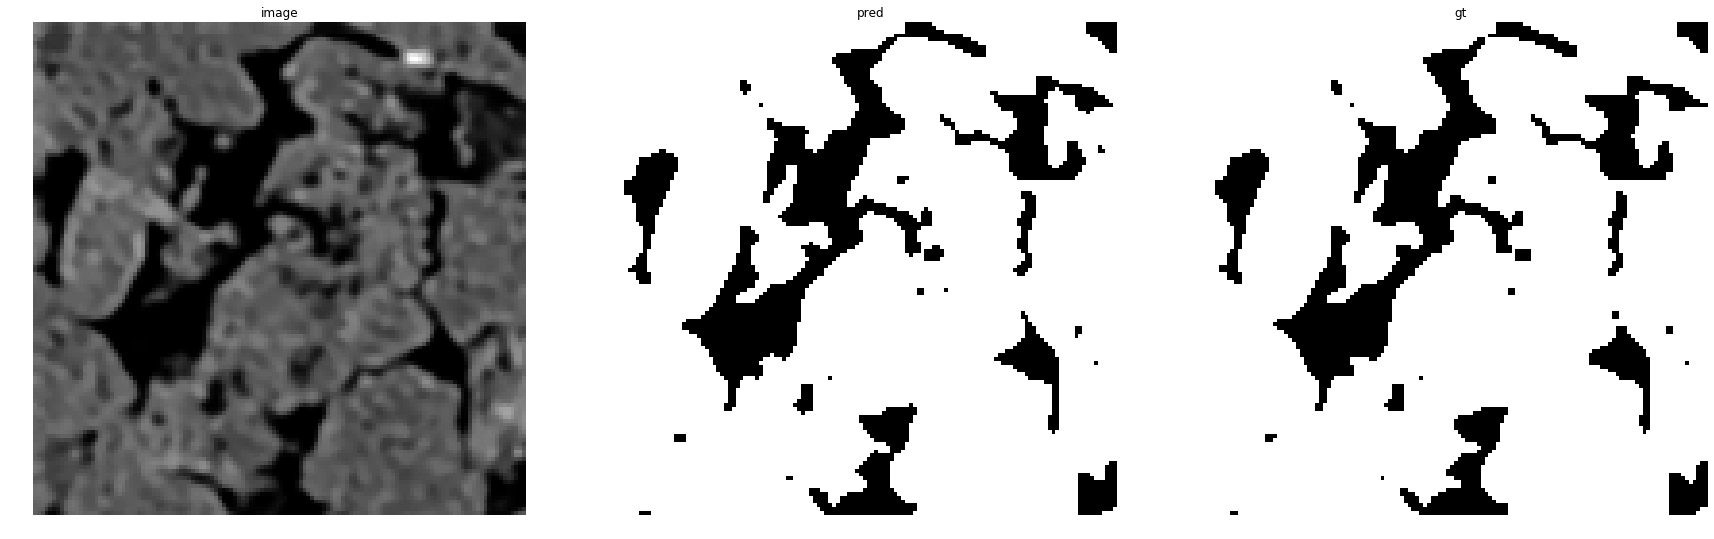

accuracy    : 0.99163818359375
precision   : 0.9964055713643852
recall      : 0.9933557297499067
f1          : 0.9948783132079705
pr_auc      : 0.9999246656497615
iou         : 0.9898088224354683


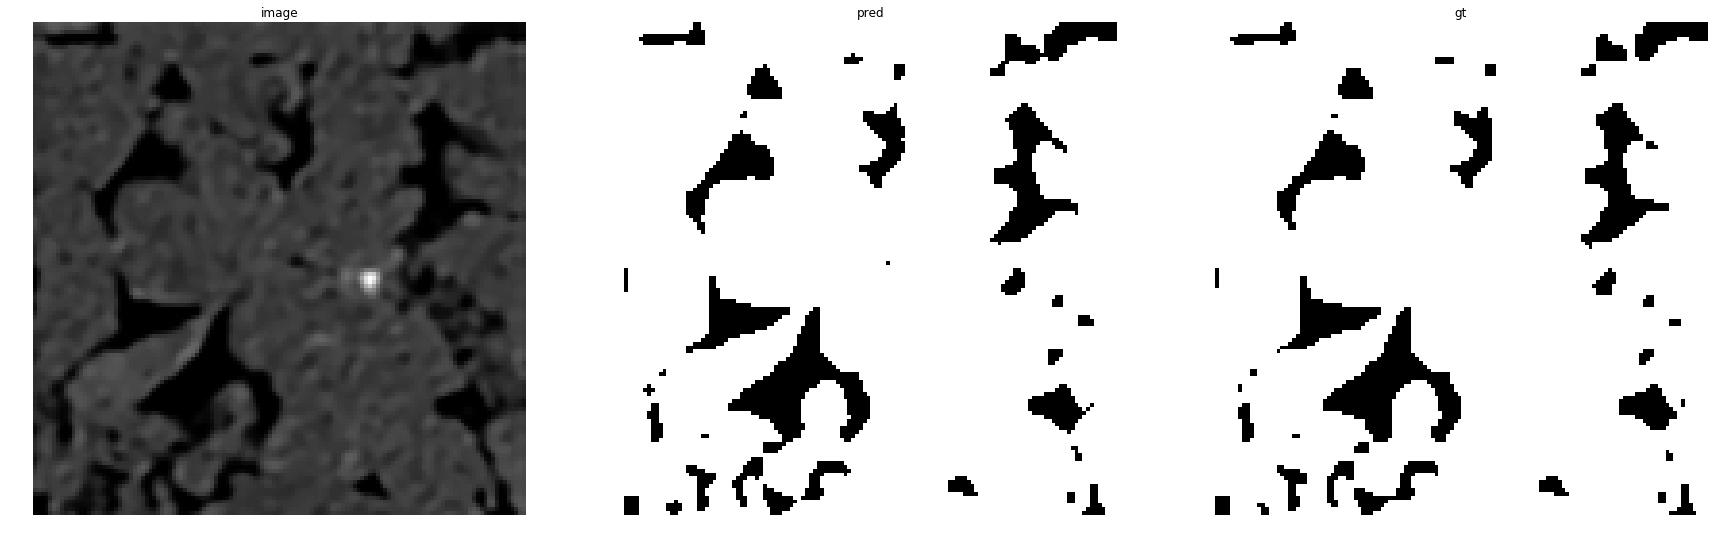

accuracy    : 0.9913330078125
precision   : 0.9974770481463312
recall      : 0.9926075737499128
f1          : 0.9950363534675615
pr_auc      : 0.9999290625650649
iou         : 0.9901217391304348


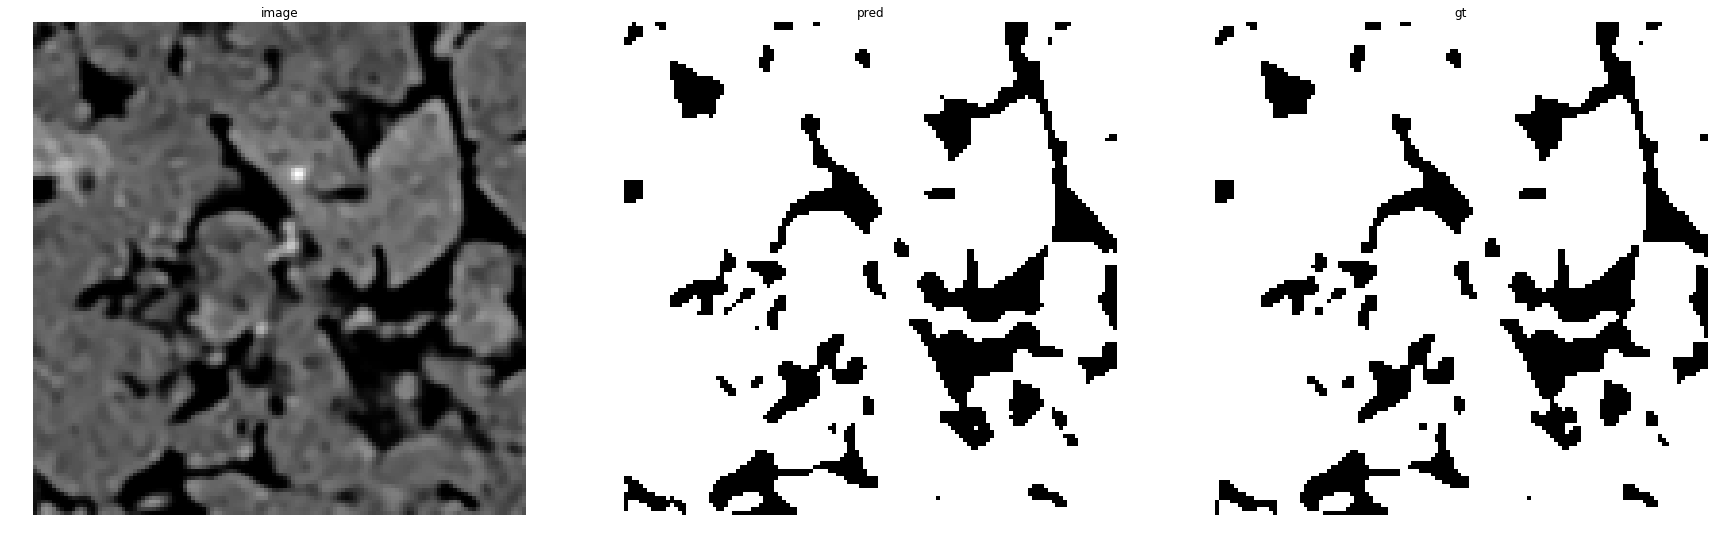

accuracy    : 0.9896240234375
precision   : 0.9959189730652223
recall      : 0.9915047647189186
f1          : 0.9937069667579774
pr_auc      : 0.9998842950701718
iou         : 0.9874926427310182


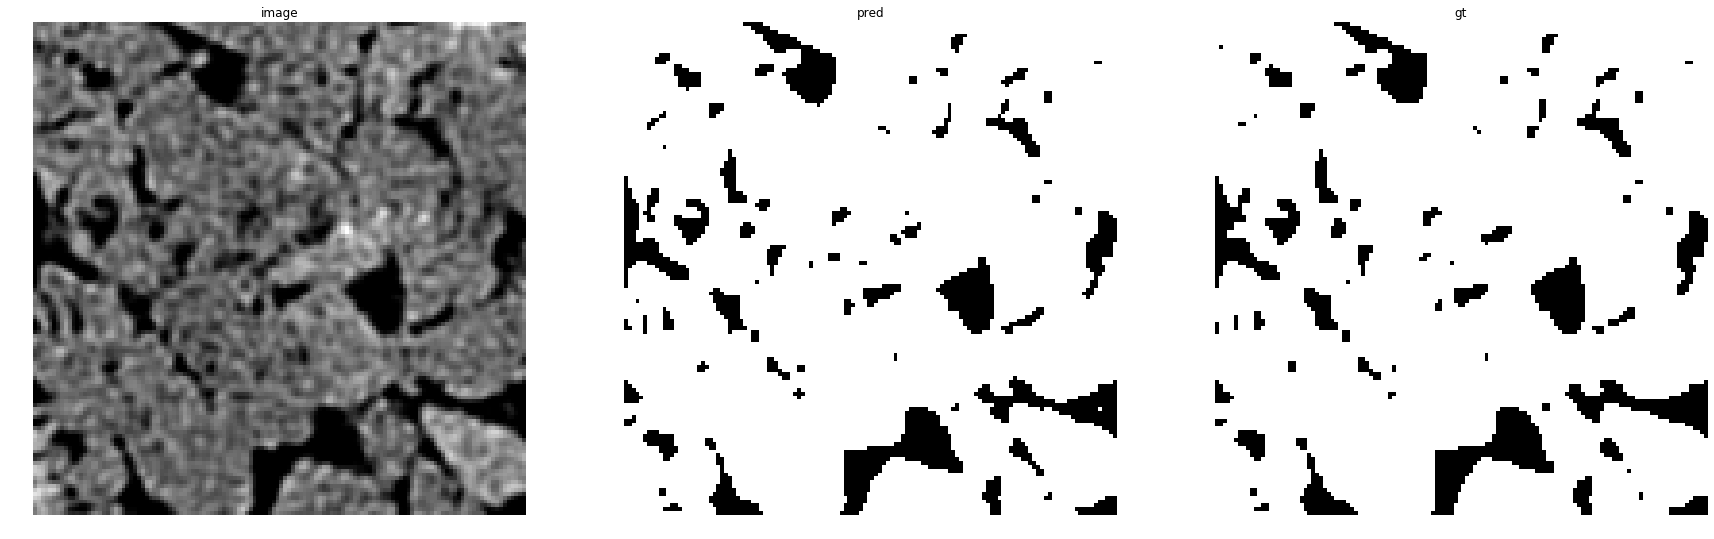

accuracy    : 0.987548828125
precision   : 0.9921847742655782
recall      : 0.9935713786597722
f1          : 0.9928775923469031
pr_auc      : 0.9998224700806048
iou         : 0.985855924564931


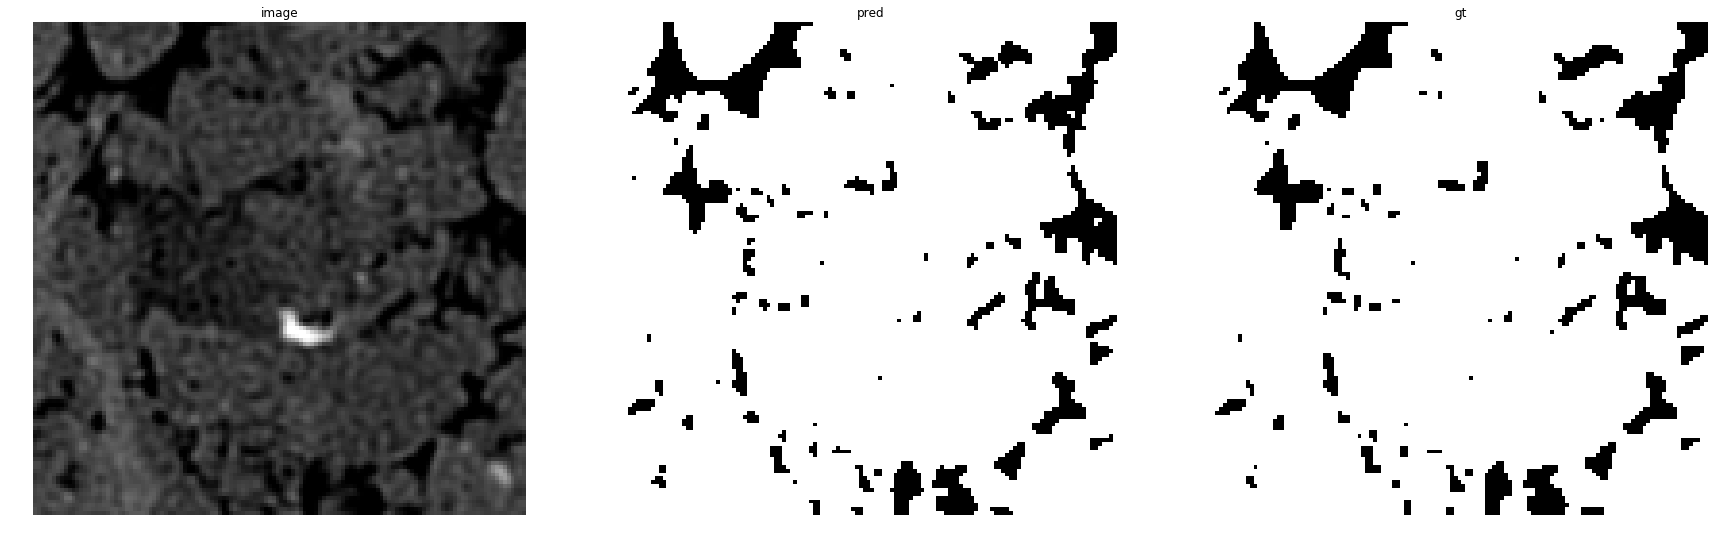

accuracy    : 0.9853515625
precision   : 0.9913858978812088
recall      : 0.9919371654966289
f1          : 0.9916614550760894
pr_auc      : 0.9998015139689189
iou         : 0.9834608228240646


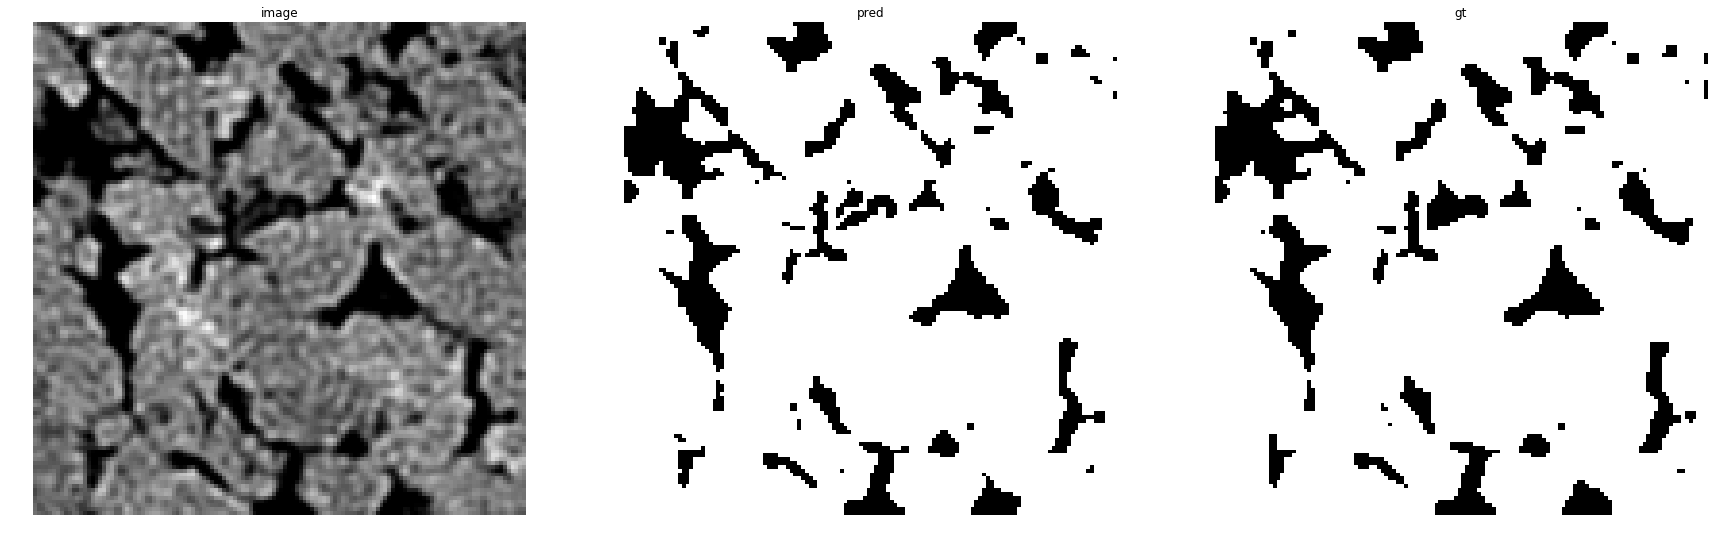

accuracy    : 0.98297119140625
precision   : 0.9864514269241856
recall      : 0.9933957471514624
f1          : 0.9899114084252395
pr_auc      : 0.9996888657344628
iou         : 0.9800243430944369


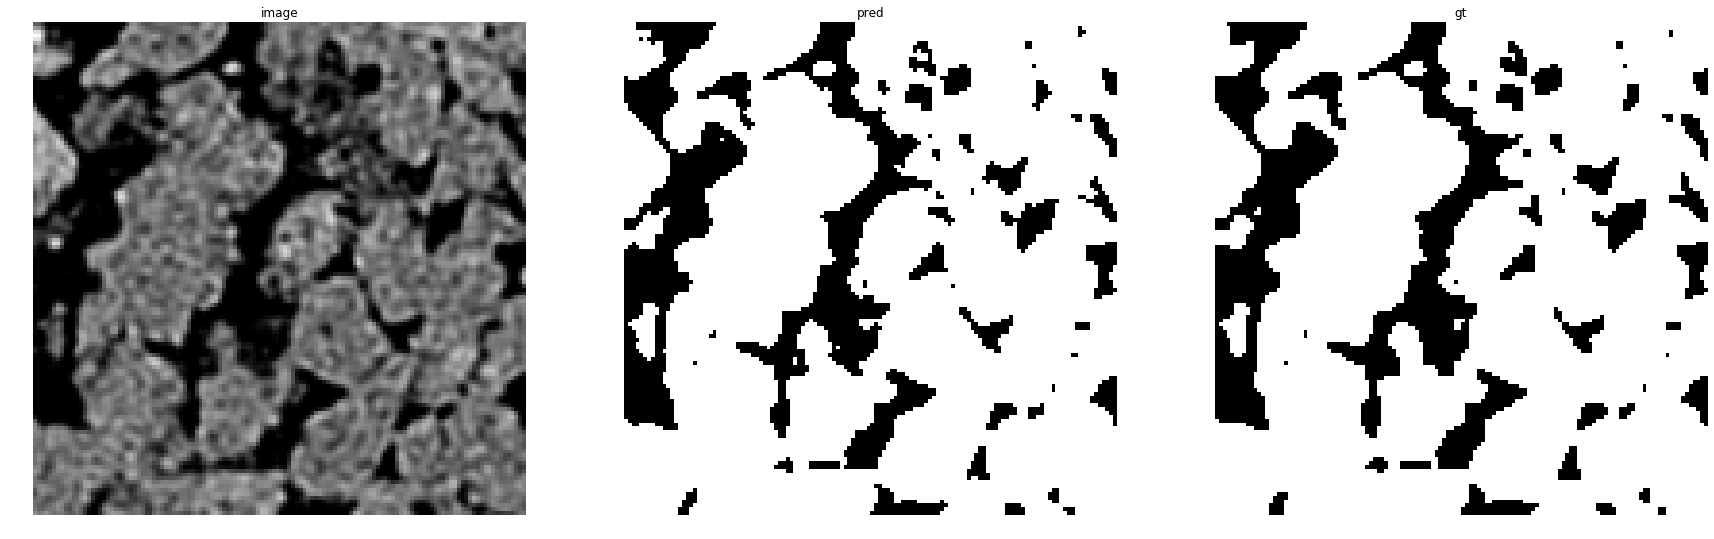

accuracy    : 0.9825439453125
precision   : 0.9832301543766162
recall      : 0.9942943180917664
f1          : 0.9887312844759654
pr_auc      : 0.9996627086811579
iou         : 0.9777137068495285


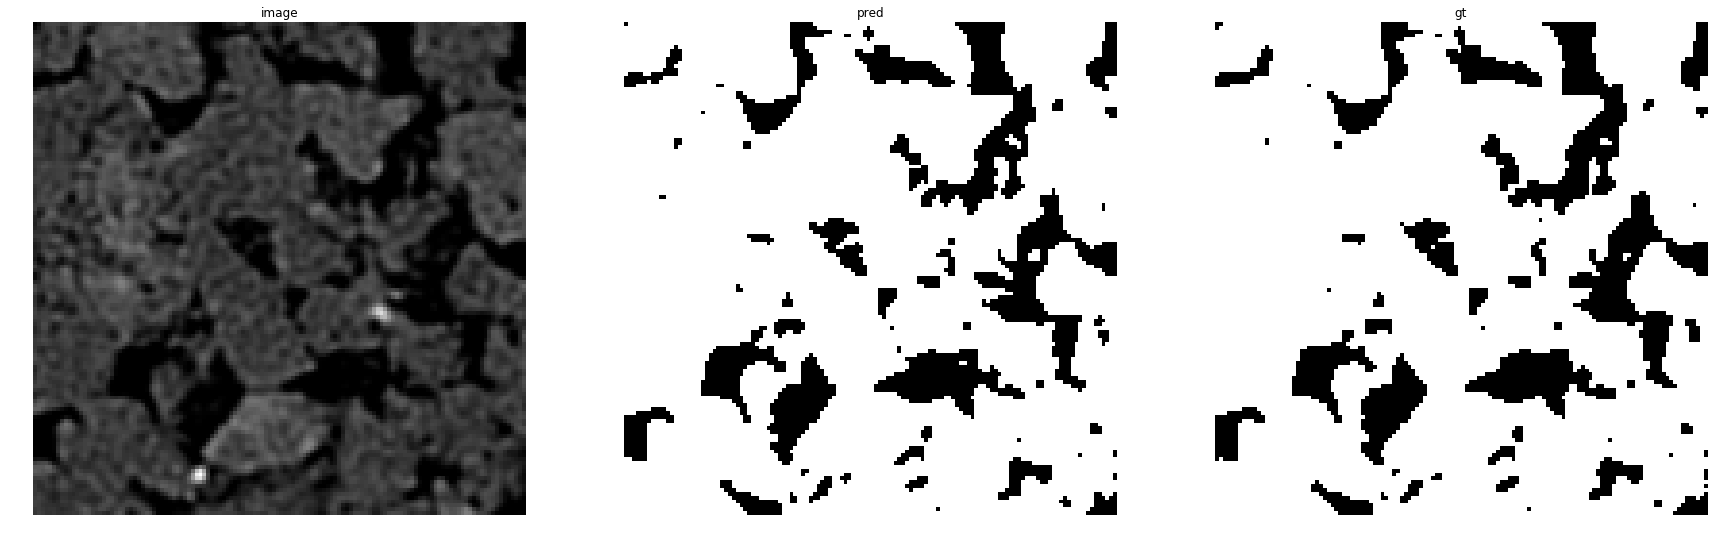

accuracy    : 0.983642578125
precision   : 0.9857100327478416
recall      : 0.9942942942942943
f1          : 0.989983555090447
pr_auc      : 0.999703463182688
iou         : 0.9801657785671996


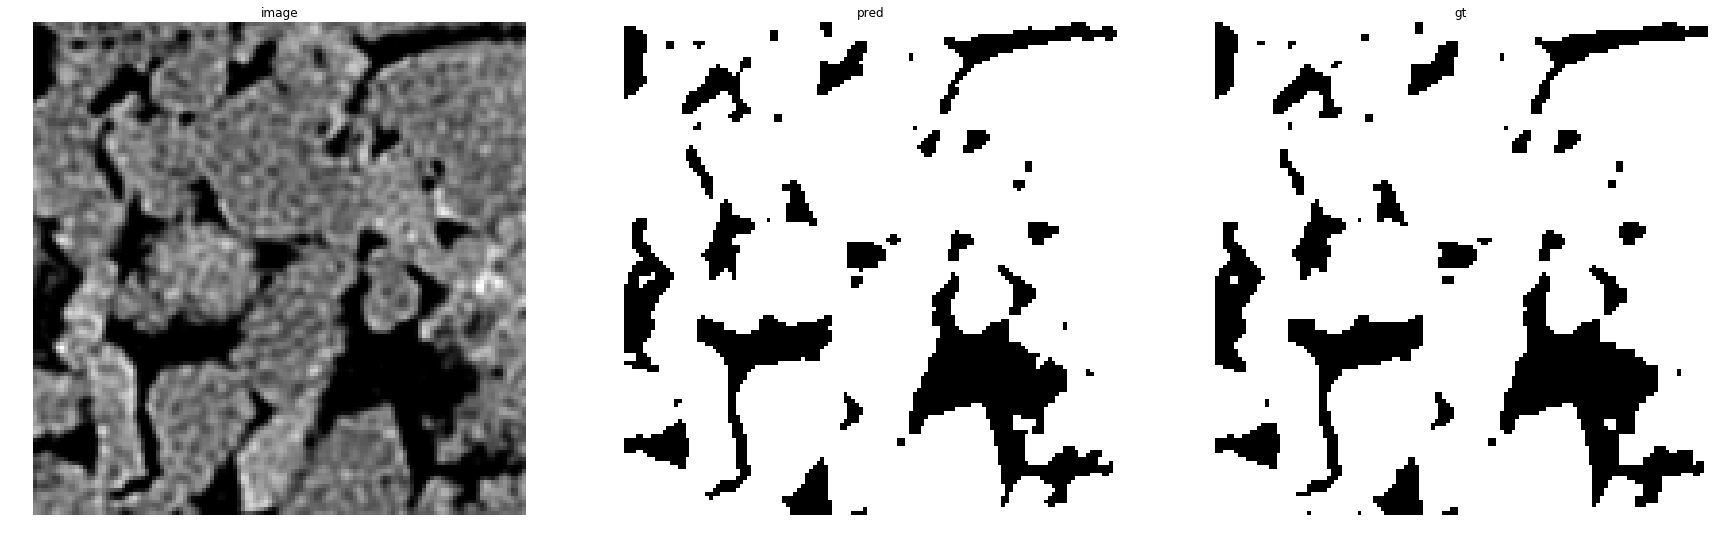

accuracy    : 0.9840087890625
precision   : 0.9875809122384465
recall      : 0.9926615221667423
f1          : 0.9901146996679746
pr_auc      : 0.9997458664859393
iou         : 0.9804229246058432


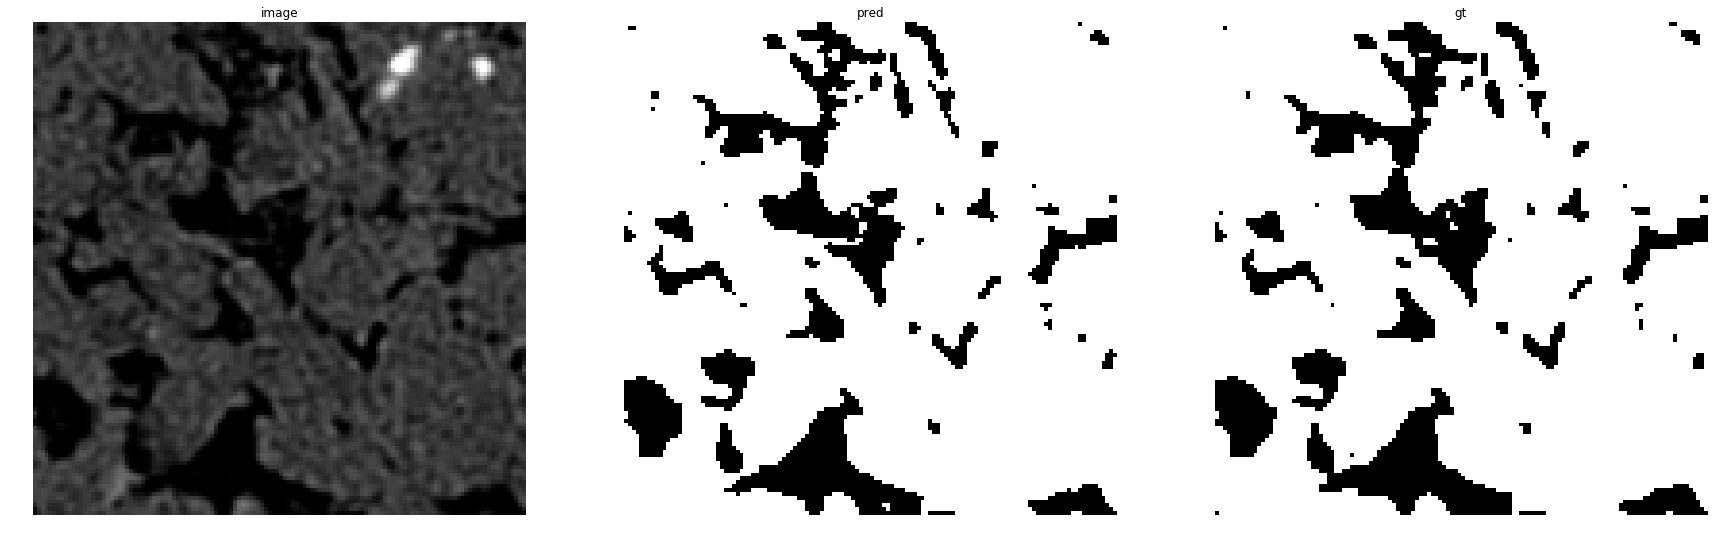

accuracy    : 0.98309326171875
precision   : 0.9857914600754829
recall      : 0.9936595554229449
f1          : 0.9897098703517961
pr_auc      : 0.9997137089910366
iou         : 0.9796293572584204


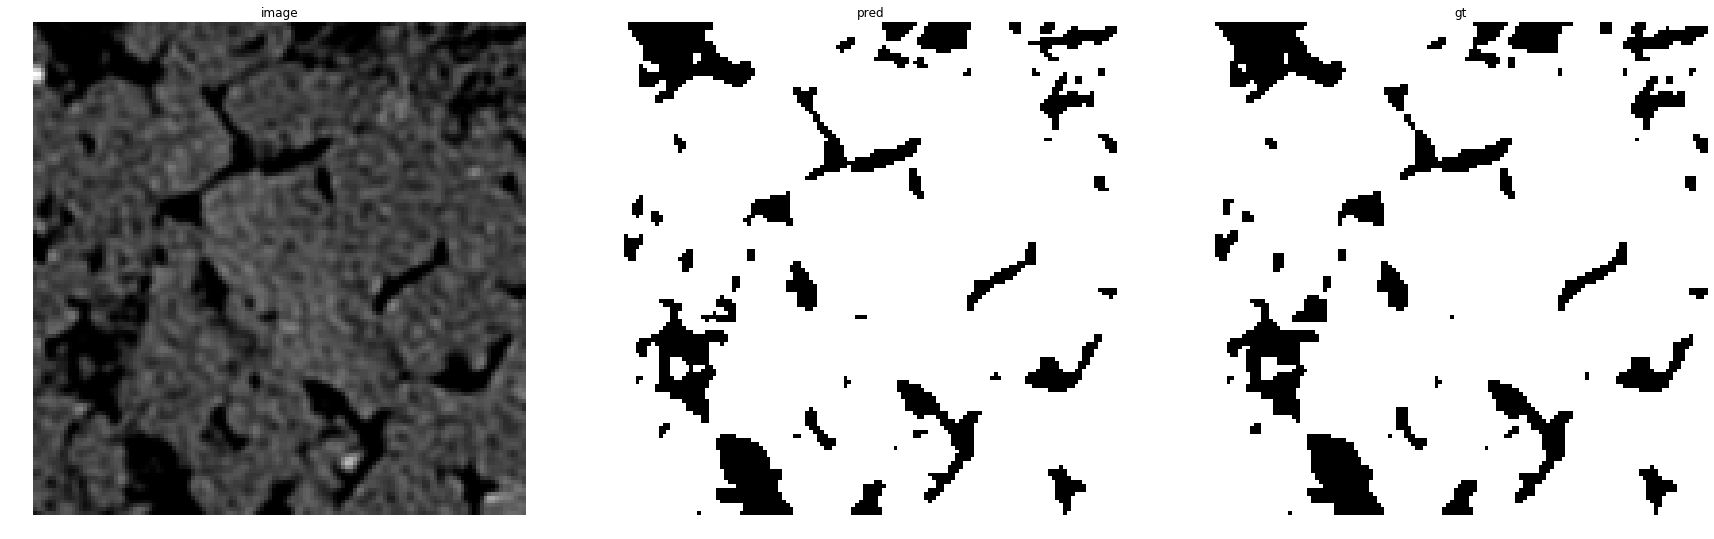

accuracy    : 0.98577880859375
precision   : 0.9878654555776327
recall      : 0.995566044482586
f1          : 0.9917008014247551
pr_auc      : 0.9997831343275072
iou         : 0.9835382224106259


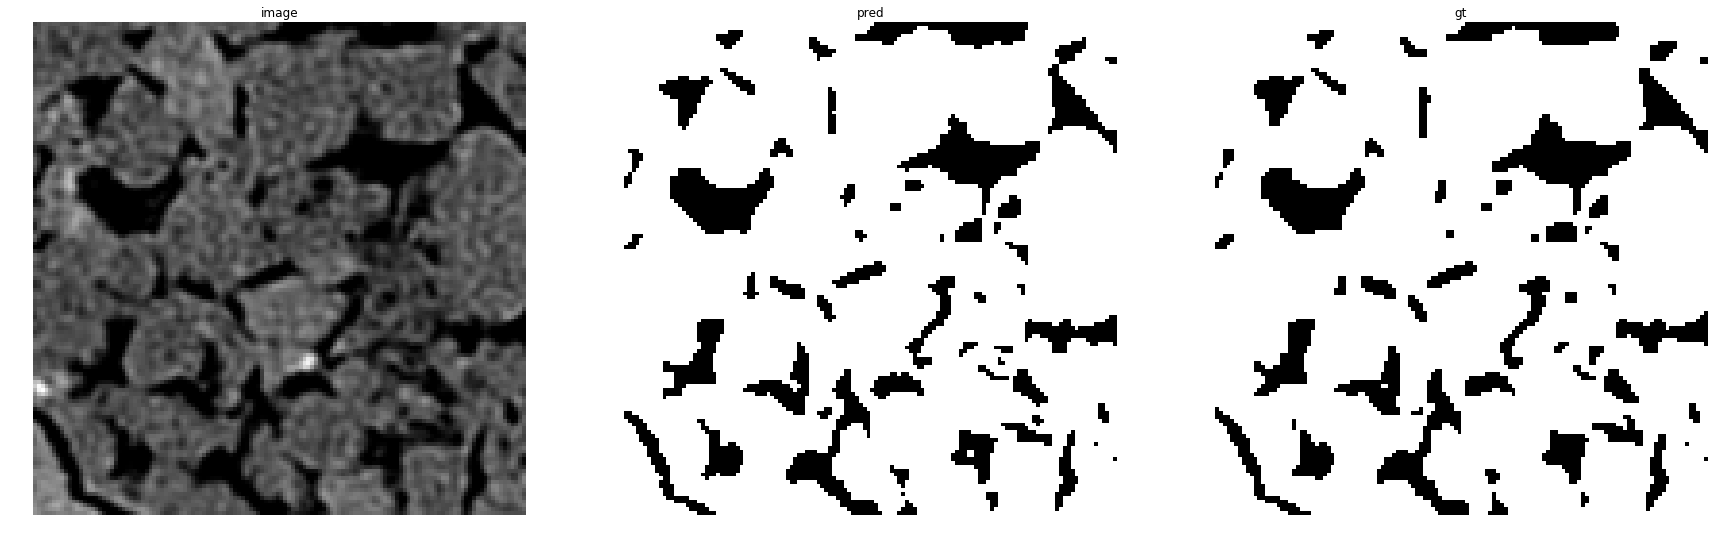

accuracy    : 0.981201171875
precision   : 0.986962572328426
recall      : 0.9904446894524072
f1          : 0.9887005649717514
pr_auc      : 0.9996614033557074
iou         : 0.9776536312849162


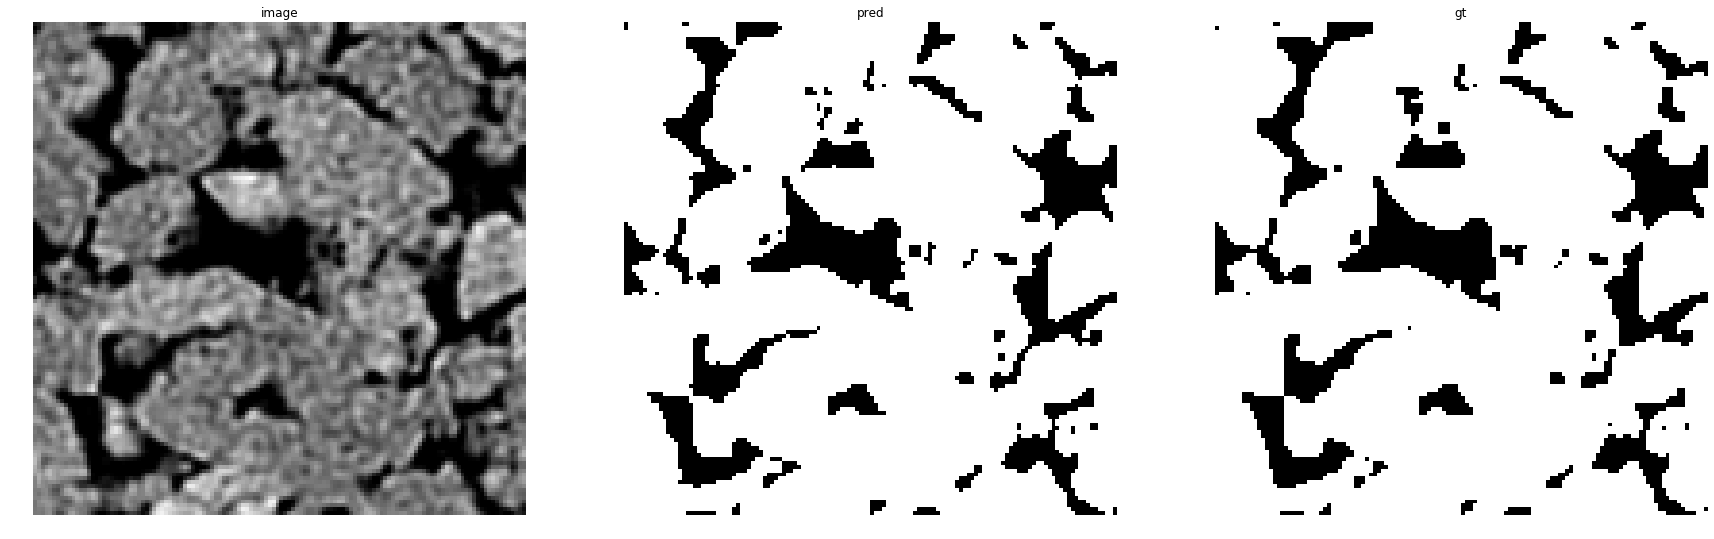

accuracy    : 0.98236083984375
precision   : 0.9859607198864909
recall      : 0.9924082982561636
f1          : 0.9891740026222139
pr_auc      : 0.9996384908597653
iou         : 0.9785798991995256


In [39]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Make prediction for particular stack

In [17]:
stack_name = 'SoilAh-1'

In [18]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:03, 209.00it/s]
100%|██████████| 700/700 [00:07<00:00, 99.88it/s] 


In [19]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        patch_sizes=ps, 
        bs=32, num_workers=8, device='cuda:0',
        threshold=None)
    predicted_stack.dump('./{}_{}'.format(stack_name, d), features=False, targets=False, preds=True)

25200it [00:00, 244793.53it/s]
25200it [01:59, 211.31it/s]
100%|██████████| 700/700 [00:03<00:00, 183.93it/s]
25200it [00:00, 147778.03it/s]
25200it [02:10, 193.78it/s]
100%|██████████| 700/700 [00:03<00:00, 181.89it/s]
25200it [00:00, 246005.39it/s]
25200it [02:10, 193.75it/s]
100%|██████████| 700/700 [00:03<00:00, 178.57it/s]
